In [1]:
import string
import numpy as np
from PIL import Image
import os
from pickle import dump, load


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.utils import load_img
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.layers import Concatenate
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
from keras.layers import add

In [6]:
from tqdm import tqdm  
tqdm().pandas()

0it [00:00, ?it/s]


In [7]:
# To Load the txt file.
def load_doc(fileName):
    # Making the file read-only
    file = open(fileName, 'r')
    txt = file.read()
    file.close()
    return txt

In [8]:
# get Image and captions
def all_img_captions(fileName):
    file = load_doc(fileName)
    captions = file.split('\n')
    print(captions)
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [ caption ]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

In [9]:
#Data cleaning - lower casing, removing puntuations and words containing numbers
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):
            img_caption.replace("-"," ")
            description = img_caption.split()
            #converts to lowercase
            description = [word.lower() for word in description]
            #remove punctuation
            description = [word.translate(table) for word in description]
            #remove 's and a 
            description = [word for word in description if(len(word)>1)]
            #remove tokens with numbers in them
            description = [word for word in description if(word.isalpha())]
            #convert back to string
            imgCaption = ' '.join(description)
            captions[img][i]= img_caption
    return captions


In [10]:
def text_vocabulary(descriptions):
    # create a vocabulary of all unique words
    vocabulary = set()
    for key in descriptions.keys():
        [vocabulary.update(d.split()) for d in descriptions[key]]
    return vocabulary
#All descriptions are contained in a single file.
def save_descriptions(descriptions, filename):
    lines = list()
    for key, descList in descriptions.items():
        for desc in descList:
            lines.append(key + '\t' + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()

In [11]:
# Set these paths to the project folder in your system.
datasetText = "/content/gdrive/MyDrive/MAJOR_PROJECT/"
datasetImages = "/content/gdrive/MyDrive/MAJOR_PROJECT/Flicker8k_Dataset"
#we prepare our text data
filename = datasetText + "caption.txt"
#loading the data file 
#mapping them into descriptions dictionary img to 5 captions
descriptions = all_img_captions(filename)
print("Length of descriptions =" ,len(descriptions))
#cleaning the descriptions
cleanDescriptions = cleaning_text(descriptions)
#building vocabulary 
vocab = text_vocabulary(cleanDescriptions)
print("Length of vocabulary = ", len(vocab))
#saving each description to file 
save_descriptions(cleanDescriptions, "descriptions.txt")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Length of vocabulary =  9631


In [12]:
def extract_features(directory):
        model = Xception( include_top=False, pooling='avg' )
        features = {}
        for image in tqdm(os.listdir(directory)):
            filename = directory + "/" + image
            img = Image.open(filename)
            img = img.resize((299,299))
            img = np.expand_dims(img, axis=0)
            #image = preprocess_input(image)
            img = img/127.5
            img = img - 1.0
            feature = model.predict(img)
            features[image] = feature
        return features


In [13]:
featureImg = extract_features(datasetImages)
dump(featureImg, open("features.p","wb"))

83683744/83683744 [==============================] - 3s 0us/step


  0%|          | 0/8095 [00:00<?, ?it/s]

1/1 [==============================] - 9s 9s/step


  0%|          | 1/8095 [00:09<20:50:50,  9.27s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 2/8095 [00:09<9:24:11,  4.18s/it] 

1/1 [==============================] - 0s 23ms/step


  0%|          | 3/8095 [00:10<5:42:18,  2.54s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 4/8095 [00:11<3:59:12,  1.77s/it]

1/1 [==============================] - 0s 22ms/step


  0%|          | 5/8095 [00:11<3:01:27,  1.35s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 6/8095 [00:12<2:26:11,  1.08s/it]

1/1 [==============================] - 0s 22ms/step


  0%|          | 7/8095 [00:12<2:03:52,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 8/8095 [00:13<1:50:11,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 9/8095 [00:14<1:40:22,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 10/8095 [00:14<1:34:26,  1.43it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 11/8095 [00:15<1:30:54,  1.48it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 12/8095 [00:15<1:27:04,  1.55it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 13/8095 [00:16<1:25:58,  1.57it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 14/8095 [00:17<1:24:00,  1.60it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 15/8095 [00:17<1:22:25,  1.63it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 16/8095 [00:18<1:19:42,  1.69it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 17/8095 [00:18<1:22:00,  1.64it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 18/8095 [00:19<1:20:28,  1.67it/s]

1/1 [==============================] - 0s 60ms/step


  0%|          | 19/8095 [00:20<1:32:02,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 20/8095 [00:20<1:30:00,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 21/8095 [00:21<1:27:44,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 22/8095 [00:22<1:23:28,  1.61it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 23/8095 [00:22<1:22:02,  1.64it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 24/8095 [00:23<1:19:30,  1.69it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 25/8095 [00:23<1:18:39,  1.71it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 26/8095 [00:24<1:18:14,  1.72it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 27/8095 [00:24<1:17:37,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 28/8095 [00:25<1:16:28,  1.76it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 29/8095 [00:25<1:15:59,  1.77it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 30/8095 [00:26<1:16:30,  1.76it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 31/8095 [00:27<1:17:50,  1.73it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 32/8095 [00:27<1:19:32,  1.69it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 33/8095 [00:28<1:33:54,  1.43it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 34/8095 [00:29<1:29:09,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 35/8095 [00:29<1:25:26,  1.57it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 36/8095 [00:30<1:24:29,  1.59it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 37/8095 [00:31<1:22:18,  1.63it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 38/8095 [00:31<1:20:32,  1.67it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 39/8095 [00:32<1:18:27,  1.71it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 40/8095 [00:32<1:17:53,  1.72it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 41/8095 [00:33<1:16:51,  1.75it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 42/8095 [00:33<1:16:49,  1.75it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 43/8095 [00:34<1:17:30,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 44/8095 [00:35<1:18:34,  1.71it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 45/8095 [00:35<1:18:35,  1.71it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 46/8095 [00:36<1:17:36,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 47/8095 [00:36<1:17:39,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 48/8095 [00:37<1:17:24,  1.73it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 49/8095 [00:37<1:16:58,  1.74it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 50/8095 [00:38<1:17:01,  1.74it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 51/8095 [00:39<1:16:07,  1.76it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 52/8095 [00:39<1:18:22,  1.71it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 53/8095 [00:40<1:17:46,  1.72it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 54/8095 [00:40<1:18:46,  1.70it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 55/8095 [00:41<1:26:15,  1.55it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 56/8095 [00:42<1:23:19,  1.61it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 57/8095 [00:42<1:21:33,  1.64it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 58/8095 [00:43<1:21:41,  1.64it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 59/8095 [00:43<1:19:57,  1.67it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 60/8095 [00:44<1:19:15,  1.69it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 61/8095 [00:45<1:19:07,  1.69it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 62/8095 [00:45<1:17:28,  1.73it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 63/8095 [00:46<1:17:46,  1.72it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 64/8095 [00:46<1:16:44,  1.74it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 65/8095 [00:47<1:16:36,  1.75it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 66/8095 [00:48<1:18:08,  1.71it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 67/8095 [00:48<1:16:47,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 68/8095 [00:49<1:17:26,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 69/8095 [00:49<1:16:29,  1.75it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 70/8095 [00:50<1:17:17,  1.73it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 71/8095 [00:50<1:18:02,  1.71it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 72/8095 [00:51<1:16:50,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 73/8095 [00:52<1:16:22,  1.75it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 74/8095 [00:52<1:18:35,  1.70it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 75/8095 [00:53<1:19:09,  1.69it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 76/8095 [00:53<1:21:19,  1.64it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 77/8095 [00:54<1:20:56,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 78/8095 [00:55<1:20:43,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 79/8095 [00:55<1:18:52,  1.69it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 80/8095 [00:56<1:21:05,  1.65it/s]

1/1 [==============================] - 0s 72ms/step


  1%|          | 81/8095 [01:06<7:56:55,  3.57s/it]

1/1 [==============================] - 0s 82ms/step


  1%|          | 82/8095 [01:32<22:40:34, 10.19s/it]

1/1 [==============================] - 0s 51ms/step


  1%|          | 83/8095 [02:18<46:28:32, 20.88s/it]

1/1 [==============================] - 0s 120ms/step


  1%|          | 84/8095 [02:50<53:54:50, 24.23s/it]

1/1 [==============================] - 0s 132ms/step


  1%|          | 85/8095 [02:51<38:15:07, 17.19s/it]

1/1 [==============================] - 0s 72ms/step


  1%|          | 86/8095 [02:51<27:16:41, 12.26s/it]

1/1 [==============================] - 0s 96ms/step


  1%|          | 87/8095 [02:52<19:25:39,  8.73s/it]

1/1 [==============================] - 0s 35ms/step


  1%|          | 88/8095 [02:55<15:35:15,  7.01s/it]

1/1 [==============================] - 0s 23ms/step


  1%|          | 89/8095 [03:10<20:48:21,  9.36s/it]

1/1 [==============================] - 0s 26ms/step


  1%|          | 91/8095 [03:10<11:17:41,  5.08s/it]

1/1 [==============================] - 0s 22ms/step


  1%|          | 93/8095 [03:10<6:52:55,  3.10s/it] 

1/1 [==============================] - 0s 22ms/step


  1%|          | 95/8095 [03:10<4:27:01,  2.00s/it]

1/1 [==============================] - 0s 35ms/step


  1%|          | 97/8095 [03:10<3:00:38,  1.36s/it]

1/1 [==============================] - 0s 22ms/step


  1%|          | 99/8095 [03:11<2:05:10,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 101/8095 [03:11<1:28:58,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 103/8095 [03:11<1:04:31,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 105/8095 [03:11<47:56,  2.78it/s]  

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 107/8095 [03:11<36:29,  3.65it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 109/8095 [03:11<28:32,  4.66it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 111/8095 [03:12<23:43,  5.61it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 113/8095 [03:12<19:52,  6.70it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 115/8095 [03:12<17:01,  7.81it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 117/8095 [03:12<15:07,  8.79it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 119/8095 [03:12<13:57,  9.53it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 121/8095 [03:12<13:15, 10.03it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 123/8095 [03:13<12:32, 10.59it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 125/8095 [03:13<12:15, 10.84it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 127/8095 [03:13<12:05, 10.98it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 129/8095 [03:13<11:46, 11.28it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 131/8095 [03:13<11:17, 11.76it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 133/8095 [03:13<10:59, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 135/8095 [03:14<11:05, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 137/8095 [03:14<11:20, 11.70it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 139/8095 [03:14<11:20, 11.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 141/8095 [03:14<11:02, 12.01it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 143/8095 [03:14<10:58, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 145/8095 [03:14<11:07, 11.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 147/8095 [03:15<11:09, 11.87it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 149/8095 [03:15<11:11, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 151/8095 [03:15<11:08, 11.89it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 153/8095 [03:15<11:05, 11.93it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 155/8095 [03:15<11:03, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 157/8095 [03:15<10:54, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 159/8095 [03:16<10:52, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 161/8095 [03:16<11:02, 11.98it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 163/8095 [03:16<11:03, 11.96it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 165/8095 [03:16<10:49, 12.21it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 167/8095 [03:16<10:40, 12.37it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 169/8095 [03:16<10:30, 12.57it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 171/8095 [03:16<10:24, 12.69it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 173/8095 [03:17<10:50, 12.18it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 175/8095 [03:17<10:44, 12.29it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 177/8095 [03:17<10:34, 12.48it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 179/8095 [03:17<10:37, 12.43it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 181/8095 [03:17<10:41, 12.34it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 183/8095 [03:18<11:06, 11.86it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 185/8095 [03:18<12:20, 10.68it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 187/8095 [03:18<13:01, 10.11it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 189/8095 [03:18<13:36,  9.69it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 190/8095 [03:18<13:46,  9.56it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 191/8095 [03:18<13:48,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 192/8095 [03:19<13:59,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 193/8095 [03:19<14:26,  9.12it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 194/8095 [03:19<14:26,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 195/8095 [03:19<14:30,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 196/8095 [03:19<15:07,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 197/8095 [03:19<15:02,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 198/8095 [03:19<15:17,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 199/8095 [03:19<15:02,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 200/8095 [03:19<14:41,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 201/8095 [03:20<16:07,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 202/8095 [03:20<16:15,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 203/8095 [03:20<15:59,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 204/8095 [03:20<15:46,  8.34it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 205/8095 [03:20<15:14,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 206/8095 [03:20<15:05,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 207/8095 [03:20<16:00,  8.22it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 208/8095 [03:20<15:24,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 209/8095 [03:21<15:01,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 210/8095 [03:21<14:59,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 211/8095 [03:21<15:29,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 212/8095 [03:21<15:27,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 213/8095 [03:21<15:17,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 214/8095 [03:21<14:50,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 215/8095 [03:21<14:40,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 216/8095 [03:21<14:54,  8.81it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 217/8095 [03:21<15:17,  8.59it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 219/8095 [03:22<13:27,  9.75it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 221/8095 [03:22<12:33, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 223/8095 [03:22<11:53, 11.04it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 225/8095 [03:22<11:33, 11.35it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 227/8095 [03:22<11:08, 11.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 229/8095 [03:22<10:54, 12.02it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 231/8095 [03:23<10:58, 11.94it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 233/8095 [03:23<10:59, 11.92it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 235/8095 [03:23<11:57, 10.95it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 237/8095 [03:23<11:32, 11.34it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 239/8095 [03:23<11:12, 11.68it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 241/8095 [03:23<11:00, 11.89it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 243/8095 [03:24<11:21, 11.52it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 245/8095 [03:24<11:18, 11.57it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 247/8095 [03:24<11:04, 11.80it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 249/8095 [03:24<10:44, 12.17it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 251/8095 [03:24<10:45, 12.16it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 253/8095 [03:24<10:42, 12.20it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 255/8095 [03:25<10:43, 12.19it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 257/8095 [03:25<11:35, 11.26it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 259/8095 [03:25<11:13, 11.64it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 261/8095 [03:25<11:22, 11.48it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 263/8095 [03:25<11:25, 11.42it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 265/8095 [03:26<11:18, 11.54it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 267/8095 [03:26<11:04, 11.78it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 269/8095 [03:26<11:26, 11.40it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 271/8095 [03:26<11:13, 11.61it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 273/8095 [03:26<10:59, 11.87it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 275/8095 [03:26<11:10, 11.66it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 277/8095 [03:27<11:02, 11.79it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 279/8095 [03:27<11:18, 11.52it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 281/8095 [03:27<11:23, 11.43it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 283/8095 [03:27<11:07, 11.71it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 285/8095 [03:27<10:59, 11.85it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 287/8095 [03:27<10:58, 11.85it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 289/8095 [03:28<10:53, 11.94it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 291/8095 [03:28<10:50, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 293/8095 [03:28<10:57, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 295/8095 [03:28<11:04, 11.74it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 297/8095 [03:28<11:07, 11.68it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 299/8095 [03:28<11:11, 11.62it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 301/8095 [03:29<11:03, 11.74it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 303/8095 [03:29<10:46, 12.05it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 305/8095 [03:29<11:01, 11.77it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 307/8095 [03:29<10:48, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 309/8095 [03:29<10:37, 12.22it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 311/8095 [03:29<10:41, 12.13it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 313/8095 [03:30<10:56, 11.86it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 315/8095 [03:30<10:48, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 317/8095 [03:30<10:50, 11.96it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 319/8095 [03:30<10:43, 12.09it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 321/8095 [03:30<10:45, 12.04it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 323/8095 [03:30<10:52, 11.92it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 325/8095 [03:31<11:12, 11.56it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 327/8095 [03:31<10:59, 11.78it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 329/8095 [03:31<10:56, 11.83it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 331/8095 [03:31<10:55, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 333/8095 [03:31<10:53, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 335/8095 [03:31<10:55, 11.84it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 337/8095 [03:32<12:24, 10.42it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 339/8095 [03:32<12:58,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 341/8095 [03:32<14:33,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 342/8095 [03:32<14:30,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 343/8095 [03:32<14:26,  8.94it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 344/8095 [03:33<14:17,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 345/8095 [03:33<14:24,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 346/8095 [03:33<14:25,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 347/8095 [03:33<14:38,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 348/8095 [03:33<14:24,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 349/8095 [03:33<14:54,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 350/8095 [03:33<15:10,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 351/8095 [03:33<14:49,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 352/8095 [03:33<14:37,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 353/8095 [03:34<14:53,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 354/8095 [03:34<14:46,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 355/8095 [03:34<14:54,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 356/8095 [03:34<14:45,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 357/8095 [03:34<14:41,  8.78it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 358/8095 [03:34<15:47,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 359/8095 [03:34<15:33,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 360/8095 [03:34<15:12,  8.48it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 361/8095 [03:34<15:14,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 362/8095 [03:35<15:51,  8.13it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 363/8095 [03:35<15:17,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 364/8095 [03:35<15:12,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 365/8095 [03:35<15:19,  8.41it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 366/8095 [03:35<15:17,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 367/8095 [03:35<15:21,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 368/8095 [03:35<15:23,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 369/8095 [03:35<15:28,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 370/8095 [03:36<15:23,  8.37it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 372/8095 [03:36<13:35,  9.47it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 374/8095 [03:36<12:43, 10.12it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 376/8095 [03:36<12:11, 10.55it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 378/8095 [03:36<11:43, 10.97it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 380/8095 [03:36<11:32, 11.14it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 382/8095 [03:37<11:19, 11.34it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 384/8095 [03:37<11:05, 11.58it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 386/8095 [03:37<11:10, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 388/8095 [03:37<10:57, 11.72it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 390/8095 [03:37<10:51, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 392/8095 [03:37<10:59, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 394/8095 [03:38<11:00, 11.67it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 396/8095 [03:38<10:56, 11.73it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 398/8095 [03:38<10:58, 11.69it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 400/8095 [03:38<10:57, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 402/8095 [03:38<11:11, 11.46it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 404/8095 [03:38<11:05, 11.55it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 406/8095 [03:39<10:55, 11.73it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 408/8095 [03:39<10:49, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 410/8095 [03:39<10:48, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 412/8095 [03:39<10:56, 11.70it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 414/8095 [03:39<11:03, 11.58it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 416/8095 [03:40<10:54, 11.74it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 418/8095 [03:40<11:02, 11.59it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 420/8095 [03:40<11:11, 11.43it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 422/8095 [03:40<11:12, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 424/8095 [03:40<11:00, 11.62it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 426/8095 [03:40<11:01, 11.60it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 428/8095 [03:41<11:06, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 430/8095 [03:41<12:15, 10.42it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 432/8095 [03:41<11:52, 10.76it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 434/8095 [03:41<11:40, 10.93it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 436/8095 [03:41<11:36, 10.99it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 438/8095 [03:42<16:13,  7.86it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 440/8095 [03:42<14:53,  8.57it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 442/8095 [03:42<13:50,  9.22it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 444/8095 [03:42<13:13,  9.64it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 446/8095 [03:42<12:46,  9.98it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 448/8095 [03:43<12:36, 10.11it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 450/8095 [03:43<12:31, 10.18it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 452/8095 [03:43<12:06, 10.52it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 454/8095 [03:43<11:51, 10.74it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 456/8095 [03:43<11:53, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 458/8095 [03:44<11:47, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 460/8095 [03:44<11:49, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 462/8095 [03:44<11:46, 10.81it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 464/8095 [03:44<11:48, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 466/8095 [03:44<11:40, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 468/8095 [03:45<11:53, 10.69it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 470/8095 [03:45<11:30, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 472/8095 [03:45<11:27, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 474/8095 [03:45<11:42, 10.85it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 476/8095 [03:45<11:31, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 478/8095 [03:45<11:27, 11.08it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 480/8095 [03:46<12:09, 10.43it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 482/8095 [03:46<13:54,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 483/8095 [03:46<14:11,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 484/8095 [03:46<14:21,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 485/8095 [03:46<14:21,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 486/8095 [03:46<14:20,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 487/8095 [03:46<14:35,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 488/8095 [03:47<14:38,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 489/8095 [03:47<14:44,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 490/8095 [03:47<15:10,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 491/8095 [03:47<16:52,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 492/8095 [03:47<16:15,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 493/8095 [03:47<15:53,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 494/8095 [03:47<15:36,  8.12it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 495/8095 [03:48<15:46,  8.03it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 496/8095 [03:48<16:58,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 497/8095 [03:48<16:28,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 498/8095 [03:48<16:31,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 499/8095 [03:48<16:26,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 500/8095 [03:48<15:55,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 501/8095 [03:48<16:59,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 502/8095 [03:48<16:13,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 503/8095 [03:49<16:24,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 504/8095 [03:49<16:32,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 505/8095 [03:49<15:47,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 506/8095 [03:49<15:15,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 507/8095 [03:49<15:20,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 508/8095 [03:49<15:36,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 509/8095 [03:49<15:24,  8.21it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 510/8095 [03:49<15:09,  8.34it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 511/8095 [03:50<14:55,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 512/8095 [03:50<15:13,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 513/8095 [03:50<15:34,  8.11it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 515/8095 [03:50<13:14,  9.54it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 517/8095 [03:50<12:38, 10.00it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 519/8095 [03:50<12:17, 10.28it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 521/8095 [03:50<11:54, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 523/8095 [03:51<11:36, 10.87it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 525/8095 [03:51<11:18, 11.15it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 527/8095 [03:51<11:12, 11.26it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 529/8095 [03:51<11:04, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 531/8095 [03:51<11:07, 11.34it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 533/8095 [03:52<11:05, 11.37it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 535/8095 [03:52<11:39, 10.81it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 537/8095 [03:52<11:21, 11.10it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 539/8095 [03:52<11:12, 11.24it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 541/8095 [03:52<10:56, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 543/8095 [03:52<11:13, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 545/8095 [03:53<11:23, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 547/8095 [03:53<11:14, 11.18it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 549/8095 [03:53<11:15, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 551/8095 [03:53<10:58, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 553/8095 [03:53<11:00, 11.41it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 555/8095 [03:53<11:04, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 557/8095 [03:54<11:41, 10.74it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 559/8095 [03:54<11:20, 11.08it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 561/8095 [03:54<11:23, 11.02it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 563/8095 [03:54<11:07, 11.28it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 565/8095 [03:54<11:45, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 567/8095 [03:55<11:16, 11.13it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 569/8095 [03:55<11:22, 11.03it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 571/8095 [03:55<11:21, 11.04it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 573/8095 [03:55<11:11, 11.20it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 575/8095 [03:55<10:59, 11.41it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 577/8095 [03:55<11:01, 11.37it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 579/8095 [03:56<11:00, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 581/8095 [03:56<11:06, 11.28it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 583/8095 [03:56<10:59, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 585/8095 [03:56<10:54, 11.48it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 587/8095 [03:56<10:35, 11.81it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 589/8095 [03:57<10:50, 11.53it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 591/8095 [03:57<10:44, 11.64it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 593/8095 [03:57<10:45, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 595/8095 [03:57<10:48, 11.56it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 597/8095 [03:57<11:08, 11.21it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 599/8095 [03:57<11:02, 11.31it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 601/8095 [03:58<10:52, 11.49it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 603/8095 [03:58<10:51, 11.49it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 605/8095 [03:58<10:50, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 607/8095 [03:58<11:03, 11.28it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 609/8095 [03:58<10:50, 11.51it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 611/8095 [03:58<10:40, 11.69it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 613/8095 [03:59<10:36, 11.76it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 615/8095 [03:59<10:44, 11.61it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 617/8095 [03:59<10:49, 11.51it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 619/8095 [03:59<10:50, 11.49it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 621/8095 [03:59<10:55, 11.41it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 623/8095 [03:59<10:54, 11.41it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 625/8095 [04:00<10:44, 11.59it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 627/8095 [04:00<11:25, 10.90it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 629/8095 [04:00<12:41,  9.81it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 631/8095 [04:00<13:21,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 632/8095 [04:00<13:39,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 633/8095 [04:01<13:56,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 634/8095 [04:01<14:02,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 635/8095 [04:01<14:09,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 636/8095 [04:01<14:21,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 637/8095 [04:01<14:34,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 638/8095 [04:01<14:19,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 639/8095 [04:01<14:20,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 640/8095 [04:01<14:17,  8.69it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 641/8095 [04:02<15:10,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 642/8095 [04:02<15:10,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 643/8095 [04:02<14:59,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 644/8095 [04:02<15:12,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 645/8095 [04:02<14:57,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 646/8095 [04:02<14:46,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 647/8095 [04:02<14:57,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 648/8095 [04:02<14:23,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 649/8095 [04:02<14:29,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 650/8095 [04:03<14:50,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 651/8095 [04:03<14:43,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 652/8095 [04:03<15:09,  8.19it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 653/8095 [04:03<14:56,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 654/8095 [04:03<14:51,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 655/8095 [04:03<14:25,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 656/8095 [04:03<14:28,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 657/8095 [04:03<14:32,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 658/8095 [04:04<14:49,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 659/8095 [04:04<14:58,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 660/8095 [04:04<14:49,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 661/8095 [04:04<15:25,  8.03it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 662/8095 [04:04<15:37,  7.93it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 664/8095 [04:04<13:04,  9.47it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 666/8095 [04:04<12:12, 10.15it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 668/8095 [04:05<11:42, 10.57it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 670/8095 [04:05<11:27, 10.80it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 672/8095 [04:05<11:19, 10.93it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 674/8095 [04:05<11:02, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 676/8095 [04:05<10:48, 11.44it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 678/8095 [04:05<10:51, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 680/8095 [04:06<10:54, 11.33it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 682/8095 [04:06<10:47, 11.44it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 684/8095 [04:06<10:47, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 686/8095 [04:06<11:02, 11.19it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 688/8095 [04:06<10:56, 11.28it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 690/8095 [04:06<10:43, 11.52it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 692/8095 [04:07<10:35, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 694/8095 [04:07<10:47, 11.43it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 696/8095 [04:07<10:40, 11.55it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 698/8095 [04:07<10:46, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 700/8095 [04:07<10:38, 11.58it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 702/8095 [04:08<10:25, 11.82it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 704/8095 [04:08<10:33, 11.67it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 706/8095 [04:08<10:41, 11.51it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 708/8095 [04:08<10:34, 11.65it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 710/8095 [04:08<10:43, 11.47it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 712/8095 [04:08<10:46, 11.42it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 714/8095 [04:09<10:51, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 716/8095 [04:09<10:44, 11.44it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 718/8095 [04:09<10:45, 11.43it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 720/8095 [04:09<10:39, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 722/8095 [04:09<10:42, 11.47it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 724/8095 [04:09<10:38, 11.55it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 726/8095 [04:10<10:26, 11.76it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 728/8095 [04:10<10:31, 11.67it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 730/8095 [04:10<11:27, 10.72it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 732/8095 [04:10<11:06, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 734/8095 [04:10<10:58, 11.18it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 736/8095 [04:11<10:50, 11.31it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 738/8095 [04:11<10:38, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 740/8095 [04:11<10:43, 11.43it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 742/8095 [04:11<10:42, 11.45it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 744/8095 [04:11<10:31, 11.64it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 746/8095 [04:11<10:34, 11.58it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 748/8095 [04:12<10:49, 11.32it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 750/8095 [04:12<10:44, 11.40it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 752/8095 [04:12<10:33, 11.59it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 754/8095 [04:12<10:34, 11.57it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 756/8095 [04:12<10:46, 11.36it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 758/8095 [04:12<10:45, 11.36it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 760/8095 [04:13<10:43, 11.40it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 762/8095 [04:13<10:42, 11.40it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 764/8095 [04:13<10:34, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 766/8095 [04:13<10:41, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 768/8095 [04:13<10:35, 11.54it/s]

1/1 [==============================] - 0s 40ms/step


 10%|▉         | 770/8095 [04:13<10:54, 11.19it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 772/8095 [04:14<10:48, 11.29it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 774/8095 [04:14<10:48, 11.29it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 776/8095 [04:14<10:44, 11.36it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 778/8095 [04:14<12:19,  9.90it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 780/8095 [04:15<13:01,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 781/8095 [04:15<13:12,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 782/8095 [04:15<13:12,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 783/8095 [04:15<13:41,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 784/8095 [04:15<13:44,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 785/8095 [04:15<13:48,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 786/8095 [04:15<13:37,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 787/8095 [04:15<13:59,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 788/8095 [04:15<14:27,  8.42it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 789/8095 [04:16<14:18,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 790/8095 [04:16<14:06,  8.63it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 791/8095 [04:16<14:01,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 10%|▉         | 792/8095 [04:16<14:48,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 793/8095 [04:16<17:09,  7.09it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 794/8095 [04:16<16:16,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 795/8095 [04:16<15:53,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 796/8095 [04:16<15:37,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 797/8095 [04:17<15:37,  7.78it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 798/8095 [04:17<15:38,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 799/8095 [04:17<15:54,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 800/8095 [04:17<15:31,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 801/8095 [04:17<15:35,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 802/8095 [04:17<15:05,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 803/8095 [04:17<14:57,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 804/8095 [04:17<14:50,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 805/8095 [04:18<14:52,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 806/8095 [04:18<14:51,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 807/8095 [04:18<14:59,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 808/8095 [04:18<14:42,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 809/8095 [04:18<14:50,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 810/8095 [04:18<14:59,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 10%|█         | 811/8095 [04:18<14:45,  8.22it/s]

1/1 [==============================] - 0s 40ms/step


 10%|█         | 812/8095 [04:18<15:33,  7.80it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 814/8095 [04:19<13:30,  8.98it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 816/8095 [04:19<12:11,  9.96it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 818/8095 [04:19<11:25, 10.62it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 820/8095 [04:19<11:20, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 822/8095 [04:19<11:08, 10.87it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 824/8095 [04:20<10:59, 11.03it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 826/8095 [04:20<10:56, 11.08it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 828/8095 [04:20<11:02, 10.97it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 830/8095 [04:20<10:43, 11.29it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 832/8095 [04:20<10:40, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 834/8095 [04:20<10:39, 11.36it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 836/8095 [04:21<10:44, 11.26it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 838/8095 [04:21<10:37, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 840/8095 [04:21<10:29, 11.52it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 842/8095 [04:21<10:26, 11.58it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 844/8095 [04:21<10:26, 11.58it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 846/8095 [04:21<10:26, 11.58it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 848/8095 [04:22<10:34, 11.42it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 850/8095 [04:22<10:25, 11.58it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 852/8095 [04:22<10:44, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 854/8095 [04:22<10:39, 11.33it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 856/8095 [04:22<10:26, 11.56it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 858/8095 [04:22<10:17, 11.71it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 860/8095 [04:23<10:13, 11.79it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 862/8095 [04:23<10:16, 11.73it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 864/8095 [04:23<10:27, 11.52it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 866/8095 [04:23<10:22, 11.61it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 868/8095 [04:23<10:19, 11.68it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 870/8095 [04:24<10:23, 11.58it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 872/8095 [04:24<10:45, 11.19it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 874/8095 [04:24<10:37, 11.32it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 876/8095 [04:24<10:36, 11.34it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 878/8095 [04:24<10:53, 11.04it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 880/8095 [04:24<10:34, 11.37it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 882/8095 [04:25<10:31, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 884/8095 [04:25<10:44, 11.19it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 886/8095 [04:25<10:45, 11.17it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 888/8095 [04:25<10:23, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 890/8095 [04:25<10:55, 10.99it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 892/8095 [04:25<10:41, 11.23it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 894/8095 [04:26<10:48, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 896/8095 [04:26<10:40, 11.24it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 898/8095 [04:26<10:39, 11.25it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 900/8095 [04:26<10:26, 11.48it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 902/8095 [04:26<10:43, 11.18it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 904/8095 [04:27<10:30, 11.40it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 906/8095 [04:27<10:27, 11.46it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 908/8095 [04:27<10:41, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 910/8095 [04:27<10:41, 11.21it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 912/8095 [04:27<10:31, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 914/8095 [04:27<10:23, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 916/8095 [04:28<10:27, 11.43it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 918/8095 [04:28<10:28, 11.41it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 920/8095 [04:28<10:31, 11.37it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 922/8095 [04:28<10:27, 11.42it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 924/8095 [04:28<10:19, 11.57it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 926/8095 [04:28<10:18, 11.59it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█▏        | 928/8095 [04:29<11:14, 10.62it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█▏        | 930/8095 [04:29<12:14,  9.76it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 932/8095 [04:29<12:27,  9.58it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 933/8095 [04:29<13:04,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 934/8095 [04:29<13:29,  8.85it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 935/8095 [04:30<13:55,  8.57it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 936/8095 [04:30<14:09,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 937/8095 [04:30<14:17,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 938/8095 [04:30<14:51,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 939/8095 [04:30<14:45,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 940/8095 [04:30<14:36,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 941/8095 [04:30<14:12,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 942/8095 [04:30<14:48,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 943/8095 [04:31<15:03,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 944/8095 [04:31<14:44,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 945/8095 [04:31<14:44,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 946/8095 [04:31<14:46,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 947/8095 [04:31<14:32,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 948/8095 [04:31<14:23,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 949/8095 [04:31<14:18,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 950/8095 [04:31<14:15,  8.36it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 951/8095 [04:32<15:02,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 952/8095 [04:32<15:12,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 953/8095 [04:32<15:00,  7.93it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 954/8095 [04:32<15:48,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 955/8095 [04:32<16:01,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 956/8095 [04:32<15:36,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 957/8095 [04:32<15:01,  7.91it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 958/8095 [04:32<15:15,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 959/8095 [04:33<15:03,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 960/8095 [04:33<15:06,  7.87it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 961/8095 [04:33<15:19,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 962/8095 [04:33<15:11,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 963/8095 [04:33<14:39,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 964/8095 [04:33<14:44,  8.06it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 966/8095 [04:33<12:53,  9.22it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 968/8095 [04:34<11:48, 10.05it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 970/8095 [04:34<11:25, 10.39it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 972/8095 [04:34<11:05, 10.71it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 974/8095 [04:34<10:45, 11.03it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 976/8095 [04:34<10:33, 11.24it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 978/8095 [04:34<10:35, 11.19it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 980/8095 [04:35<10:31, 11.27it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 982/8095 [04:35<10:18, 11.50it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 984/8095 [04:35<10:29, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 986/8095 [04:35<10:31, 11.25it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 988/8095 [04:35<10:35, 11.18it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 990/8095 [04:35<10:25, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 992/8095 [04:36<10:24, 11.38it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 994/8095 [04:36<10:23, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 996/8095 [04:36<10:39, 11.10it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 998/8095 [04:36<10:31, 11.25it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1000/8095 [04:36<10:53, 10.86it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1002/8095 [04:37<10:29, 11.27it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1004/8095 [04:37<10:18, 11.46it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1006/8095 [04:37<10:28, 11.28it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 1008/8095 [04:37<10:32, 11.21it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1010/8095 [04:37<10:27, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1012/8095 [04:37<10:18, 11.46it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1014/8095 [04:38<10:28, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1016/8095 [04:38<10:32, 11.20it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1018/8095 [04:38<10:31, 11.21it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1020/8095 [04:38<10:35, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1022/8095 [04:38<10:25, 11.31it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1024/8095 [04:39<10:28, 11.25it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1026/8095 [04:39<11:01, 10.68it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1028/8095 [04:39<10:46, 10.93it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1030/8095 [04:39<10:42, 11.00it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1032/8095 [04:39<10:48, 10.89it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1034/8095 [04:39<10:43, 10.97it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1036/8095 [04:40<10:34, 11.13it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1038/8095 [04:40<10:40, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1040/8095 [04:40<10:33, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1042/8095 [04:40<10:36, 11.07it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1044/8095 [04:40<10:20, 11.37it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1046/8095 [04:40<10:17, 11.41it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1048/8095 [04:41<10:08, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1050/8095 [04:41<10:25, 11.25it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1052/8095 [04:41<10:10, 11.54it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1054/8095 [04:41<10:20, 11.34it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1056/8095 [04:41<10:14, 11.46it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1058/8095 [04:42<10:41, 10.97it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1060/8095 [04:42<10:38, 11.02it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1062/8095 [04:42<10:35, 11.06it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1064/8095 [04:42<10:34, 11.07it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1066/8095 [04:42<10:37, 11.02it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1068/8095 [04:42<10:38, 11.00it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1070/8095 [04:43<10:30, 11.15it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1072/8095 [04:43<10:32, 11.10it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1074/8095 [04:43<10:40, 10.96it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1076/8095 [04:43<10:31, 11.11it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1078/8095 [04:43<12:04,  9.69it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1080/8095 [04:44<13:23,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1081/8095 [04:44<13:21,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1082/8095 [04:44<13:28,  8.68it/s]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 1083/8095 [04:44<14:07,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1084/8095 [04:44<13:58,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1085/8095 [04:44<14:43,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1086/8095 [04:45<15:02,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1087/8095 [04:45<14:57,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1088/8095 [04:45<14:31,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1089/8095 [04:45<14:09,  8.25it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 1090/8095 [04:45<14:18,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1091/8095 [04:45<14:16,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1092/8095 [04:45<14:33,  8.02it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▎        | 1093/8095 [04:45<14:59,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▎        | 1094/8095 [04:46<15:43,  7.42it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▎        | 1095/8095 [04:46<15:48,  7.38it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 1096/8095 [04:46<16:36,  7.02it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 1097/8095 [04:46<16:03,  7.26it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 1098/8095 [04:46<15:53,  7.34it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 1099/8095 [04:46<15:17,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1100/8095 [04:46<15:07,  7.71it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 1101/8095 [04:46<14:42,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▎        | 1102/8095 [04:47<14:24,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 1103/8095 [04:47<14:38,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1104/8095 [04:47<14:37,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1105/8095 [04:47<14:49,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1106/8095 [04:47<14:34,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1107/8095 [04:47<14:13,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1108/8095 [04:47<14:07,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 1109/8095 [04:47<13:58,  8.33it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▎        | 1110/8095 [04:48<14:30,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1111/8095 [04:48<14:42,  7.91it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▎        | 1112/8095 [04:48<14:55,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 1113/8095 [04:48<15:03,  7.73it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1114/8095 [04:48<14:10,  8.21it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1116/8095 [04:48<12:10,  9.55it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1118/8095 [04:48<11:31, 10.09it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1120/8095 [04:49<11:30, 10.10it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1122/8095 [04:49<10:56, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1124/8095 [04:49<10:57, 10.60it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1126/8095 [04:49<10:44, 10.81it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1128/8095 [04:49<10:24, 11.16it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1130/8095 [04:49<10:28, 11.08it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1132/8095 [04:50<10:33, 10.99it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1134/8095 [04:50<10:19, 11.24it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1136/8095 [04:50<10:15, 11.31it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1138/8095 [04:50<10:12, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1140/8095 [04:50<10:22, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1142/8095 [04:51<10:24, 11.14it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1144/8095 [04:51<10:21, 11.18it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1146/8095 [04:51<10:22, 11.17it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1148/8095 [04:51<10:26, 11.09it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1150/8095 [04:51<10:13, 11.32it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1152/8095 [04:51<10:07, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1154/8095 [04:52<10:23, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1156/8095 [04:52<10:31, 10.98it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1158/8095 [04:52<10:28, 11.03it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1160/8095 [04:52<10:34, 10.93it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1162/8095 [04:52<10:22, 11.13it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1164/8095 [04:53<10:10, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1166/8095 [04:53<10:29, 11.01it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1168/8095 [04:53<10:21, 11.14it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1170/8095 [04:53<10:23, 11.11it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1172/8095 [04:53<10:17, 11.20it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1174/8095 [04:53<10:19, 11.17it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1176/8095 [04:54<10:14, 11.25it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1178/8095 [04:54<10:27, 11.02it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1180/8095 [04:54<10:23, 11.09it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1182/8095 [04:54<10:22, 11.10it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1184/8095 [04:54<10:29, 10.97it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1186/8095 [04:55<10:35, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1188/8095 [04:55<10:39, 10.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1190/8095 [04:55<10:30, 10.96it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1192/8095 [04:55<10:24, 11.05it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1194/8095 [04:55<10:22, 11.08it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1196/8095 [04:55<10:13, 11.24it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1198/8095 [04:56<10:19, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1200/8095 [04:56<10:56, 10.50it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1202/8095 [04:56<10:52, 10.57it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1204/8095 [04:56<10:42, 10.73it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1206/8095 [04:56<10:27, 10.97it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1208/8095 [04:57<10:18, 11.13it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1210/8095 [04:57<10:27, 10.98it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1212/8095 [04:57<10:29, 10.93it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1214/8095 [04:57<10:18, 11.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1216/8095 [04:57<10:22, 11.05it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1218/8095 [04:57<10:24, 11.02it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1220/8095 [04:58<10:22, 11.05it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1222/8095 [04:58<10:29, 10.92it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1224/8095 [04:58<10:29, 10.91it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1226/8095 [04:58<11:19, 10.10it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 1228/8095 [04:58<12:17,  9.31it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 1229/8095 [04:59<12:39,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 1230/8095 [04:59<12:58,  8.82it/s]

1/1 [==============================] - 0s 65ms/step


 15%|█▌        | 1231/8095 [04:59<15:05,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1232/8095 [04:59<14:25,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 1233/8095 [04:59<14:42,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1234/8095 [04:59<14:40,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1235/8095 [04:59<14:08,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 1236/8095 [05:00<14:20,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1237/8095 [05:00<14:12,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 1238/8095 [05:00<14:33,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 1239/8095 [05:00<14:47,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1240/8095 [05:00<14:28,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1241/8095 [05:00<14:36,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1242/8095 [05:00<14:10,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 1243/8095 [05:00<13:52,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1244/8095 [05:01<14:07,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1245/8095 [05:01<14:24,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1246/8095 [05:01<14:40,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1247/8095 [05:01<14:50,  7.69it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▌        | 1248/8095 [05:01<15:02,  7.58it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 1249/8095 [05:01<15:39,  7.28it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1250/8095 [05:01<14:58,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 1251/8095 [05:01<14:56,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1252/8095 [05:02<14:13,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1253/8095 [05:02<14:20,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 1254/8095 [05:02<14:34,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1255/8095 [05:02<14:27,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1256/8095 [05:02<14:16,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 1257/8095 [05:02<14:32,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 1258/8095 [05:02<14:42,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1259/8095 [05:02<14:25,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1260/8095 [05:03<14:16,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1261/8095 [05:03<14:08,  8.05it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1262/8095 [05:03<13:53,  8.20it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1264/8095 [05:03<13:28,  8.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1266/8095 [05:03<12:02,  9.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1268/8095 [05:03<11:15, 10.11it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1270/8095 [05:04<10:51, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1272/8095 [05:04<10:46, 10.56it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1274/8095 [05:04<10:41, 10.63it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1276/8095 [05:04<10:27, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1278/8095 [05:04<10:17, 11.04it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1280/8095 [05:05<10:25, 10.89it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1282/8095 [05:05<10:18, 11.02it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1284/8095 [05:05<10:09, 11.17it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 1286/8095 [05:05<10:13, 11.10it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1288/8095 [05:05<10:05, 11.25it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1290/8095 [05:05<10:14, 11.08it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1292/8095 [05:06<10:10, 11.14it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1294/8095 [05:06<10:04, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1296/8095 [05:06<10:07, 11.19it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1298/8095 [05:06<10:11, 11.11it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1300/8095 [05:06<10:28, 10.82it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1302/8095 [05:06<10:17, 11.00it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1304/8095 [05:07<10:10, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1306/8095 [05:07<10:07, 11.17it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1308/8095 [05:07<10:18, 10.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1310/8095 [05:07<10:16, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1312/8095 [05:07<10:16, 11.00it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1314/8095 [05:08<10:06, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▋        | 1316/8095 [05:08<15:10,  7.45it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1317/8095 [05:08<14:36,  7.74it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 1318/8095 [05:08<13:57,  8.09it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1319/8095 [05:08<13:29,  8.37it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1321/8095 [05:09<12:32,  9.00it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 1322/8095 [05:09<12:16,  9.19it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▋        | 1323/8095 [05:09<12:17,  9.18it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▋        | 1324/8095 [05:09<12:25,  9.08it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 1325/8095 [05:09<12:33,  8.98it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1326/8095 [05:09<12:13,  9.23it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 1327/8095 [05:09<12:14,  9.21it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1329/8095 [05:09<11:36,  9.71it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1330/8095 [05:09<11:36,  9.72it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▋        | 1331/8095 [05:10<11:38,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1333/8095 [05:10<11:19,  9.95it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▋        | 1334/8095 [05:10<11:37,  9.69it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1336/8095 [05:10<11:16, 10.00it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1337/8095 [05:10<11:32,  9.75it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1339/8095 [05:10<11:16,  9.99it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1341/8095 [05:11<11:09, 10.09it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1342/8095 [05:11<11:23,  9.89it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1344/8095 [05:11<11:17,  9.96it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1345/8095 [05:11<11:19,  9.94it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1346/8095 [05:11<11:29,  9.79it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 1347/8095 [05:11<11:50,  9.50it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1348/8095 [05:11<11:41,  9.61it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1349/8095 [05:11<11:55,  9.43it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1351/8095 [05:12<11:52,  9.46it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1352/8095 [05:12<11:48,  9.52it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 1353/8095 [05:12<11:48,  9.52it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1354/8095 [05:12<11:40,  9.62it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1355/8095 [05:12<11:34,  9.70it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1356/8095 [05:12<11:35,  9.70it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1357/8095 [05:12<11:43,  9.57it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1358/8095 [05:12<11:53,  9.45it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1360/8095 [05:13<11:22,  9.87it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1361/8095 [05:13<11:23,  9.86it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1362/8095 [05:13<11:33,  9.71it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 1363/8095 [05:13<13:10,  8.52it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1364/8095 [05:13<13:12,  8.50it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 1365/8095 [05:13<13:41,  8.19it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 1366/8095 [05:13<14:17,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1367/8095 [05:13<14:04,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 1368/8095 [05:14<13:54,  8.06it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1369/8095 [05:14<14:26,  7.76it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1370/8095 [05:14<14:38,  7.65it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 1371/8095 [05:14<15:13,  7.36it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1372/8095 [05:14<15:14,  7.35it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1373/8095 [05:14<14:42,  7.61it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1374/8095 [05:14<14:46,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1375/8095 [05:15<14:36,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1376/8095 [05:15<14:18,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1377/8095 [05:15<14:27,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1378/8095 [05:15<14:58,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1379/8095 [05:15<14:49,  7.55it/s]

1/1 [==============================] - 0s 41ms/step


 17%|█▋        | 1380/8095 [05:15<14:27,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1381/8095 [05:15<14:10,  7.89it/s]

1/1 [==============================] - 0s 73ms/step


 17%|█▋        | 1382/8095 [05:15<15:34,  7.19it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1383/8095 [05:16<15:15,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1384/8095 [05:16<14:46,  7.57it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1385/8095 [05:16<15:17,  7.31it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1386/8095 [05:16<15:08,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1387/8095 [05:16<15:02,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1388/8095 [05:16<14:49,  7.54it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 1389/8095 [05:16<14:35,  7.66it/s]

1/1 [==============================] - 0s 76ms/step


 17%|█▋        | 1390/8095 [05:17<16:05,  6.95it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 1391/8095 [05:17<15:41,  7.12it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1392/8095 [05:17<14:54,  7.50it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1393/8095 [05:17<15:11,  7.36it/s]

1/1 [==============================] - 0s 60ms/step


 17%|█▋        | 1394/8095 [05:17<15:51,  7.04it/s]

1/1 [==============================] - 0s 41ms/step


 17%|█▋        | 1395/8095 [05:17<15:29,  7.21it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 1396/8095 [05:17<15:59,  6.98it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1397/8095 [05:17<15:40,  7.12it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1398/8095 [05:18<14:57,  7.46it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1399/8095 [05:18<14:45,  7.57it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1401/8095 [05:18<12:44,  8.75it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1403/8095 [05:18<11:43,  9.51it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1404/8095 [05:18<11:39,  9.57it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1406/8095 [05:18<11:06, 10.03it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1407/8095 [05:19<11:20,  9.83it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1408/8095 [05:19<11:24,  9.77it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1410/8095 [05:19<10:41, 10.42it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1412/8095 [05:19<10:29, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1414/8095 [05:19<10:53, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1416/8095 [05:19<10:57, 10.16it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1418/8095 [05:20<11:32,  9.65it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1420/8095 [05:20<11:02, 10.08it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1422/8095 [05:20<11:05, 10.02it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1424/8095 [05:20<10:50, 10.26it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1426/8095 [05:20<10:34, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1428/8095 [05:21<10:40, 10.41it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1430/8095 [05:21<10:23, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1432/8095 [05:21<10:31, 10.55it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1434/8095 [05:21<10:23, 10.68it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1436/8095 [05:21<10:12, 10.88it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1438/8095 [05:21<10:13, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1440/8095 [05:22<10:30, 10.55it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1442/8095 [05:22<10:34, 10.48it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1444/8095 [05:22<10:23, 10.66it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 1446/8095 [05:22<10:17, 10.77it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1448/8095 [05:22<10:34, 10.48it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1450/8095 [05:23<11:08,  9.94it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1452/8095 [05:23<10:55, 10.14it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1454/8095 [05:23<10:34, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1456/8095 [05:23<10:27, 10.57it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1458/8095 [05:23<10:26, 10.60it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1460/8095 [05:24<10:56, 10.11it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1462/8095 [05:24<10:33, 10.48it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1464/8095 [05:24<10:29, 10.53it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1466/8095 [05:24<10:19, 10.70it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1468/8095 [05:24<10:23, 10.63it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1470/8095 [05:25<10:23, 10.63it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1472/8095 [05:25<10:22, 10.64it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1474/8095 [05:25<10:15, 10.76it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1476/8095 [05:25<10:22, 10.64it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1478/8095 [05:25<10:15, 10.75it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1480/8095 [05:25<10:02, 10.98it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 1482/8095 [05:26<10:16, 10.72it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1484/8095 [05:26<10:11, 10.81it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1486/8095 [05:26<10:13, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1488/8095 [05:26<10:14, 10.75it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 1490/8095 [05:26<09:59, 11.01it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1492/8095 [05:27<09:56, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1494/8095 [05:27<10:16, 10.70it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1496/8095 [05:27<10:10, 10.80it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1498/8095 [05:27<10:05, 10.89it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1500/8095 [05:27<09:56, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1502/8095 [05:27<10:02, 10.94it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1504/8095 [05:28<10:01, 10.96it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▊        | 1506/8095 [05:28<10:58, 10.01it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▊        | 1508/8095 [05:28<11:51,  9.26it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▊        | 1509/8095 [05:28<12:18,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 1510/8095 [05:28<12:30,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▊        | 1511/8095 [05:29<12:53,  8.52it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▊        | 1512/8095 [05:29<13:09,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 1513/8095 [05:29<13:10,  8.33it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▊        | 1514/8095 [05:29<13:13,  8.29it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▊        | 1515/8095 [05:29<13:48,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 1516/8095 [05:29<13:34,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▊        | 1517/8095 [05:29<14:23,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1518/8095 [05:29<13:59,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1519/8095 [05:30<13:40,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1520/8095 [05:30<13:51,  7.91it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 1521/8095 [05:30<14:36,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 1522/8095 [05:30<14:30,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1523/8095 [05:30<14:01,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 1524/8095 [05:30<14:14,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1525/8095 [05:30<13:48,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1526/8095 [05:30<14:22,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1527/8095 [05:31<14:45,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1528/8095 [05:31<14:35,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1529/8095 [05:31<15:01,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1530/8095 [05:31<14:25,  7.58it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1531/8095 [05:31<14:41,  7.45it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 1532/8095 [05:31<15:23,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 1533/8095 [05:31<15:20,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1534/8095 [05:32<14:53,  7.34it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1535/8095 [05:32<14:38,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1536/8095 [05:32<14:09,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1537/8095 [05:32<14:36,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1538/8095 [05:32<14:56,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 1539/8095 [05:32<15:06,  7.24it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 1540/8095 [05:32<14:56,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1541/8095 [05:33<14:33,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1542/8095 [05:33<13:54,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1543/8095 [05:33<13:41,  7.98it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 1544/8095 [05:33<15:55,  6.86it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1546/8095 [05:33<13:08,  8.30it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1548/8095 [05:33<12:06,  9.01it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1550/8095 [05:33<11:25,  9.55it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1551/8095 [05:34<11:19,  9.63it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1553/8095 [05:34<10:46, 10.12it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1555/8095 [05:34<10:43, 10.16it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1557/8095 [05:34<10:36, 10.27it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1559/8095 [05:34<10:22, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1561/8095 [05:35<10:13, 10.65it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1563/8095 [05:35<10:15, 10.60it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1565/8095 [05:35<10:37, 10.25it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1567/8095 [05:35<10:28, 10.39it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1569/8095 [05:35<10:19, 10.53it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1571/8095 [05:35<10:21, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1573/8095 [05:36<10:21, 10.49it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1575/8095 [05:36<10:10, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1577/8095 [05:36<10:24, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1579/8095 [05:36<10:05, 10.76it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1581/8095 [05:36<10:05, 10.76it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1583/8095 [05:37<10:06, 10.73it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1585/8095 [05:37<10:03, 10.78it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1587/8095 [05:37<10:15, 10.58it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1589/8095 [05:37<10:16, 10.55it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1591/8095 [05:37<10:31, 10.29it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1593/8095 [05:38<10:22, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1595/8095 [05:38<10:19, 10.49it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1597/8095 [05:38<10:17, 10.52it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1599/8095 [05:38<10:16, 10.54it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1601/8095 [05:38<10:14, 10.57it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1603/8095 [05:39<10:20, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1605/8095 [05:39<10:08, 10.67it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1607/8095 [05:39<10:12, 10.59it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1609/8095 [05:39<10:22, 10.42it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1611/8095 [05:39<10:14, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1613/8095 [05:39<10:17, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1615/8095 [05:40<10:18, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1617/8095 [05:40<10:17, 10.49it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1619/8095 [05:40<10:18, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 1621/8095 [05:40<10:13, 10.55it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1623/8095 [05:40<10:09, 10.61it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1625/8095 [05:41<10:02, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 1627/8095 [05:41<10:47, 10.00it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1629/8095 [05:41<10:32, 10.22it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 1631/8095 [05:41<10:24, 10.35it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1633/8095 [05:41<10:18, 10.45it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1635/8095 [05:42<10:33, 10.19it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1637/8095 [05:42<10:17, 10.46it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1639/8095 [05:42<10:04, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1641/8095 [05:42<09:54, 10.86it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1643/8095 [05:42<09:58, 10.78it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1645/8095 [05:43<10:20, 10.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1647/8095 [05:43<10:10, 10.56it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1649/8095 [05:43<10:03, 10.68it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 1651/8095 [05:43<10:49,  9.92it/s]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 1653/8095 [05:43<12:02,  8.92it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 1654/8095 [05:44<11:59,  8.95it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 1655/8095 [05:44<12:23,  8.66it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 1656/8095 [05:44<12:43,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 1657/8095 [05:44<12:55,  8.30it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 1658/8095 [05:44<13:16,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 1659/8095 [05:44<13:46,  7.78it/s]

1/1 [==============================] - 0s 39ms/step


 21%|██        | 1660/8095 [05:44<13:30,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 1661/8095 [05:44<13:23,  8.00it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 1662/8095 [05:45<14:19,  7.48it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 1663/8095 [05:45<13:59,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 1664/8095 [05:45<13:23,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 1665/8095 [05:45<13:23,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 1666/8095 [05:45<13:09,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 1667/8095 [05:45<13:04,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 1668/8095 [05:45<12:51,  8.33it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 1669/8095 [05:45<13:45,  7.79it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 1670/8095 [05:46<14:27,  7.40it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 1671/8095 [05:46<14:26,  7.41it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 1672/8095 [05:46<14:56,  7.17it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 1673/8095 [05:46<14:40,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 1674/8095 [05:46<14:34,  7.34it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 1675/8095 [05:46<13:58,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 1676/8095 [05:46<13:22,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 1677/8095 [05:46<13:28,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 1678/8095 [05:47<13:27,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 1679/8095 [05:47<13:16,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██        | 1680/8095 [05:47<15:09,  7.06it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 1681/8095 [05:47<15:01,  7.11it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 1682/8095 [05:47<14:37,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 1683/8095 [05:47<15:05,  7.08it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 1684/8095 [05:47<14:07,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 1685/8095 [05:48<13:30,  7.91it/s]

1/1 [==============================] - 0s 75ms/step


 21%|██        | 1686/8095 [05:48<14:34,  7.32it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 1687/8095 [05:48<13:53,  7.69it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██        | 1688/8095 [05:48<14:17,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 1689/8095 [05:48<14:00,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 1690/8095 [05:48<13:35,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 1691/8095 [05:48<13:21,  7.99it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1692/8095 [05:48<12:37,  8.45it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1693/8095 [05:49<12:11,  8.76it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1695/8095 [05:49<11:04,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1697/8095 [05:49<10:46,  9.89it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1699/8095 [05:49<10:31, 10.14it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1701/8095 [05:49<10:05, 10.55it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1703/8095 [05:49<10:05, 10.56it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1705/8095 [05:50<11:21,  9.38it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1706/8095 [05:50<11:14,  9.48it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1707/8095 [05:50<11:16,  9.44it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1709/8095 [05:50<10:40,  9.97it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1711/8095 [05:50<10:27, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1713/8095 [05:50<10:13, 10.40it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1715/8095 [05:51<10:23, 10.24it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1717/8095 [05:51<10:16, 10.34it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 1719/8095 [05:51<10:10, 10.45it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██▏       | 1721/8095 [05:51<09:59, 10.63it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 1723/8095 [05:51<10:04, 10.53it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1725/8095 [05:52<10:15, 10.35it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1727/8095 [05:52<10:06, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1729/8095 [05:52<09:57, 10.66it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 1731/8095 [05:52<09:54, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1733/8095 [05:52<10:02, 10.56it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 1735/8095 [05:53<10:17, 10.29it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 1737/8095 [05:53<10:11, 10.39it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1739/8095 [05:53<10:03, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1741/8095 [05:53<10:10, 10.42it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1743/8095 [05:53<09:59, 10.59it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1745/8095 [05:54<09:51, 10.73it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1747/8095 [05:54<09:58, 10.61it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1749/8095 [05:54<09:57, 10.63it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1751/8095 [05:54<09:54, 10.66it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1753/8095 [05:54<09:56, 10.63it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1755/8095 [05:54<09:59, 10.58it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1757/8095 [05:55<09:50, 10.74it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1759/8095 [05:55<10:05, 10.46it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1761/8095 [05:55<09:58, 10.58it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1763/8095 [05:55<09:45, 10.81it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 1765/8095 [05:55<09:55, 10.63it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1767/8095 [05:56<09:50, 10.72it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1769/8095 [05:56<10:07, 10.42it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1771/8095 [05:56<10:08, 10.40it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1773/8095 [05:56<10:03, 10.48it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1775/8095 [05:56<10:00, 10.52it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1777/8095 [05:57<10:01, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1779/8095 [05:57<10:04, 10.46it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1781/8095 [05:57<10:03, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1783/8095 [05:57<09:51, 10.68it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 1785/8095 [05:57<09:56, 10.59it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1787/8095 [05:58<09:55, 10.59it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1789/8095 [05:58<10:01, 10.49it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1791/8095 [05:58<10:11, 10.30it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1793/8095 [05:58<10:10, 10.33it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1795/8095 [05:58<10:09, 10.34it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 1797/8095 [05:59<10:48,  9.72it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 1798/8095 [05:59<11:04,  9.48it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 1799/8095 [05:59<11:26,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 1800/8095 [05:59<11:43,  8.95it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 1801/8095 [05:59<12:06,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1802/8095 [05:59<12:52,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 1803/8095 [05:59<12:56,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 1804/8095 [05:59<12:40,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1805/8095 [06:00<13:17,  7.89it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1806/8095 [06:00<13:16,  7.90it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 1807/8095 [06:00<13:45,  7.62it/s]

1/1 [==============================] - 0s 65ms/step


 22%|██▏       | 1808/8095 [06:00<14:40,  7.14it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 1809/8095 [06:00<14:29,  7.23it/s]

1/1 [==============================] - 0s 58ms/step


 22%|██▏       | 1810/8095 [06:00<14:29,  7.22it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▏       | 1811/8095 [06:00<14:48,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 1812/8095 [06:01<14:54,  7.02it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 1813/8095 [06:01<14:28,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 1814/8095 [06:01<14:18,  7.31it/s]

1/1 [==============================] - 0s 66ms/step


 22%|██▏       | 1815/8095 [06:01<15:32,  6.74it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 1816/8095 [06:01<14:38,  7.15it/s]

1/1 [==============================] - 0s 63ms/step


 22%|██▏       | 1817/8095 [06:01<15:29,  6.76it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 1818/8095 [06:01<14:44,  7.09it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 1819/8095 [06:02<14:07,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 1820/8095 [06:02<14:30,  7.21it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 1821/8095 [06:02<14:03,  7.43it/s]

1/1 [==============================] - 0s 69ms/step


 23%|██▎       | 1822/8095 [06:02<15:06,  6.92it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 1823/8095 [06:02<15:27,  6.76it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 1824/8095 [06:02<14:36,  7.15it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 1825/8095 [06:02<14:19,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 1826/8095 [06:02<13:50,  7.55it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 1827/8095 [06:03<13:21,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 1828/8095 [06:03<13:11,  7.91it/s]

1/1 [==============================] - 0s 51ms/step


 23%|██▎       | 1829/8095 [06:03<14:06,  7.40it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 1830/8095 [06:03<13:41,  7.62it/s]

1/1 [==============================] - 0s 51ms/step


 23%|██▎       | 1831/8095 [06:03<14:18,  7.30it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 1832/8095 [06:03<14:15,  7.32it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 1833/8095 [06:03<14:09,  7.37it/s]

1/1 [==============================] - 0s 53ms/step


 23%|██▎       | 1834/8095 [06:04<14:37,  7.14it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 1835/8095 [06:04<14:13,  7.34it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1836/8095 [06:04<13:17,  7.85it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1837/8095 [06:04<12:34,  8.30it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1838/8095 [06:04<12:04,  8.63it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1840/8095 [06:04<11:03,  9.42it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1842/8095 [06:04<10:19, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1843/8095 [06:04<10:22, 10.05it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1845/8095 [06:05<10:04, 10.34it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1847/8095 [06:05<10:00, 10.41it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1849/8095 [06:05<09:54, 10.51it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1851/8095 [06:05<09:55, 10.49it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1853/8095 [06:05<09:52, 10.54it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1855/8095 [06:06<09:49, 10.59it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1857/8095 [06:06<09:53, 10.51it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1859/8095 [06:06<10:06, 10.28it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 1861/8095 [06:06<09:51, 10.55it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1863/8095 [06:06<09:46, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1865/8095 [06:07<10:00, 10.37it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1867/8095 [06:07<09:59, 10.40it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1869/8095 [06:07<10:00, 10.38it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1871/8095 [06:07<09:52, 10.50it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1873/8095 [06:07<10:03, 10.31it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1875/8095 [06:08<09:59, 10.37it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1877/8095 [06:08<09:52, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1879/8095 [06:08<09:41, 10.69it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1881/8095 [06:08<10:15, 10.09it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 1883/8095 [06:08<10:12, 10.14it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1885/8095 [06:08<10:01, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1887/8095 [06:09<09:49, 10.53it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1889/8095 [06:09<10:15, 10.09it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1891/8095 [06:09<10:35,  9.76it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1892/8095 [06:09<10:33,  9.79it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1893/8095 [06:09<10:33,  9.80it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1895/8095 [06:10<10:06, 10.22it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1897/8095 [06:10<09:52, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1899/8095 [06:10<09:50, 10.48it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1901/8095 [06:10<09:47, 10.55it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 1903/8095 [06:10<09:46, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▎       | 1905/8095 [06:10<09:40, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 1907/8095 [06:11<09:50, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▎       | 1909/8095 [06:11<09:47, 10.54it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 1911/8095 [06:11<09:42, 10.61it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 1913/8095 [06:11<09:28, 10.87it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 1915/8095 [06:11<09:32, 10.80it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 1917/8095 [06:12<09:28, 10.86it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 1919/8095 [06:12<09:42, 10.61it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 1921/8095 [06:12<09:44, 10.55it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1923/8095 [06:12<09:34, 10.74it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 1925/8095 [06:12<09:29, 10.83it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 1927/8095 [06:12<09:36, 10.70it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1929/8095 [06:13<09:36, 10.70it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1931/8095 [06:13<10:14, 10.04it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 1933/8095 [06:13<09:58, 10.30it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1935/8095 [06:13<09:54, 10.36it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1937/8095 [06:13<10:03, 10.21it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1939/8095 [06:14<09:45, 10.51it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 1941/8095 [06:14<10:44,  9.55it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 1942/8095 [06:14<11:09,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1943/8095 [06:14<11:17,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 1944/8095 [06:14<11:59,  8.55it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 1945/8095 [06:14<12:20,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 1946/8095 [06:15<12:42,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1947/8095 [06:15<12:31,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 1948/8095 [06:15<12:13,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1949/8095 [06:15<12:12,  8.39it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▍       | 1950/8095 [06:15<13:27,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1951/8095 [06:15<13:18,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 1952/8095 [06:15<13:06,  7.81it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 1953/8095 [06:15<13:05,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 1954/8095 [06:16<12:48,  7.99it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 1955/8095 [06:16<12:47,  8.00it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 1956/8095 [06:16<13:45,  7.44it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 1957/8095 [06:16<13:23,  7.64it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 1958/8095 [06:16<13:08,  7.79it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 1959/8095 [06:16<13:40,  7.48it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 1960/8095 [06:16<14:16,  7.16it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▍       | 1961/8095 [06:17<14:18,  7.15it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 1962/8095 [06:17<14:04,  7.26it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 1963/8095 [06:17<13:17,  7.69it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 1964/8095 [06:17<13:05,  7.81it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 1965/8095 [06:17<13:11,  7.74it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 1966/8095 [06:17<13:27,  7.59it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1967/8095 [06:17<13:09,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 1968/8095 [06:17<13:25,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 1969/8095 [06:18<13:37,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 1970/8095 [06:18<13:37,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 1971/8095 [06:18<12:54,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 1972/8095 [06:18<12:23,  8.24it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 1973/8095 [06:18<12:54,  7.90it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 1974/8095 [06:18<13:02,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1975/8095 [06:18<12:27,  8.18it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▍       | 1976/8095 [06:18<12:07,  8.41it/s]

1/1 [==============================] - 0s 68ms/step


 24%|██▍       | 1977/8095 [06:19<13:37,  7.48it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 1978/8095 [06:19<13:53,  7.34it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 1979/8095 [06:19<14:23,  7.08it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1980/8095 [06:19<13:52,  7.35it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 1981/8095 [06:19<13:35,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 1982/8095 [06:19<13:17,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 1983/8095 [06:19<12:48,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 1984/8095 [06:19<12:14,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 1985/8095 [06:20<11:57,  8.52it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 1987/8095 [06:20<10:56,  9.30it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 1988/8095 [06:20<10:52,  9.36it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1990/8095 [06:20<10:21,  9.82it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1992/8095 [06:20<10:01, 10.15it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 1994/8095 [06:20<09:44, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1996/8095 [06:21<09:36, 10.57it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 1998/8095 [06:21<10:27,  9.72it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2000/8095 [06:21<09:53, 10.27it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2002/8095 [06:21<09:43, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2004/8095 [06:21<10:25,  9.73it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2006/8095 [06:22<10:17,  9.86it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2008/8095 [06:22<10:15,  9.90it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2010/8095 [06:22<09:57, 10.19it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2012/8095 [06:22<09:43, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2014/8095 [06:22<09:33, 10.60it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2016/8095 [06:23<09:40, 10.47it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 2018/8095 [06:23<10:09,  9.97it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2020/8095 [06:23<09:49, 10.30it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2022/8095 [06:23<09:41, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2024/8095 [06:23<09:28, 10.67it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2026/8095 [06:24<09:26, 10.72it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2028/8095 [06:24<09:20, 10.82it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2030/8095 [06:24<09:27, 10.68it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2032/8095 [06:24<09:33, 10.57it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2034/8095 [06:24<09:28, 10.66it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2036/8095 [06:24<09:19, 10.83it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2038/8095 [06:25<09:15, 10.90it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2040/8095 [06:25<09:20, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2042/8095 [06:25<09:34, 10.54it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2044/8095 [06:25<09:19, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2046/8095 [06:25<09:17, 10.85it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2048/8095 [06:26<09:11, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2050/8095 [06:26<09:23, 10.72it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2052/8095 [06:26<09:34, 10.52it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2054/8095 [06:26<09:28, 10.62it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2056/8095 [06:26<09:19, 10.79it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2058/8095 [06:27<09:21, 10.76it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2060/8095 [06:27<09:21, 10.74it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2062/8095 [06:27<09:42, 10.35it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2064/8095 [06:27<09:49, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2066/8095 [06:27<09:42, 10.34it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2068/8095 [06:28<09:50, 10.21it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2070/8095 [06:28<09:49, 10.23it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2072/8095 [06:28<09:42, 10.34it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2074/8095 [06:28<09:47, 10.26it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2076/8095 [06:28<09:47, 10.25it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2078/8095 [06:28<09:38, 10.41it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2080/8095 [06:29<09:37, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2082/8095 [06:29<09:24, 10.65it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2084/8095 [06:29<09:32, 10.50it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2086/8095 [06:29<09:35, 10.44it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 2088/8095 [06:29<10:15,  9.76it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 2089/8095 [06:30<10:41,  9.36it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2090/8095 [06:30<10:48,  9.26it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 2091/8095 [06:30<11:42,  8.54it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 2092/8095 [06:30<11:36,  8.62it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 2093/8095 [06:30<12:24,  8.07it/s]

1/1 [==============================] - 0s 68ms/step


 26%|██▌       | 2094/8095 [06:30<13:27,  7.43it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 2095/8095 [06:30<13:54,  7.19it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 2096/8095 [06:31<13:59,  7.14it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 2097/8095 [06:31<13:42,  7.29it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2098/8095 [06:31<13:58,  7.16it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 2099/8095 [06:31<13:37,  7.33it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 2100/8095 [06:31<13:33,  7.37it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2101/8095 [06:31<13:17,  7.51it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██▌       | 2102/8095 [06:31<14:25,  6.92it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2103/8095 [06:32<14:01,  7.12it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2104/8095 [06:32<13:30,  7.40it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 2105/8095 [06:32<13:30,  7.39it/s]

1/1 [==============================] - 0s 71ms/step


 26%|██▌       | 2106/8095 [06:32<16:58,  5.88it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 2107/8095 [06:32<19:36,  5.09it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██▌       | 2108/8095 [06:33<22:10,  4.50it/s]

1/1 [==============================] - 0s 104ms/step


 26%|██▌       | 2109/8095 [06:33<24:46,  4.03it/s]

1/1 [==============================] - 0s 78ms/step


 26%|██▌       | 2110/8095 [06:33<24:17,  4.11it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 2111/8095 [06:33<21:42,  4.59it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 2112/8095 [06:33<18:57,  5.26it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2113/8095 [06:34<16:37,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 2114/8095 [06:34<14:58,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 2115/8095 [06:34<14:03,  7.09it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2116/8095 [06:34<13:49,  7.21it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2117/8095 [06:34<12:54,  7.72it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 2118/8095 [06:34<13:06,  7.60it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2119/8095 [06:34<13:09,  7.57it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 2120/8095 [06:34<13:28,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 2121/8095 [06:35<13:28,  7.39it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██▌       | 2122/8095 [06:35<13:03,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2123/8095 [06:35<12:53,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 2124/8095 [06:35<13:08,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▋       | 2125/8095 [06:35<13:06,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▋       | 2126/8095 [06:35<12:44,  7.81it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▋       | 2127/8095 [06:35<11:59,  8.29it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2129/8095 [06:35<10:48,  9.20it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2130/8095 [06:36<11:42,  8.50it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 2132/8095 [06:36<10:34,  9.40it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 2134/8095 [06:36<10:06,  9.82it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2136/8095 [06:36<09:45, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2138/8095 [06:36<09:55, 10.01it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2139/8095 [06:36<09:57,  9.97it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2141/8095 [06:37<09:45, 10.18it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2143/8095 [06:37<09:38, 10.29it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2145/8095 [06:37<09:26, 10.51it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2147/8095 [06:37<09:38, 10.28it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2149/8095 [06:37<09:38, 10.28it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2151/8095 [06:38<09:29, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2153/8095 [06:38<10:06,  9.80it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2155/8095 [06:38<09:43, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2157/8095 [06:38<09:39, 10.24it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2159/8095 [06:38<09:45, 10.13it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2161/8095 [06:39<09:35, 10.31it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2163/8095 [06:39<09:30, 10.39it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2165/8095 [06:39<09:38, 10.26it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2167/8095 [06:39<09:30, 10.39it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2169/8095 [06:39<09:42, 10.17it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2171/8095 [06:40<09:36, 10.27it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2173/8095 [06:40<09:30, 10.38it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2175/8095 [06:40<09:40, 10.20it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2177/8095 [06:40<09:31, 10.35it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2179/8095 [06:40<09:26, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2181/8095 [06:41<09:31, 10.35it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2183/8095 [06:41<09:37, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2185/8095 [06:41<09:40, 10.18it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2187/8095 [06:41<09:30, 10.36it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2189/8095 [06:41<09:31, 10.33it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2191/8095 [06:42<09:55,  9.92it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2192/8095 [06:42<15:08,  6.50it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2193/8095 [06:42<14:10,  6.94it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2194/8095 [06:42<13:28,  7.30it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2195/8095 [06:42<13:05,  7.51it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2196/8095 [06:42<12:32,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2197/8095 [06:43<12:29,  7.87it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2198/8095 [06:43<11:58,  8.21it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2199/8095 [06:43<11:26,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2200/8095 [06:43<11:23,  8.62it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2201/8095 [06:43<11:17,  8.69it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2202/8095 [06:43<11:09,  8.81it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2203/8095 [06:43<11:03,  8.89it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2204/8095 [06:43<11:02,  8.89it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2205/8095 [06:43<10:47,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2206/8095 [06:44<10:52,  9.03it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2207/8095 [06:44<10:55,  8.98it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2208/8095 [06:44<10:38,  9.22it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2209/8095 [06:44<11:10,  8.78it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2210/8095 [06:44<10:56,  8.97it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2211/8095 [06:44<10:54,  9.00it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2212/8095 [06:44<11:56,  8.21it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2214/8095 [06:44<10:47,  9.08it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2215/8095 [06:45<10:49,  9.06it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2216/8095 [06:45<10:49,  9.06it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2217/8095 [06:45<10:49,  9.05it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2218/8095 [06:45<11:04,  8.84it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2219/8095 [06:45<10:55,  8.97it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2220/8095 [06:45<10:58,  8.92it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 2221/8095 [06:45<11:08,  8.79it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 2222/8095 [06:45<12:02,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 2223/8095 [06:46<13:27,  7.27it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 2224/8095 [06:46<14:46,  6.62it/s]

1/1 [==============================] - 0s 77ms/step


 27%|██▋       | 2225/8095 [06:46<15:48,  6.19it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 2226/8095 [06:46<15:26,  6.34it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2227/8095 [06:46<15:06,  6.47it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 2228/8095 [06:46<15:07,  6.46it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 2229/8095 [06:47<15:07,  6.46it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2230/8095 [06:47<14:00,  6.98it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2231/8095 [06:47<13:25,  7.28it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2232/8095 [06:47<15:15,  6.41it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2233/8095 [06:47<14:55,  6.55it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2234/8095 [06:47<14:28,  6.74it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2235/8095 [06:47<13:51,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 2236/8095 [06:47<13:57,  7.00it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 2237/8095 [06:48<14:16,  6.84it/s]

1/1 [==============================] - 0s 78ms/step


 28%|██▊       | 2238/8095 [06:48<14:58,  6.52it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2239/8095 [06:48<15:05,  6.47it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 2240/8095 [06:48<14:52,  6.56it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 2241/8095 [06:48<14:26,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2242/8095 [06:48<13:42,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 2243/8095 [06:49<13:40,  7.14it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 2244/8095 [06:49<15:20,  6.36it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 2245/8095 [06:49<15:10,  6.43it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2246/8095 [06:49<15:02,  6.48it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 2247/8095 [06:49<14:50,  6.57it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2248/8095 [06:49<14:23,  6.77it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 2249/8095 [06:49<13:50,  7.04it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 2250/8095 [06:50<14:36,  6.67it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██▊       | 2251/8095 [06:50<14:34,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2252/8095 [06:50<14:43,  6.61it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 2253/8095 [06:50<15:38,  6.23it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2254/8095 [06:50<15:04,  6.46it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2255/8095 [06:50<14:33,  6.68it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2256/8095 [06:51<14:39,  6.64it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2257/8095 [06:51<13:21,  7.28it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2258/8095 [06:51<12:37,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2259/8095 [06:51<12:23,  7.85it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2260/8095 [06:51<11:42,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2261/8095 [06:51<11:19,  8.59it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2262/8095 [06:51<11:24,  8.52it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2263/8095 [06:51<11:08,  8.73it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2264/8095 [06:51<10:57,  8.87it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2265/8095 [06:52<11:01,  8.81it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2266/8095 [06:52<10:59,  8.84it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2267/8095 [06:52<10:55,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2268/8095 [06:52<10:56,  8.87it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2270/8095 [06:52<10:10,  9.54it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2271/8095 [06:52<10:19,  9.39it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2272/8095 [06:52<10:28,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2273/8095 [06:52<10:44,  9.03it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2275/8095 [06:53<10:16,  9.44it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2276/8095 [06:53<10:19,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2277/8095 [06:53<10:33,  9.19it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2278/8095 [06:53<10:50,  8.95it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2279/8095 [06:53<10:38,  9.11it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2280/8095 [06:53<10:26,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2281/8095 [06:53<11:11,  8.66it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2282/8095 [06:53<10:53,  8.90it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2284/8095 [06:54<10:06,  9.58it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2285/8095 [06:54<10:09,  9.53it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2287/8095 [06:54<09:44,  9.94it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2288/8095 [06:54<10:10,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2290/8095 [06:54<09:52,  9.80it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2291/8095 [06:54<09:51,  9.81it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2292/8095 [06:54<09:51,  9.81it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2293/8095 [06:54<09:53,  9.77it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2294/8095 [06:55<09:51,  9.81it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2295/8095 [06:55<09:55,  9.75it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2297/8095 [06:55<10:02,  9.62it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2298/8095 [06:55<10:10,  9.50it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2299/8095 [06:55<10:09,  9.50it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2301/8095 [06:55<09:45,  9.90it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2302/8095 [06:55<10:02,  9.62it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2304/8095 [06:56<09:41,  9.97it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2306/8095 [06:56<09:38, 10.01it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▊       | 2308/8095 [06:56<09:36, 10.04it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2309/8095 [06:56<09:38, 10.00it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2310/8095 [06:56<10:24,  9.27it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2311/8095 [06:56<10:15,  9.40it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 2313/8095 [06:57<09:41,  9.95it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 2315/8095 [06:57<09:35, 10.04it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 2316/8095 [06:57<09:37, 10.00it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▊       | 2318/8095 [06:57<09:35, 10.03it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 2320/8095 [06:57<09:19, 10.32it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2322/8095 [06:57<09:16, 10.37it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2324/8095 [06:58<09:41,  9.93it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2325/8095 [06:58<09:40,  9.93it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▊       | 2326/8095 [06:58<09:48,  9.80it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2327/8095 [06:58<09:48,  9.81it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2329/8095 [06:58<10:05,  9.52it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2331/8095 [06:58<09:28, 10.14it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 2333/8095 [06:59<09:39,  9.95it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2334/8095 [06:59<09:39,  9.94it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2336/8095 [06:59<09:31, 10.07it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2338/8095 [06:59<09:25, 10.19it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2340/8095 [06:59<09:20, 10.27it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2342/8095 [06:59<09:35,  9.99it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2344/8095 [07:00<09:40,  9.90it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2346/8095 [07:00<09:21, 10.23it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2348/8095 [07:00<09:22, 10.22it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2350/8095 [07:00<09:24, 10.18it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 2352/8095 [07:00<09:49,  9.74it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 2353/8095 [07:01<10:15,  9.33it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2354/8095 [07:01<10:21,  9.24it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 2355/8095 [07:01<10:43,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2356/8095 [07:01<11:11,  8.54it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 2357/8095 [07:01<11:13,  8.52it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2358/8095 [07:01<11:13,  8.52it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2359/8095 [07:01<11:31,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2360/8095 [07:01<11:38,  8.21it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2361/8095 [07:02<11:49,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2362/8095 [07:02<12:39,  7.55it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 2363/8095 [07:02<12:35,  7.59it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 2364/8095 [07:02<12:51,  7.43it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 2365/8095 [07:02<12:22,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2366/8095 [07:02<11:59,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 2367/8095 [07:02<12:02,  7.92it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2368/8095 [07:02<12:02,  7.93it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 2369/8095 [07:03<12:01,  7.94it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 2370/8095 [07:03<12:58,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2371/8095 [07:03<12:44,  7.49it/s]

1/1 [==============================] - 0s 73ms/step


 29%|██▉       | 2372/8095 [07:03<13:36,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2373/8095 [07:03<13:38,  6.99it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2374/8095 [07:03<12:51,  7.42it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 2375/8095 [07:03<12:28,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2376/8095 [07:04<12:52,  7.40it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 2377/8095 [07:04<12:56,  7.37it/s]

1/1 [==============================] - 0s 74ms/step


 29%|██▉       | 2378/8095 [07:04<13:33,  7.03it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2379/8095 [07:04<13:15,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 2380/8095 [07:04<12:30,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 2381/8095 [07:04<11:45,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2382/8095 [07:04<11:25,  8.34it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 2383/8095 [07:04<12:53,  7.38it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2384/8095 [07:05<13:09,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 2385/8095 [07:05<12:53,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2386/8095 [07:05<12:35,  7.56it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2387/8095 [07:05<12:53,  7.38it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 2388/8095 [07:05<13:43,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 2389/8095 [07:05<13:28,  7.06it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 2390/8095 [07:05<13:15,  7.18it/s]

1/1 [==============================] - 0s 69ms/step


 30%|██▉       | 2391/8095 [07:06<14:08,  6.72it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 2392/8095 [07:06<13:36,  6.98it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2393/8095 [07:06<13:01,  7.30it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 2394/8095 [07:06<12:13,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 2395/8095 [07:06<12:01,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 2396/8095 [07:06<11:46,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 2397/8095 [07:06<11:18,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 2398/8095 [07:06<11:16,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


 30%|██▉       | 2399/8095 [07:07<11:10,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 2400/8095 [07:07<10:58,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 2401/8095 [07:07<10:45,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 2402/8095 [07:07<10:46,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 2403/8095 [07:07<11:10,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 2404/8095 [07:07<11:01,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 2405/8095 [07:07<10:48,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 2406/8095 [07:07<10:36,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 2407/8095 [07:07<10:32,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 2408/8095 [07:08<10:27,  9.06it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2409/8095 [07:08<10:21,  9.15it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2411/8095 [07:08<09:50,  9.63it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2412/8095 [07:08<09:53,  9.57it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2413/8095 [07:08<09:48,  9.66it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2414/8095 [07:08<09:47,  9.67it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2415/8095 [07:08<09:46,  9.68it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2416/8095 [07:08<09:53,  9.57it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 2417/8095 [07:09<09:59,  9.48it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2418/8095 [07:09<10:04,  9.39it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2420/8095 [07:09<09:30,  9.94it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2421/8095 [07:09<09:37,  9.82it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 2422/8095 [07:09<09:44,  9.71it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2423/8095 [07:09<09:54,  9.53it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2425/8095 [07:09<09:28,  9.97it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 2427/8095 [07:10<09:07, 10.35it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2429/8095 [07:10<09:21, 10.10it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2431/8095 [07:10<09:21, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2433/8095 [07:10<09:23, 10.06it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2435/8095 [07:10<09:11, 10.27it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 2437/8095 [07:10<09:07, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2439/8095 [07:11<09:25, 10.00it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2441/8095 [07:11<09:24, 10.02it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2443/8095 [07:11<09:21, 10.06it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2445/8095 [07:11<09:10, 10.26it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 2447/8095 [07:11<09:15, 10.16it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2449/8095 [07:12<09:16, 10.15it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2451/8095 [07:12<09:09, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2453/8095 [07:12<09:17, 10.12it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2455/8095 [07:12<09:08, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2457/8095 [07:12<09:14, 10.17it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2459/8095 [07:13<09:25,  9.97it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2460/8095 [07:13<09:25,  9.97it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 2461/8095 [07:13<09:38,  9.73it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2463/8095 [07:13<09:19, 10.07it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2464/8095 [07:13<09:24,  9.98it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2465/8095 [07:13<09:30,  9.87it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2467/8095 [07:13<09:20, 10.03it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 2468/8095 [07:14<09:27,  9.91it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 2469/8095 [07:14<09:43,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2470/8095 [07:14<09:38,  9.72it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 2471/8095 [07:14<09:44,  9.63it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 2472/8095 [07:14<09:48,  9.56it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 2473/8095 [07:14<09:47,  9.58it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2474/8095 [07:14<09:55,  9.45it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2476/8095 [07:14<09:31,  9.84it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2478/8095 [07:15<09:12, 10.17it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 2480/8095 [07:15<09:22,  9.98it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2482/8095 [07:15<09:12, 10.15it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2484/8095 [07:15<09:13, 10.14it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2486/8095 [07:15<09:03, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2488/8095 [07:16<08:55, 10.46it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2490/8095 [07:16<09:06, 10.26it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 2492/8095 [07:16<10:33,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 2493/8095 [07:16<10:34,  8.82it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 2494/8095 [07:16<11:02,  8.45it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 2495/8095 [07:16<11:22,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 2496/8095 [07:17<11:20,  8.23it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 2497/8095 [07:17<11:47,  7.91it/s]

1/1 [==============================] - 0s 74ms/step


 31%|███       | 2498/8095 [07:17<12:39,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 2499/8095 [07:17<13:41,  6.81it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 2500/8095 [07:17<13:10,  7.07it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 2501/8095 [07:17<12:25,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2502/8095 [07:17<12:11,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 2503/8095 [07:18<12:27,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 2504/8095 [07:18<12:31,  7.43it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 2505/8095 [07:18<12:24,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 2506/8095 [07:18<12:05,  7.71it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 2507/8095 [07:18<12:25,  7.50it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 2508/8095 [07:18<12:46,  7.29it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 2509/8095 [07:18<13:45,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███       | 2510/8095 [07:19<13:46,  6.76it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 2511/8095 [07:19<13:39,  6.81it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 2512/8095 [07:19<13:32,  6.87it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 2513/8095 [07:19<13:18,  6.99it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 2514/8095 [07:19<12:13,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2515/8095 [07:19<12:04,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2516/8095 [07:19<12:08,  7.66it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 2517/8095 [07:19<12:07,  7.67it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 2518/8095 [07:20<12:27,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 2519/8095 [07:20<12:09,  7.65it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 2520/8095 [07:20<12:26,  7.46it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 2521/8095 [07:20<12:13,  7.60it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 2522/8095 [07:20<11:50,  7.84it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 2523/8095 [07:20<11:45,  7.90it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 2524/8095 [07:20<13:25,  6.92it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 2525/8095 [07:21<12:33,  7.39it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 2526/8095 [07:21<12:35,  7.37it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 2527/8095 [07:21<13:59,  6.63it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 2528/8095 [07:21<13:38,  6.80it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2529/8095 [07:21<13:06,  7.07it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███▏      | 2530/8095 [07:21<12:23,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 2531/8095 [07:21<11:45,  7.89it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 2532/8095 [07:21<11:32,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 2533/8095 [07:22<10:58,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 2534/8095 [07:22<10:50,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███▏      | 2535/8095 [07:22<10:23,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 2536/8095 [07:22<10:24,  8.90it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 2537/8095 [07:22<10:41,  8.66it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███▏      | 2538/8095 [07:22<10:29,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███▏      | 2539/8095 [07:22<10:29,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 2540/8095 [07:22<10:33,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 2541/8095 [07:22<10:26,  8.87it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 2542/8095 [07:23<10:28,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 2543/8095 [07:23<10:16,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 2544/8095 [07:23<10:18,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 2545/8095 [07:23<10:47,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███▏      | 2546/8095 [07:23<10:53,  8.49it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 2547/8095 [07:23<10:30,  8.80it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 2548/8095 [07:23<10:19,  8.96it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 2549/8095 [07:23<10:10,  9.08it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2551/8095 [07:24<09:29,  9.74it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2552/8095 [07:24<09:28,  9.74it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 2553/8095 [07:24<09:59,  9.24it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2554/8095 [07:24<09:50,  9.38it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2555/8095 [07:24<09:56,  9.29it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 2556/8095 [07:24<10:01,  9.21it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 2558/8095 [07:24<09:46,  9.45it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 2559/8095 [07:24<09:39,  9.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2560/8095 [07:25<09:33,  9.65it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2562/8095 [07:25<09:25,  9.78it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2563/8095 [07:25<09:30,  9.69it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2565/8095 [07:25<09:05, 10.13it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2567/8095 [07:25<09:02, 10.18it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2569/8095 [07:25<09:00, 10.22it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2571/8095 [07:26<09:11, 10.02it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2572/8095 [07:26<09:12,  9.99it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 2573/8095 [07:26<09:22,  9.82it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2574/8095 [07:26<09:20,  9.85it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2575/8095 [07:26<09:21,  9.84it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 2576/8095 [07:26<09:36,  9.58it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2577/8095 [07:26<09:34,  9.61it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2579/8095 [07:26<09:35,  9.58it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2580/8095 [07:27<09:41,  9.49it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2581/8095 [07:27<09:39,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2582/8095 [07:27<09:37,  9.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2583/8095 [07:27<09:34,  9.60it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 2584/8095 [07:27<09:57,  9.22it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 2585/8095 [07:27<09:52,  9.29it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2586/8095 [07:27<09:55,  9.26it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 2587/8095 [07:27<09:42,  9.45it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2589/8095 [07:28<09:26,  9.71it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2590/8095 [07:28<09:35,  9.56it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2591/8095 [07:28<09:30,  9.65it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2592/8095 [07:28<09:36,  9.54it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2593/8095 [07:28<09:36,  9.54it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 2594/8095 [07:28<09:46,  9.38it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2595/8095 [07:28<09:37,  9.53it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2596/8095 [07:28<09:50,  9.31it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2598/8095 [07:28<09:27,  9.69it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2600/8095 [07:29<09:17,  9.86it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2602/8095 [07:29<09:13,  9.93it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 2603/8095 [07:29<09:16,  9.86it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2604/8095 [07:29<09:21,  9.78it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2606/8095 [07:29<09:11,  9.96it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2607/8095 [07:29<09:21,  9.78it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 2609/8095 [07:30<09:09,  9.98it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2610/8095 [07:30<09:15,  9.88it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2611/8095 [07:30<09:14,  9.90it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2612/8095 [07:30<09:26,  9.68it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2614/8095 [07:30<09:12,  9.92it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2615/8095 [07:30<09:14,  9.89it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2616/8095 [07:30<09:34,  9.54it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 2617/8095 [07:30<09:31,  9.59it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2618/8095 [07:30<09:24,  9.70it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2620/8095 [07:31<09:14,  9.88it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2621/8095 [07:31<09:12,  9.90it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 2622/8095 [07:31<09:25,  9.67it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 2623/8095 [07:31<09:24,  9.69it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 2624/8095 [07:31<09:32,  9.55it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 2625/8095 [07:31<09:39,  9.43it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 2626/8095 [07:31<10:29,  8.69it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 2627/8095 [07:32<12:15,  7.43it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 2628/8095 [07:32<12:10,  7.49it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▏      | 2629/8095 [07:32<12:52,  7.08it/s]

1/1 [==============================] - 0s 75ms/step


 32%|███▏      | 2630/8095 [07:32<13:37,  6.69it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 2631/8095 [07:32<12:37,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 2632/8095 [07:32<12:21,  7.37it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 2633/8095 [07:32<12:53,  7.06it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 2634/8095 [07:33<12:48,  7.11it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 2635/8095 [07:33<13:21,  6.81it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 2636/8095 [07:33<14:48,  6.14it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 2637/8095 [07:33<14:03,  6.47it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2638/8095 [07:33<12:52,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 2639/8095 [07:33<12:31,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 2640/8095 [07:33<12:03,  7.54it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 2641/8095 [07:34<11:38,  7.81it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 2642/8095 [07:34<12:27,  7.29it/s]

1/1 [==============================] - 0s 70ms/step


 33%|███▎      | 2643/8095 [07:34<13:31,  6.72it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 2644/8095 [07:34<13:49,  6.57it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 2645/8095 [07:34<13:27,  6.75it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 2646/8095 [07:34<13:16,  6.84it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 2647/8095 [07:34<12:59,  6.99it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 2648/8095 [07:35<12:35,  7.21it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2649/8095 [07:35<13:10,  6.89it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2650/8095 [07:35<12:47,  7.09it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 2651/8095 [07:35<12:56,  7.01it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 2652/8095 [07:35<12:52,  7.05it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2653/8095 [07:35<12:01,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2654/8095 [07:35<11:52,  7.64it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 2655/8095 [07:36<12:35,  7.20it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 2656/8095 [07:36<12:46,  7.10it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 2657/8095 [07:36<12:55,  7.01it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 2658/8095 [07:36<13:06,  6.91it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 2659/8095 [07:36<12:58,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 2660/8095 [07:36<13:16,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 2661/8095 [07:36<13:31,  6.70it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2662/8095 [07:37<12:55,  7.01it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 2663/8095 [07:37<13:39,  6.63it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 2664/8095 [07:37<12:42,  7.12it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 2665/8095 [07:37<12:05,  7.48it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 2666/8095 [07:37<11:42,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2667/8095 [07:37<11:07,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2668/8095 [07:37<10:37,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 2669/8095 [07:37<10:39,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2670/8095 [07:38<10:18,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2671/8095 [07:38<10:10,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2672/8095 [07:38<10:12,  8.85it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2673/8095 [07:38<10:10,  8.88it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 2674/8095 [07:38<10:15,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2675/8095 [07:38<10:02,  8.99it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2676/8095 [07:38<10:00,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2677/8095 [07:38<09:50,  9.17it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 2678/8095 [07:38<10:15,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2679/8095 [07:39<10:09,  8.89it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2680/8095 [07:39<09:52,  9.15it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2681/8095 [07:39<09:45,  9.25it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2682/8095 [07:39<09:45,  9.25it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2683/8095 [07:39<09:32,  9.46it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2684/8095 [07:39<09:30,  9.49it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2685/8095 [07:39<09:23,  9.60it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 2686/8095 [07:39<09:39,  9.33it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2687/8095 [07:39<09:42,  9.29it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2688/8095 [07:39<09:46,  9.22it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 2689/8095 [07:40<09:32,  9.44it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2690/8095 [07:40<09:30,  9.47it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2691/8095 [07:40<10:07,  8.90it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2692/8095 [07:40<09:52,  9.13it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2693/8095 [07:40<09:43,  9.25it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 2694/8095 [07:40<09:35,  9.39it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2695/8095 [07:40<09:30,  9.47it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 2696/8095 [07:40<09:40,  9.30it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 2697/8095 [07:40<09:29,  9.48it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2698/8095 [07:41<09:27,  9.51it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 2699/8095 [07:41<09:30,  9.45it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2701/8095 [07:41<09:28,  9.49it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 2702/8095 [07:41<09:35,  9.38it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2704/8095 [07:41<09:14,  9.72it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2705/8095 [07:41<09:16,  9.68it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 2706/8095 [07:41<09:22,  9.58it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2707/8095 [07:41<09:20,  9.60it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2708/8095 [07:42<09:25,  9.53it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2710/8095 [07:42<09:04,  9.90it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 2711/8095 [07:42<09:25,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 2712/8095 [07:42<09:22,  9.57it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2713/8095 [07:42<09:31,  9.41it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2714/8095 [07:42<09:23,  9.55it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2716/8095 [07:42<09:10,  9.78it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▎      | 2717/8095 [07:42<09:11,  9.75it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 2718/8095 [07:43<09:08,  9.80it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 2719/8095 [07:43<09:08,  9.80it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 2720/8095 [07:43<09:06,  9.84it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 2721/8095 [07:43<10:31,  8.51it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2722/8095 [07:43<10:18,  8.69it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 2723/8095 [07:43<10:03,  8.90it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▎      | 2724/8095 [07:43<10:55,  8.19it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 2726/8095 [07:44<09:39,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 2728/8095 [07:44<09:10,  9.75it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 2729/8095 [07:44<09:13,  9.70it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 2730/8095 [07:44<09:45,  9.17it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▎      | 2731/8095 [07:44<09:44,  9.18it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▎      | 2732/8095 [07:44<09:34,  9.33it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 2733/8095 [07:44<09:46,  9.14it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 2734/8095 [07:44<09:40,  9.24it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 2735/8095 [07:44<09:38,  9.27it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 2736/8095 [07:45<09:39,  9.25it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2737/8095 [07:45<09:46,  9.14it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2739/8095 [07:45<09:39,  9.24it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2740/8095 [07:45<09:49,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2741/8095 [07:45<10:02,  8.88it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 2742/8095 [07:45<09:59,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2743/8095 [07:45<09:52,  9.04it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2744/8095 [07:45<10:01,  8.90it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2746/8095 [07:46<09:26,  9.44it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2747/8095 [07:46<09:29,  9.38it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 2748/8095 [07:46<09:43,  9.17it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 2749/8095 [07:46<11:00,  8.09it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2751/8095 [07:46<09:41,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2752/8095 [07:46<09:33,  9.31it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 2753/8095 [07:46<09:32,  9.34it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2755/8095 [07:47<09:01,  9.86it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 2756/8095 [07:47<09:18,  9.57it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 2757/8095 [07:47<09:39,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 2758/8095 [07:47<10:00,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 2759/8095 [07:47<10:25,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 2760/8095 [07:47<11:07,  7.99it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 2761/8095 [07:47<11:37,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 2762/8095 [07:48<11:47,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 2763/8095 [07:48<11:28,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 2764/8095 [07:48<11:27,  7.76it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 2765/8095 [07:48<12:36,  7.05it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 2766/8095 [07:48<13:03,  6.80it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 2767/8095 [07:48<12:53,  6.88it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 2768/8095 [07:48<12:00,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 2769/8095 [07:49<11:58,  7.41it/s]

1/1 [==============================] - 0s 68ms/step


 34%|███▍      | 2770/8095 [07:49<12:54,  6.87it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 2771/8095 [07:49<12:19,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 2772/8095 [07:49<12:18,  7.21it/s]

1/1 [==============================] - 0s 73ms/step


 34%|███▍      | 2773/8095 [07:49<12:55,  6.87it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 2774/8095 [07:49<12:35,  7.04it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 2775/8095 [07:49<12:47,  6.93it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 2776/8095 [07:50<13:22,  6.63it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 2777/8095 [07:50<12:22,  7.16it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 2778/8095 [07:50<12:00,  7.38it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 2779/8095 [07:50<11:33,  7.67it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▍      | 2780/8095 [07:50<11:20,  7.82it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 2781/8095 [07:50<12:25,  7.12it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 2782/8095 [07:50<12:34,  7.04it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 2783/8095 [07:50<12:41,  6.97it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2784/8095 [07:51<12:44,  6.94it/s]

1/1 [==============================] - 0s 75ms/step


 34%|███▍      | 2785/8095 [07:51<13:24,  6.60it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 2786/8095 [07:51<13:07,  6.74it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 2787/8095 [07:51<13:28,  6.57it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 2788/8095 [07:51<12:59,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 2789/8095 [07:51<12:01,  7.36it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 2790/8095 [07:51<11:50,  7.46it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 2791/8095 [07:52<12:16,  7.20it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 2792/8095 [07:52<12:37,  7.00it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▍      | 2793/8095 [07:52<13:07,  6.73it/s]

1/1 [==============================] - 0s 45ms/step


 35%|███▍      | 2794/8095 [07:52<12:50,  6.88it/s]

1/1 [==============================] - 0s 71ms/step


 35%|███▍      | 2795/8095 [07:52<14:15,  6.20it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 2796/8095 [07:52<13:13,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 2797/8095 [07:53<12:13,  7.23it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2798/8095 [07:53<11:30,  7.67it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▍      | 2799/8095 [07:53<11:08,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2800/8095 [07:53<10:52,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 2801/8095 [07:53<10:52,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 2802/8095 [07:53<10:28,  8.42it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 2803/8095 [07:53<10:04,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▍      | 2804/8095 [07:53<10:06,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2805/8095 [07:53<09:46,  9.02it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 2806/8095 [07:54<09:53,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 2807/8095 [07:54<09:52,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 2808/8095 [07:54<10:46,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 2809/8095 [07:54<10:35,  8.32it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 2810/8095 [07:54<11:00,  8.00it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 2811/8095 [07:54<10:51,  8.11it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 2812/8095 [07:54<10:51,  8.11it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 2813/8095 [07:54<10:43,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 2814/8095 [07:55<10:23,  8.47it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 2815/8095 [07:55<10:06,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 2816/8095 [07:55<09:56,  8.85it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 2817/8095 [07:55<09:56,  8.84it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 2818/8095 [07:55<09:45,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2819/8095 [07:55<09:55,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2820/8095 [07:55<09:49,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 2821/8095 [07:55<09:51,  8.91it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 2822/8095 [07:55<10:12,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 2823/8095 [07:56<10:03,  8.73it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 2824/8095 [07:56<11:05,  7.92it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2826/8095 [07:56<09:58,  8.80it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2827/8095 [07:56<09:43,  9.03it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 2828/8095 [07:56<09:42,  9.05it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 2829/8095 [07:56<09:34,  9.17it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 2830/8095 [07:56<09:27,  9.28it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2831/8095 [07:56<09:36,  9.14it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2832/8095 [07:57<09:42,  9.03it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 2833/8095 [07:57<09:38,  9.10it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 2835/8095 [07:57<09:18,  9.41it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 2836/8095 [07:57<09:35,  9.13it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 2837/8095 [07:57<09:31,  9.19it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 2838/8095 [07:57<09:40,  9.06it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 2839/8095 [07:57<09:39,  9.06it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 2840/8095 [07:57<09:47,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 2841/8095 [07:58<09:47,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 2842/8095 [07:58<09:52,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 2843/8095 [07:58<09:54,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 2844/8095 [07:58<09:49,  8.91it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 2845/8095 [07:58<10:00,  8.74it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 2846/8095 [07:58<09:47,  8.93it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 2847/8095 [07:58<09:40,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 2848/8095 [07:58<09:38,  9.07it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 2849/8095 [07:58<09:26,  9.26it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 2850/8095 [07:59<09:41,  9.02it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 2851/8095 [07:59<09:34,  9.13it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 2852/8095 [07:59<09:46,  8.93it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 2853/8095 [07:59<09:34,  9.12it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 2854/8095 [07:59<09:35,  9.10it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 2855/8095 [07:59<09:37,  9.08it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 2856/8095 [07:59<09:27,  9.24it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 2857/8095 [07:59<09:23,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 2858/8095 [07:59<09:38,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 2859/8095 [07:59<09:25,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 2860/8095 [08:00<09:31,  9.16it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 2861/8095 [08:00<09:47,  8.90it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 2862/8095 [08:00<09:35,  9.09it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 2863/8095 [08:00<09:44,  8.95it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 2864/8095 [08:00<09:43,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 2865/8095 [08:00<09:34,  9.10it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 2866/8095 [08:00<09:25,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 2867/8095 [08:00<09:25,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 2868/8095 [08:00<09:21,  9.30it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 2869/8095 [08:01<09:55,  8.78it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 2870/8095 [08:01<09:35,  9.08it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 2871/8095 [08:01<09:25,  9.23it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 2872/8095 [08:01<09:32,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 2873/8095 [08:01<09:26,  9.22it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2875/8095 [08:01<08:54,  9.77it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 2876/8095 [08:01<09:02,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 2877/8095 [08:01<09:26,  9.22it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 2878/8095 [08:02<09:18,  9.34it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 2879/8095 [08:02<09:35,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 2880/8095 [08:02<09:29,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 2881/8095 [08:02<09:39,  8.99it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 2882/8095 [08:02<09:29,  9.15it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 2883/8095 [08:02<09:17,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 2884/8095 [08:02<09:12,  9.44it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 2885/8095 [08:02<09:15,  9.37it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 2886/8095 [08:02<09:39,  8.98it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 2887/8095 [08:03<10:42,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 2888/8095 [08:03<10:42,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 2889/8095 [08:03<10:51,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 2890/8095 [08:03<10:45,  8.06it/s]

1/1 [==============================] - 0s 70ms/step


 36%|███▌      | 2891/8095 [08:03<11:54,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 2892/8095 [08:03<11:46,  7.37it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 2893/8095 [08:03<11:31,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 2894/8095 [08:04<11:03,  7.84it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 2895/8095 [08:04<10:55,  7.93it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 2896/8095 [08:04<10:48,  8.01it/s]

1/1 [==============================] - 0s 73ms/step


 36%|███▌      | 2897/8095 [08:04<11:40,  7.42it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 2898/8095 [08:04<12:00,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 2899/8095 [08:04<11:46,  7.36it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 2900/8095 [08:04<11:37,  7.45it/s]

1/1 [==============================] - 0s 68ms/step


 36%|███▌      | 2901/8095 [08:04<12:30,  6.92it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 2902/8095 [08:05<12:18,  7.03it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 2903/8095 [08:05<11:56,  7.24it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 2904/8095 [08:05<11:41,  7.41it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▌      | 2905/8095 [08:05<12:21,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 2906/8095 [08:05<12:08,  7.12it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 2907/8095 [08:05<12:10,  7.10it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 2908/8095 [08:05<11:29,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 2909/8095 [08:06<11:39,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 2910/8095 [08:06<11:24,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 2911/8095 [08:06<11:26,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 2912/8095 [08:06<10:53,  7.94it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 2913/8095 [08:06<10:37,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 2914/8095 [08:06<10:28,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 2915/8095 [08:06<10:53,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 2916/8095 [08:06<11:18,  7.64it/s]

1/1 [==============================] - 0s 73ms/step


 36%|███▌      | 2917/8095 [08:07<12:17,  7.03it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2918/8095 [08:07<11:30,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 2919/8095 [08:07<11:41,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2920/8095 [08:07<11:14,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2921/8095 [08:07<11:01,  7.83it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 2922/8095 [08:07<10:53,  7.91it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 2923/8095 [08:07<10:52,  7.93it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 2924/8095 [08:08<11:15,  7.66it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 2925/8095 [08:08<11:09,  7.72it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 2926/8095 [08:08<11:54,  7.23it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 2927/8095 [08:08<12:18,  7.00it/s]

1/1 [==============================] - 0s 62ms/step


 36%|███▌      | 2928/8095 [08:08<12:45,  6.75it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2929/8095 [08:08<11:42,  7.36it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 2930/8095 [08:08<11:14,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2931/8095 [08:08<10:38,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 2932/8095 [08:09<10:22,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2933/8095 [08:09<10:19,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2934/8095 [08:09<10:07,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 2935/8095 [08:09<09:56,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 2936/8095 [08:09<09:56,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 2937/8095 [08:09<09:57,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 2938/8095 [08:09<10:05,  8.51it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▋      | 2939/8095 [08:09<09:48,  8.76it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 2940/8095 [08:09<09:48,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 2941/8095 [08:10<09:41,  8.87it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 2942/8095 [08:10<09:51,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 2943/8095 [08:10<09:44,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 2944/8095 [08:10<09:37,  8.92it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 2945/8095 [08:10<09:33,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 2946/8095 [08:10<09:25,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 2947/8095 [08:10<09:13,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 2948/8095 [08:10<09:20,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 2949/8095 [08:10<09:25,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 2950/8095 [08:11<09:23,  9.14it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 2951/8095 [08:11<09:38,  8.90it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▋      | 2952/8095 [08:11<09:48,  8.73it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 2953/8095 [08:11<10:46,  7.95it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▋      | 2954/8095 [08:11<10:36,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2955/8095 [08:11<10:23,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2956/8095 [08:11<09:58,  8.59it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 2957/8095 [08:11<10:15,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2958/8095 [08:12<10:05,  8.48it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 2959/8095 [08:12<11:03,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2960/8095 [08:12<11:03,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 2961/8095 [08:12<10:53,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2962/8095 [08:12<10:33,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2963/8095 [08:12<10:06,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 2964/8095 [08:12<09:53,  8.64it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2965/8095 [08:12<09:53,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2966/8095 [08:13<09:40,  8.84it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 2967/8095 [08:13<09:47,  8.73it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 2968/8095 [08:13<10:46,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 2969/8095 [08:13<10:43,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2970/8095 [08:13<10:09,  8.41it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 2971/8095 [08:13<10:08,  8.42it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2972/8095 [08:13<09:52,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2974/8095 [08:13<09:20,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 2975/8095 [08:14<09:23,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2976/8095 [08:14<09:22,  9.11it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 2977/8095 [08:14<09:13,  9.25it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 2978/8095 [08:14<09:29,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2979/8095 [08:14<09:34,  8.91it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 2980/8095 [08:14<09:38,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2981/8095 [08:14<09:48,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 2982/8095 [08:14<09:37,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2983/8095 [08:14<09:31,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 2984/8095 [08:15<09:36,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2985/8095 [08:15<09:32,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 2986/8095 [08:15<09:25,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2987/8095 [08:15<09:33,  8.90it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 2988/8095 [08:15<09:25,  9.03it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 2989/8095 [08:15<09:16,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 2990/8095 [08:15<09:40,  8.79it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 2991/8095 [08:15<09:29,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 2992/8095 [08:15<09:18,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2993/8095 [08:16<09:19,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2994/8095 [08:16<10:26,  8.14it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 2995/8095 [08:16<10:15,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2996/8095 [08:16<09:55,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 2997/8095 [08:16<09:43,  8.74it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 2998/8095 [08:16<09:24,  9.03it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 2999/8095 [08:16<09:31,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3000/8095 [08:16<09:15,  9.17it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3001/8095 [08:16<09:15,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3002/8095 [08:17<09:22,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3003/8095 [08:17<09:35,  8.84it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3004/8095 [08:17<10:02,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3005/8095 [08:17<09:51,  8.60it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3006/8095 [08:17<09:50,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3007/8095 [08:17<09:37,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3008/8095 [08:17<09:24,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3009/8095 [08:17<09:27,  8.97it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3010/8095 [08:17<09:17,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3011/8095 [08:18<09:10,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3012/8095 [08:18<09:09,  9.25it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 3013/8095 [08:18<09:26,  8.97it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3014/8095 [08:18<09:30,  8.91it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3015/8095 [08:18<09:24,  9.00it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3016/8095 [08:18<09:18,  9.10it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3017/8095 [08:18<10:00,  8.45it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3018/8095 [08:18<10:14,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3019/8095 [08:19<09:53,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3020/8095 [08:19<10:03,  8.41it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3021/8095 [08:19<10:16,  8.24it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3022/8095 [08:19<10:42,  7.90it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3023/8095 [08:19<11:09,  7.57it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 3024/8095 [08:19<12:09,  6.96it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3025/8095 [08:19<11:42,  7.21it/s]

1/1 [==============================] - 0s 70ms/step


 37%|███▋      | 3026/8095 [08:20<12:26,  6.79it/s]

1/1 [==============================] - 0s 76ms/step


 37%|███▋      | 3027/8095 [08:20<12:56,  6.53it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3028/8095 [08:20<12:12,  6.92it/s]

1/1 [==============================] - 0s 69ms/step


 37%|███▋      | 3029/8095 [08:20<12:35,  6.70it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3030/8095 [08:20<12:35,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3031/8095 [08:20<12:08,  6.95it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 3032/8095 [08:20<11:59,  7.04it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3033/8095 [08:21<11:28,  7.35it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3034/8095 [08:21<10:43,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3035/8095 [08:21<10:27,  8.06it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3036/8095 [08:21<10:49,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3037/8095 [08:21<10:48,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3038/8095 [08:21<10:27,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3039/8095 [08:21<10:17,  8.18it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 3040/8095 [08:21<11:06,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3041/8095 [08:22<11:31,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3042/8095 [08:22<11:16,  7.47it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3043/8095 [08:22<11:54,  7.07it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3044/8095 [08:22<12:15,  6.87it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3045/8095 [08:22<11:41,  7.20it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3046/8095 [08:22<11:18,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3047/8095 [08:22<10:48,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3048/8095 [08:22<11:12,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3049/8095 [08:23<11:03,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3050/8095 [08:23<11:35,  7.25it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3051/8095 [08:23<11:48,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3052/8095 [08:23<11:30,  7.30it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 3053/8095 [08:23<11:40,  7.20it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3054/8095 [08:23<11:18,  7.43it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 3055/8095 [08:23<11:17,  7.44it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3056/8095 [08:24<11:21,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3057/8095 [08:24<10:57,  7.67it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3058/8095 [08:24<20:09,  4.16it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 3059/8095 [08:24<17:11,  4.88it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3060/8095 [08:24<15:11,  5.53it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3061/8095 [08:25<13:31,  6.20it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 3062/8095 [08:25<13:07,  6.39it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3063/8095 [08:25<12:06,  6.93it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3064/8095 [08:25<11:23,  7.37it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3065/8095 [08:25<10:56,  7.66it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3066/8095 [08:25<10:48,  7.76it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3067/8095 [08:25<10:49,  7.74it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3068/8095 [08:25<10:43,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3069/8095 [08:26<10:31,  7.96it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 3070/8095 [08:26<10:30,  7.98it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3071/8095 [08:26<10:37,  7.88it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 3072/8095 [08:26<10:36,  7.90it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3073/8095 [08:26<10:23,  8.06it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3074/8095 [08:26<10:28,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3075/8095 [08:26<10:17,  8.13it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3076/8095 [08:26<11:08,  7.50it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3077/8095 [08:27<10:46,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3078/8095 [08:27<10:26,  8.00it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3079/8095 [08:27<10:33,  7.92it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3080/8095 [08:27<10:34,  7.91it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3081/8095 [08:27<10:42,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3082/8095 [08:27<10:58,  7.61it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3083/8095 [08:27<11:15,  7.42it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3084/8095 [08:27<11:13,  7.44it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3085/8095 [08:28<10:59,  7.59it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3086/8095 [08:28<10:52,  7.68it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3087/8095 [08:28<10:37,  7.86it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3088/8095 [08:28<10:18,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3089/8095 [08:28<10:04,  8.28it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3090/8095 [08:28<09:59,  8.35it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3091/8095 [08:28<10:09,  8.21it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3092/8095 [08:28<10:23,  8.02it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3093/8095 [08:29<10:21,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3094/8095 [08:29<10:12,  8.16it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3095/8095 [08:29<10:42,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3096/8095 [08:29<10:31,  7.92it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3097/8095 [08:29<11:26,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3098/8095 [08:29<10:51,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3099/8095 [08:29<10:31,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3100/8095 [08:29<10:27,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3101/8095 [08:30<10:04,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3102/8095 [08:30<09:50,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3103/8095 [08:30<09:51,  8.44it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3104/8095 [08:30<10:05,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 3105/8095 [08:30<10:02,  8.29it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3106/8095 [08:30<10:07,  8.21it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3107/8095 [08:30<09:40,  8.59it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 3108/8095 [08:30<09:42,  8.56it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3109/8095 [08:31<09:57,  8.35it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 3110/8095 [08:31<09:46,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3111/8095 [08:31<09:48,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3112/8095 [08:31<09:58,  8.32it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3113/8095 [08:31<09:55,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3114/8095 [08:31<09:46,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3115/8095 [08:31<09:50,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3116/8095 [08:31<09:48,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▊      | 3117/8095 [08:31<09:35,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▊      | 3118/8095 [08:32<09:58,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 3119/8095 [08:32<09:56,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 3120/8095 [08:32<09:59,  8.30it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 3121/8095 [08:32<10:16,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 3122/8095 [08:32<09:57,  8.32it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 3123/8095 [08:32<10:01,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 3124/8095 [08:32<09:56,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 3125/8095 [08:32<09:38,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 3126/8095 [08:33<09:43,  8.52it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▊      | 3127/8095 [08:33<09:55,  8.35it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▊      | 3128/8095 [08:33<09:44,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▊      | 3129/8095 [08:33<09:50,  8.40it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 3130/8095 [08:33<10:23,  7.96it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 3131/8095 [08:33<10:11,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 3132/8095 [08:33<10:03,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 3133/8095 [08:33<09:53,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 3134/8095 [08:34<09:44,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▊      | 3135/8095 [08:34<09:45,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 3136/8095 [08:34<10:21,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3137/8095 [08:34<10:24,  7.94it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 3138/8095 [08:34<10:44,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3139/8095 [08:34<10:35,  7.80it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 3140/8095 [08:34<10:57,  7.53it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3141/8095 [08:34<10:35,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3142/8095 [08:35<11:28,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3143/8095 [08:35<11:01,  7.49it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 3144/8095 [08:35<11:26,  7.21it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 3145/8095 [08:35<11:57,  6.90it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 3146/8095 [08:35<11:31,  7.16it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 3147/8095 [08:35<11:52,  6.95it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3148/8095 [08:35<10:59,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3149/8095 [08:36<10:40,  7.72it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 3150/8095 [08:36<10:37,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3151/8095 [08:36<10:08,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 3152/8095 [08:36<10:41,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3153/8095 [08:36<10:28,  7.86it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 3154/8095 [08:36<10:54,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 3155/8095 [08:36<11:00,  7.48it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 3156/8095 [08:36<11:38,  7.07it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3157/8095 [08:37<11:28,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3158/8095 [08:37<11:24,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3159/8095 [08:37<11:25,  7.20it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 3160/8095 [08:37<11:30,  7.15it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3161/8095 [08:37<11:19,  7.26it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 3162/8095 [08:37<11:47,  6.97it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 3163/8095 [08:37<11:33,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3164/8095 [08:38<10:37,  7.73it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3165/8095 [08:38<11:26,  7.18it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3166/8095 [08:38<11:17,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 3167/8095 [08:38<10:48,  7.60it/s]

1/1 [==============================] - 0s 72ms/step


 39%|███▉      | 3168/8095 [08:38<11:50,  6.94it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3169/8095 [08:38<11:47,  6.96it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3170/8095 [08:38<11:11,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3171/8095 [08:39<11:14,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3172/8095 [08:39<10:46,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3173/8095 [08:39<10:30,  7.80it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3174/8095 [08:39<11:15,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3175/8095 [08:39<10:51,  7.55it/s]

1/1 [==============================] - 0s 70ms/step


 39%|███▉      | 3176/8095 [08:39<11:19,  7.24it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 3177/8095 [08:39<11:37,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3178/8095 [08:40<11:21,  7.21it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 3179/8095 [08:40<12:06,  6.77it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3180/8095 [08:40<11:29,  7.13it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 3181/8095 [08:40<11:02,  7.42it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3182/8095 [08:40<10:24,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3184/8095 [08:40<09:28,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3185/8095 [08:40<09:17,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3186/8095 [08:40<09:14,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3187/8095 [08:41<09:06,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3188/8095 [08:41<09:09,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3189/8095 [08:41<09:24,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3190/8095 [08:41<09:16,  8.81it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3191/8095 [08:41<09:18,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3192/8095 [08:41<10:04,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3193/8095 [08:41<09:43,  8.40it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 3194/8095 [08:41<09:39,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3195/8095 [08:42<09:38,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3196/8095 [08:42<09:16,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3197/8095 [08:42<09:15,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3198/8095 [08:42<09:29,  8.60it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3199/8095 [08:42<09:16,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3200/8095 [08:42<09:04,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3201/8095 [08:42<09:27,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3202/8095 [08:42<09:17,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3203/8095 [08:42<09:10,  8.88it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 3204/8095 [08:43<09:19,  8.74it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 3205/8095 [08:43<09:12,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3206/8095 [08:43<09:33,  8.52it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 3207/8095 [08:43<09:59,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3208/8095 [08:43<09:41,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3209/8095 [08:43<09:22,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3210/8095 [08:43<09:10,  8.87it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3211/8095 [08:43<09:57,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3212/8095 [08:43<09:48,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3213/8095 [08:44<09:33,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3214/8095 [08:44<09:25,  8.64it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3215/8095 [08:44<09:29,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3216/8095 [08:44<09:17,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3217/8095 [08:44<09:12,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3218/8095 [08:44<09:08,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3219/8095 [08:44<09:09,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3220/8095 [08:44<08:51,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3221/8095 [08:44<08:45,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3222/8095 [08:45<08:58,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3223/8095 [08:45<08:56,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


 40%|███▉      | 3224/8095 [08:45<09:14,  8.79it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3225/8095 [08:45<09:20,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3226/8095 [08:45<09:16,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3227/8095 [08:45<09:04,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3228/8095 [08:45<09:01,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3229/8095 [08:45<08:57,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3230/8095 [08:46<09:07,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3231/8095 [08:46<09:00,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3232/8095 [08:46<08:59,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3233/8095 [08:46<09:34,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3234/8095 [08:46<10:16,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3235/8095 [08:46<09:56,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3236/8095 [08:46<09:38,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3237/8095 [08:46<09:23,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3238/8095 [08:46<09:27,  8.56it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 3239/8095 [08:47<09:30,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3240/8095 [08:47<09:09,  8.84it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 3241/8095 [08:47<09:07,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 3242/8095 [08:47<09:21,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 3243/8095 [08:47<09:06,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 3244/8095 [08:47<09:21,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 3245/8095 [08:47<09:13,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 3246/8095 [08:47<09:07,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3247/8095 [08:47<08:58,  9.00it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 3248/8095 [08:48<09:00,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 3249/8095 [08:48<09:14,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 3250/8095 [08:48<10:10,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3251/8095 [08:48<09:46,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3252/8095 [08:48<09:30,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3253/8095 [08:48<09:11,  8.79it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 3254/8095 [08:48<09:27,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 3255/8095 [08:48<09:16,  8.70it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 3256/8095 [08:49<09:28,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 3257/8095 [08:49<09:32,  8.44it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████      | 3258/8095 [08:49<09:12,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3259/8095 [08:49<09:09,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 3260/8095 [08:49<09:20,  8.63it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 3261/8095 [08:49<09:16,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 3262/8095 [08:49<09:08,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 3263/8095 [08:49<09:54,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 3264/8095 [08:49<09:40,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 3265/8095 [08:50<09:18,  8.65it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 3266/8095 [08:50<09:26,  8.52it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 3267/8095 [08:50<10:44,  7.49it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 3268/8095 [08:50<10:39,  7.55it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 3269/8095 [08:50<10:58,  7.33it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 3270/8095 [08:50<11:45,  6.84it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 3271/8095 [08:50<11:45,  6.83it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 3272/8095 [08:51<11:38,  6.91it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 3273/8095 [08:51<11:45,  6.83it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 3274/8095 [08:51<11:47,  6.81it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 3275/8095 [08:51<11:20,  7.09it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3276/8095 [08:51<10:31,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 3277/8095 [08:51<10:51,  7.40it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 3278/8095 [08:51<11:20,  7.08it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 3279/8095 [08:52<11:08,  7.21it/s]

1/1 [==============================] - 0s 75ms/step


 41%|████      | 3280/8095 [08:52<11:52,  6.76it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 3281/8095 [08:52<11:31,  6.96it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 3282/8095 [08:52<11:25,  7.02it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 3283/8095 [08:52<11:53,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 3284/8095 [08:52<11:13,  7.15it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 3285/8095 [08:52<11:35,  6.91it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 3286/8095 [08:53<11:46,  6.81it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 3287/8095 [08:53<11:49,  6.77it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 3288/8095 [08:53<11:39,  6.87it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 3289/8095 [08:53<11:29,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 3290/8095 [08:53<11:21,  7.05it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 3291/8095 [08:53<10:45,  7.44it/s]

1/1 [==============================] - 0s 69ms/step


 41%|████      | 3292/8095 [08:53<11:34,  6.92it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 3293/8095 [08:54<11:30,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 3294/8095 [08:54<11:53,  6.73it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 3295/8095 [08:54<12:15,  6.52it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 3296/8095 [08:54<11:36,  6.89it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 3297/8095 [08:54<12:22,  6.46it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 3298/8095 [08:54<11:35,  6.89it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 3299/8095 [08:54<11:11,  7.15it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3300/8095 [08:55<10:44,  7.44it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 3301/8095 [08:55<11:20,  7.04it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 3302/8095 [08:55<10:56,  7.30it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 3303/8095 [08:55<10:49,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 3304/8095 [08:55<11:03,  7.22it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 3305/8095 [08:55<10:45,  7.42it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 3306/8095 [08:55<10:52,  7.34it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3307/8095 [08:56<10:11,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3308/8095 [08:56<09:53,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3309/8095 [08:56<09:33,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 3310/8095 [08:56<09:23,  8.48it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 3311/8095 [08:56<09:24,  8.48it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 3312/8095 [08:56<09:17,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3313/8095 [08:56<09:18,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 3314/8095 [08:56<09:13,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3315/8095 [08:56<09:05,  8.76it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 3316/8095 [08:57<09:00,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3317/8095 [08:57<08:56,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3318/8095 [08:57<08:55,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 3319/8095 [08:57<08:57,  8.88it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 3320/8095 [08:57<08:59,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3321/8095 [08:57<09:11,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3322/8095 [08:57<09:52,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 3323/8095 [08:57<09:27,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 3324/8095 [08:57<09:09,  8.69it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3325/8095 [08:58<09:00,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 3326/8095 [08:58<09:01,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 3327/8095 [08:58<09:00,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3328/8095 [08:58<08:49,  8.99it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 3329/8095 [08:58<08:59,  8.84it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 3330/8095 [08:58<09:04,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 3331/8095 [08:58<08:54,  8.92it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3332/8095 [08:58<08:45,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3333/8095 [08:58<08:42,  9.12it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 3334/8095 [08:59<08:34,  9.25it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 3335/8095 [08:59<08:42,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3336/8095 [08:59<08:35,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 3337/8095 [08:59<08:33,  9.27it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 3338/8095 [08:59<08:25,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3339/8095 [08:59<09:52,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 3340/8095 [08:59<09:52,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 3341/8095 [08:59<09:40,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 3342/8095 [09:00<09:21,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 3343/8095 [09:00<10:05,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 3344/8095 [09:00<09:54,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 3345/8095 [09:00<09:31,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 3346/8095 [09:00<09:13,  8.58it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████▏     | 3347/8095 [09:00<09:30,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 3348/8095 [09:00<09:23,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 3349/8095 [09:00<09:02,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 3350/8095 [09:00<09:06,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 3351/8095 [09:01<09:16,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 3352/8095 [09:01<09:17,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 3353/8095 [09:01<09:10,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 3354/8095 [09:01<08:58,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 3355/8095 [09:01<08:46,  9.01it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████▏     | 3356/8095 [09:01<08:59,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 3357/8095 [09:01<09:12,  8.58it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████▏     | 3358/8095 [09:01<09:08,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 3359/8095 [09:02<09:09,  8.62it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3360/8095 [09:02<09:07,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3361/8095 [09:02<09:00,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3362/8095 [09:02<08:54,  8.86it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 3363/8095 [09:02<09:44,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3364/8095 [09:02<09:30,  8.29it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 3365/8095 [09:02<09:49,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 3366/8095 [09:02<10:34,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3367/8095 [09:03<10:04,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3368/8095 [09:03<09:44,  8.08it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3369/8095 [09:03<09:33,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 3370/8095 [09:03<09:32,  8.26it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 3371/8095 [09:03<09:18,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3372/8095 [09:03<09:03,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3373/8095 [09:03<08:49,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3374/8095 [09:03<09:00,  8.73it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 3375/8095 [09:03<09:00,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3376/8095 [09:04<08:59,  8.74it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3377/8095 [09:04<08:57,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3378/8095 [09:04<09:54,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3379/8095 [09:04<09:36,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3380/8095 [09:04<09:17,  8.45it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3381/8095 [09:04<08:59,  8.75it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 3382/8095 [09:04<08:53,  8.84it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3383/8095 [09:04<09:07,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 3384/8095 [09:04<09:11,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3385/8095 [09:05<08:56,  8.78it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 3386/8095 [09:05<08:47,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 3387/8095 [09:05<08:39,  9.06it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 3388/8095 [09:05<08:52,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3389/8095 [09:05<08:43,  8.99it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3390/8095 [09:05<08:35,  9.13it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3391/8095 [09:05<08:53,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 3392/8095 [09:05<09:28,  8.27it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 3393/8095 [09:06<10:11,  7.69it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 3394/8095 [09:06<10:22,  7.55it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 3395/8095 [09:06<11:03,  7.09it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 3396/8095 [09:06<11:26,  6.85it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 3397/8095 [09:06<11:04,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 3398/8095 [09:06<10:50,  7.22it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 3399/8095 [09:06<10:44,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 3400/8095 [09:07<10:31,  7.43it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 3401/8095 [09:07<11:01,  7.10it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 3402/8095 [09:07<11:12,  6.98it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 3403/8095 [09:07<10:38,  7.34it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 3404/8095 [09:07<10:38,  7.34it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3405/8095 [09:07<10:36,  7.37it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 3406/8095 [09:07<10:30,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 3407/8095 [09:08<10:40,  7.32it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 3408/8095 [09:08<10:56,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 3409/8095 [09:08<11:02,  7.08it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 3410/8095 [09:08<10:56,  7.13it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 3411/8095 [09:08<10:39,  7.32it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 3412/8095 [09:08<10:50,  7.20it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████▏     | 3413/8095 [09:08<11:25,  6.83it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 3414/8095 [09:09<11:35,  6.73it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 3415/8095 [09:09<11:25,  6.83it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 3416/8095 [09:09<11:29,  6.79it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 3417/8095 [09:09<11:55,  6.53it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 3418/8095 [09:09<11:30,  6.77it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 3419/8095 [09:09<11:34,  6.73it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 3420/8095 [09:09<11:21,  6.86it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 3421/8095 [09:10<10:55,  7.13it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3422/8095 [09:10<10:43,  7.26it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 3423/8095 [09:10<10:26,  7.45it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3424/8095 [09:10<10:28,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3425/8095 [09:10<10:23,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3426/8095 [09:10<10:28,  7.42it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 3427/8095 [09:10<10:49,  7.19it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 3428/8095 [09:10<10:49,  7.18it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 3429/8095 [09:11<10:35,  7.34it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 3430/8095 [09:11<10:05,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 3431/8095 [09:11<10:08,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 3432/8095 [09:11<10:03,  7.73it/s]

1/1 [==============================] - 0s 69ms/step


 42%|████▏     | 3433/8095 [09:11<10:59,  7.07it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 3434/8095 [09:11<10:36,  7.32it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3435/8095 [09:11<10:06,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3436/8095 [09:12<10:02,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 3437/8095 [09:12<10:07,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3438/8095 [09:12<09:31,  8.14it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3439/8095 [09:12<09:23,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 3440/8095 [09:12<09:10,  8.46it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3441/8095 [09:12<08:50,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3442/8095 [09:12<08:34,  9.05it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 3443/8095 [09:12<08:32,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3444/8095 [09:12<08:27,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3445/8095 [09:13<08:47,  8.82it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 3446/8095 [09:13<08:59,  8.62it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 3447/8095 [09:13<09:58,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3448/8095 [09:13<09:30,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3449/8095 [09:13<09:09,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3450/8095 [09:13<09:13,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3451/8095 [09:13<09:00,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3452/8095 [09:13<08:54,  8.69it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 3453/8095 [09:14<08:52,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3454/8095 [09:14<09:45,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3455/8095 [09:14<09:41,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3456/8095 [09:14<09:27,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3457/8095 [09:14<09:11,  8.40it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3458/8095 [09:14<08:52,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3459/8095 [09:14<08:40,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3460/8095 [09:14<08:28,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3461/8095 [09:14<08:30,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3462/8095 [09:15<08:36,  8.98it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 3463/8095 [09:15<08:39,  8.92it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 3464/8095 [09:15<08:48,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3465/8095 [09:15<08:49,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3466/8095 [09:15<08:37,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3467/8095 [09:15<08:34,  9.00it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3468/8095 [09:15<08:36,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3469/8095 [09:15<08:32,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3470/8095 [09:15<08:31,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3471/8095 [09:16<08:29,  9.08it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 3472/8095 [09:16<08:55,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3473/8095 [09:16<08:47,  8.75it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3474/8095 [09:16<08:52,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3475/8095 [09:16<09:01,  8.53it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3476/8095 [09:16<08:53,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3477/8095 [09:16<08:40,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3478/8095 [09:16<08:27,  9.09it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3479/8095 [09:16<08:19,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 3480/8095 [09:17<08:30,  9.03it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3481/8095 [09:17<08:34,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3482/8095 [09:17<08:33,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3483/8095 [09:17<08:53,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3484/8095 [09:17<08:45,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3485/8095 [09:17<08:39,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3486/8095 [09:17<08:39,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3487/8095 [09:17<08:27,  9.09it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 3488/8095 [09:17<08:24,  9.13it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 3489/8095 [09:18<09:24,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3490/8095 [09:18<09:23,  8.17it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 3491/8095 [09:18<09:16,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3492/8095 [09:18<09:09,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3493/8095 [09:18<08:56,  8.58it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 3494/8095 [09:18<08:35,  8.93it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3495/8095 [09:18<08:29,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3496/8095 [09:18<08:26,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3497/8095 [09:19<08:28,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3498/8095 [09:19<08:35,  8.91it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3499/8095 [09:19<08:44,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3500/8095 [09:19<08:43,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3501/8095 [09:19<09:35,  7.98it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3502/8095 [09:19<09:14,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3503/8095 [09:19<08:49,  8.67it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3504/8095 [09:19<08:36,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3505/8095 [09:19<08:20,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3506/8095 [09:20<08:27,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3507/8095 [09:20<08:23,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3508/8095 [09:20<08:28,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3509/8095 [09:20<08:20,  9.16it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 3510/8095 [09:20<08:39,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3511/8095 [09:20<08:26,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3512/8095 [09:20<08:23,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3513/8095 [09:20<08:20,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3514/8095 [09:20<08:28,  9.02it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3515/8095 [09:21<08:24,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3516/8095 [09:21<08:23,  9.09it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 3517/8095 [09:21<10:01,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3518/8095 [09:21<09:31,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3519/8095 [09:21<09:14,  8.26it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 3520/8095 [09:21<08:58,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 3521/8095 [09:21<08:50,  8.62it/s]

1/1 [==============================] - 0s 73ms/step


 44%|████▎     | 3522/8095 [09:21<09:51,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▎     | 3523/8095 [09:22<09:39,  7.88it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▎     | 3524/8095 [09:22<09:53,  7.71it/s]

1/1 [==============================] - 0s 69ms/step


 44%|████▎     | 3525/8095 [09:22<10:43,  7.10it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▎     | 3526/8095 [09:22<11:12,  6.80it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 3527/8095 [09:22<10:42,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▎     | 3528/8095 [09:22<10:50,  7.02it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▎     | 3529/8095 [09:22<10:38,  7.15it/s]

1/1 [==============================] - 0s 69ms/step


 44%|████▎     | 3530/8095 [09:23<10:57,  6.94it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▎     | 3531/8095 [09:23<10:50,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 3532/8095 [09:23<10:15,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 3533/8095 [09:23<10:26,  7.29it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▎     | 3534/8095 [09:23<10:09,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 3535/8095 [09:23<10:07,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▎     | 3536/8095 [09:23<10:05,  7.53it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▎     | 3537/8095 [09:24<10:28,  7.25it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▎     | 3538/8095 [09:24<10:50,  7.01it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 3539/8095 [09:24<10:43,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 3540/8095 [09:24<10:31,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 3541/8095 [09:24<10:03,  7.54it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 3542/8095 [09:24<10:07,  7.49it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3543/8095 [09:24<09:41,  7.83it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 3544/8095 [09:24<10:21,  7.32it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3545/8095 [09:25<10:11,  7.44it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3546/8095 [09:25<09:38,  7.87it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 3547/8095 [09:25<10:04,  7.53it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 3548/8095 [09:25<10:28,  7.24it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 3549/8095 [09:25<10:26,  7.26it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 3550/8095 [09:25<11:11,  6.77it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 3551/8095 [09:25<10:47,  7.02it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 3552/8095 [09:26<10:24,  7.27it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 3553/8095 [09:26<11:44,  6.44it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 3554/8095 [09:26<11:34,  6.54it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 3555/8095 [09:26<10:52,  6.96it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 3556/8095 [09:26<10:35,  7.14it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 3557/8095 [09:26<11:04,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 3558/8095 [09:26<10:53,  6.94it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 3559/8095 [09:27<10:39,  7.09it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 3560/8095 [09:27<10:21,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 3561/8095 [09:27<11:27,  6.59it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 3562/8095 [09:27<11:42,  6.45it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 3563/8095 [09:27<10:54,  6.92it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 3564/8095 [09:27<10:22,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 3565/8095 [09:27<10:23,  7.27it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 3566/8095 [09:28<09:51,  7.65it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 3567/8095 [09:28<09:24,  8.02it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 3568/8095 [09:28<09:14,  8.16it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3569/8095 [09:28<08:58,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 3570/8095 [09:28<08:46,  8.59it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 3571/8095 [09:28<08:50,  8.52it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 3572/8095 [09:28<08:41,  8.67it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 3573/8095 [09:28<08:35,  8.77it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3574/8095 [09:28<08:46,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3575/8095 [09:29<08:46,  8.58it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 3576/8095 [09:29<08:45,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 3577/8095 [09:29<08:34,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 3578/8095 [09:29<09:05,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 3579/8095 [09:29<08:55,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3580/8095 [09:29<08:53,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3581/8095 [09:29<08:52,  8.48it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 3582/8095 [09:29<08:56,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 3583/8095 [09:30<08:43,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 3584/8095 [09:30<08:41,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 3585/8095 [09:30<08:36,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3586/8095 [09:30<08:42,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 3587/8095 [09:30<08:35,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3588/8095 [09:30<08:50,  8.50it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3589/8095 [09:30<08:51,  8.48it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 3590/8095 [09:30<08:38,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 3591/8095 [09:30<08:50,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 3592/8095 [09:31<08:40,  8.65it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 3593/8095 [09:31<09:36,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 3594/8095 [09:31<09:14,  8.12it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 3595/8095 [09:31<10:01,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 3596/8095 [09:31<09:35,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3597/8095 [09:31<09:14,  8.11it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3598/8095 [09:31<09:05,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 3599/8095 [09:31<09:01,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 3600/8095 [09:32<08:50,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 3601/8095 [09:32<09:50,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 3602/8095 [09:32<09:23,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3603/8095 [09:32<09:05,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 3604/8095 [09:32<08:54,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3605/8095 [09:32<08:38,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3606/8095 [09:32<08:39,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 3607/8095 [09:32<08:19,  8.98it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 3608/8095 [09:33<08:23,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3609/8095 [09:33<08:21,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3610/8095 [09:33<08:22,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 3611/8095 [09:33<08:16,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 3612/8095 [09:33<08:21,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3613/8095 [09:33<08:20,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 3614/8095 [09:33<08:23,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 3615/8095 [09:33<08:20,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 3616/8095 [09:33<08:17,  9.01it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▍     | 3617/8095 [09:34<08:37,  8.66it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 3618/8095 [09:34<08:26,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 3619/8095 [09:34<08:18,  8.98it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 3620/8095 [09:34<08:23,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3621/8095 [09:34<08:14,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 3622/8095 [09:34<08:40,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3623/8095 [09:34<08:39,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 3624/8095 [09:34<08:30,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 3625/8095 [09:34<08:25,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3626/8095 [09:35<08:11,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3627/8095 [09:35<08:25,  8.84it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 3628/8095 [09:35<08:19,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3629/8095 [09:35<08:22,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 3630/8095 [09:35<08:24,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 3631/8095 [09:35<08:12,  9.06it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 3632/8095 [09:35<08:30,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 3633/8095 [09:35<08:34,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3634/8095 [09:35<08:16,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3635/8095 [09:36<08:08,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 3636/8095 [09:36<08:23,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 3637/8095 [09:36<08:09,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 3638/8095 [09:36<08:29,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 3639/8095 [09:36<08:15,  8.99it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 3640/8095 [09:36<08:31,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3641/8095 [09:36<08:36,  8.63it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 3642/8095 [09:36<08:24,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 3643/8095 [09:36<08:18,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 3644/8095 [09:37<08:11,  9.05it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 3645/8095 [09:37<07:59,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 3646/8095 [09:37<08:04,  9.19it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 3647/8095 [09:37<08:21,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 3648/8095 [09:37<08:22,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 3649/8095 [09:37<08:27,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 3650/8095 [09:37<08:35,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 3651/8095 [09:37<08:22,  8.84it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 3652/8095 [09:37<08:13,  8.99it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 3653/8095 [09:38<08:42,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 3654/8095 [09:38<08:48,  8.41it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 3655/8095 [09:38<10:22,  7.14it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 3656/8095 [09:38<10:03,  7.35it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 3657/8095 [09:38<09:48,  7.55it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 3658/8095 [09:38<09:51,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 3659/8095 [09:38<09:51,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 3660/8095 [09:39<09:53,  7.47it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 3661/8095 [09:39<09:40,  7.63it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 3662/8095 [09:39<10:18,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 3663/8095 [09:39<09:52,  7.48it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 3664/8095 [09:39<09:39,  7.64it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 3665/8095 [09:39<09:51,  7.49it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 3666/8095 [09:39<09:50,  7.50it/s]

1/1 [==============================] - 0s 68ms/step


 45%|████▌     | 3667/8095 [09:40<10:38,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 3668/8095 [09:40<09:59,  7.38it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 3669/8095 [09:40<09:33,  7.72it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 3670/8095 [09:40<09:58,  7.39it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▌     | 3671/8095 [09:40<10:14,  7.20it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 3672/8095 [09:40<10:12,  7.22it/s]

1/1 [==============================] - 0s 75ms/step


 45%|████▌     | 3673/8095 [09:40<11:02,  6.67it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 3674/8095 [09:41<11:10,  6.59it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 3675/8095 [09:41<10:31,  7.00it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 3676/8095 [09:41<10:32,  6.98it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 3677/8095 [09:41<10:18,  7.14it/s]

1/1 [==============================] - 0s 72ms/step


 45%|████▌     | 3678/8095 [09:41<11:09,  6.60it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 3679/8095 [09:41<10:39,  6.91it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 3680/8095 [09:41<10:19,  7.13it/s]

1/1 [==============================] - 0s 75ms/step


 45%|████▌     | 3681/8095 [09:42<11:13,  6.55it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 3682/8095 [09:42<11:07,  6.61it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 3683/8095 [09:42<11:11,  6.57it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 3684/8095 [09:42<11:10,  6.57it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 3685/8095 [09:42<11:29,  6.39it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 3686/8095 [09:42<11:23,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 3687/8095 [09:42<11:08,  6.59it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 3688/8095 [09:43<11:50,  6.20it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 3689/8095 [09:43<11:21,  6.46it/s]

1/1 [==============================] - 0s 76ms/step


 46%|████▌     | 3690/8095 [09:43<11:50,  6.20it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 3691/8095 [09:43<11:09,  6.58it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▌     | 3692/8095 [09:43<11:11,  6.56it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 3693/8095 [09:43<11:05,  6.62it/s]

1/1 [==============================] - 0s 72ms/step


 46%|████▌     | 3694/8095 [09:44<11:38,  6.30it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 3695/8095 [09:44<11:30,  6.37it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 3696/8095 [09:44<10:57,  6.69it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 3697/8095 [09:44<10:04,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 3698/8095 [09:44<09:39,  7.59it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 3699/8095 [09:44<09:16,  7.91it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 3700/8095 [09:44<08:50,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3701/8095 [09:44<08:30,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3702/8095 [09:45<08:23,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3703/8095 [09:45<08:32,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3704/8095 [09:45<08:18,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 3705/8095 [09:45<08:14,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3706/8095 [09:45<08:08,  8.99it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 3707/8095 [09:45<08:15,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 3708/8095 [09:45<08:08,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 3709/8095 [09:45<08:06,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3710/8095 [09:45<08:05,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3711/8095 [09:46<07:59,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3712/8095 [09:46<08:12,  8.90it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 3713/8095 [09:46<08:13,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 3714/8095 [09:46<08:39,  8.44it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 3715/8095 [09:46<09:07,  8.01it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▌     | 3716/8095 [09:46<10:35,  6.90it/s]

1/1 [==============================] - 0s 83ms/step


 46%|████▌     | 3717/8095 [09:46<12:06,  6.03it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▌     | 3718/8095 [09:47<12:15,  5.95it/s]

1/1 [==============================] - 0s 117ms/step


 46%|████▌     | 3719/8095 [09:47<15:45,  4.63it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 3720/8095 [09:47<15:25,  4.73it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 3721/8095 [09:47<16:49,  4.33it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 3722/8095 [09:48<14:13,  5.13it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 3723/8095 [09:48<12:18,  5.92it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 3724/8095 [09:48<11:27,  6.36it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3725/8095 [09:48<10:26,  6.98it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 3726/8095 [09:48<09:43,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3727/8095 [09:48<09:03,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3729/8095 [09:48<08:12,  8.87it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3730/8095 [09:48<08:13,  8.84it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 3731/8095 [09:49<08:12,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3732/8095 [09:49<08:15,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3733/8095 [09:49<08:15,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3734/8095 [09:49<08:15,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3735/8095 [09:49<08:14,  8.82it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 3736/8095 [09:49<08:12,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 3737/8095 [09:49<08:02,  9.03it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 3738/8095 [09:49<08:25,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 3739/8095 [09:49<08:23,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 3740/8095 [09:50<08:15,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 3741/8095 [09:50<08:10,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 3742/8095 [09:50<08:04,  8.98it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 3743/8095 [09:50<08:48,  8.23it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 3744/8095 [09:50<08:27,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 3745/8095 [09:50<08:14,  8.80it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 3746/8095 [09:50<08:04,  8.97it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 3747/8095 [09:50<08:32,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 3748/8095 [09:50<08:21,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 3749/8095 [09:51<08:05,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 3750/8095 [09:51<08:01,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 3751/8095 [09:51<07:59,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 3752/8095 [09:51<07:58,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 3753/8095 [09:51<07:58,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 3754/8095 [09:51<07:58,  9.07it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 3755/8095 [09:51<07:58,  9.08it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 3756/8095 [09:51<08:26,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 3757/8095 [09:51<08:18,  8.70it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 3758/8095 [09:52<08:13,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 3759/8095 [09:52<08:57,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▋     | 3760/8095 [09:52<08:45,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 3761/8095 [09:52<08:21,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 3762/8095 [09:52<08:10,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 3763/8095 [09:52<08:04,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 3764/8095 [09:52<08:02,  8.98it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 3765/8095 [09:52<08:54,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 3766/8095 [09:53<08:52,  8.13it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 3767/8095 [09:53<08:28,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3768/8095 [09:53<08:32,  8.44it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 3769/8095 [09:53<08:37,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 3770/8095 [09:53<08:26,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 3771/8095 [09:53<08:05,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 3772/8095 [09:53<07:55,  9.10it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 3773/8095 [09:53<08:48,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 3774/8095 [09:54<10:00,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 3775/8095 [09:54<09:26,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3776/8095 [09:54<09:47,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 3777/8095 [09:54<09:25,  7.63it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 3778/8095 [09:54<10:10,  7.07it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 3779/8095 [09:54<10:20,  6.96it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 3780/8095 [09:54<10:24,  6.91it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 3781/8095 [09:55<10:17,  6.99it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 3782/8095 [09:55<10:25,  6.90it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 3783/8095 [09:55<10:10,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 3784/8095 [09:55<09:48,  7.33it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 3785/8095 [09:55<09:47,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 3786/8095 [09:55<09:29,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 3787/8095 [09:55<09:33,  7.51it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 3788/8095 [09:55<09:49,  7.31it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 3789/8095 [09:56<09:51,  7.28it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 3790/8095 [09:56<09:57,  7.20it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 3791/8095 [09:56<10:20,  6.94it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 3792/8095 [09:56<10:31,  6.81it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 3793/8095 [09:56<10:14,  7.00it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 3794/8095 [09:56<10:05,  7.10it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 3795/8095 [09:56<10:12,  7.03it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 3796/8095 [09:57<10:19,  6.94it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 3797/8095 [09:57<10:31,  6.81it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 3798/8095 [09:57<10:12,  7.02it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 3799/8095 [09:57<10:03,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 3800/8095 [09:57<10:06,  7.09it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 3801/8095 [09:57<09:33,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 3802/8095 [09:57<09:04,  7.88it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 3803/8095 [09:58<08:52,  8.06it/s]

1/1 [==============================] - 0s 55ms/step


 47%|████▋     | 3804/8095 [09:58<09:36,  7.45it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 3805/8095 [09:58<10:05,  7.09it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 3806/8095 [09:58<09:59,  7.16it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 3807/8095 [09:58<10:35,  6.75it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 3808/8095 [09:58<10:29,  6.81it/s]

1/1 [==============================] - 0s 78ms/step


 47%|████▋     | 3809/8095 [09:58<11:18,  6.32it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 3810/8095 [09:59<10:59,  6.50it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 3811/8095 [09:59<10:47,  6.62it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 3812/8095 [09:59<10:13,  6.98it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 3813/8095 [09:59<09:36,  7.42it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 3814/8095 [09:59<09:48,  7.27it/s]

1/1 [==============================] - 0s 75ms/step


 47%|████▋     | 3815/8095 [09:59<10:32,  6.76it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 3816/8095 [10:00<11:26,  6.23it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 3817/8095 [10:00<11:00,  6.48it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 3818/8095 [10:00<11:04,  6.44it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 3819/8095 [10:00<10:26,  6.82it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 3820/8095 [10:00<10:00,  7.12it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 3821/8095 [10:00<09:26,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 3822/8095 [10:00<09:00,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 3823/8095 [10:00<08:32,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 3824/8095 [10:00<08:13,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3825/8095 [10:01<07:58,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3826/8095 [10:01<08:12,  8.67it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 3827/8095 [10:01<08:33,  8.32it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 3828/8095 [10:01<08:37,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 3829/8095 [10:01<08:19,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 3830/8095 [10:01<08:06,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3831/8095 [10:01<08:14,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3832/8095 [10:01<08:04,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 3833/8095 [10:02<08:52,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 3834/8095 [10:02<08:40,  8.18it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 3835/8095 [10:02<08:35,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3836/8095 [10:02<08:34,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 3837/8095 [10:02<08:23,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3838/8095 [10:02<08:32,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 3839/8095 [10:02<08:21,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 3840/8095 [10:02<08:06,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 3841/8095 [10:02<07:58,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3842/8095 [10:03<07:57,  8.91it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 3843/8095 [10:03<08:39,  8.19it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 3844/8095 [10:03<09:08,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3845/8095 [10:03<09:03,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 3846/8095 [10:03<09:01,  7.85it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 3847/8095 [10:03<08:42,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3848/8095 [10:03<08:36,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3849/8095 [10:03<08:23,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 3850/8095 [10:04<08:13,  8.60it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 3851/8095 [10:04<08:03,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3852/8095 [10:04<07:52,  8.97it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 3853/8095 [10:04<08:11,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3854/8095 [10:04<08:13,  8.59it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 3856/8095 [10:04<07:45,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 3857/8095 [10:04<07:38,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 3858/8095 [10:04<07:29,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 3859/8095 [10:05<07:28,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 3860/8095 [10:05<07:26,  9.50it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 3861/8095 [10:05<07:29,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3862/8095 [10:05<07:47,  9.06it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3863/8095 [10:05<07:49,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 3864/8095 [10:05<07:51,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3865/8095 [10:05<08:52,  7.94it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 3866/8095 [10:05<08:47,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3867/8095 [10:06<08:25,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3868/8095 [10:06<08:12,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 3869/8095 [10:06<08:07,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 3870/8095 [10:06<08:29,  8.30it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 3871/8095 [10:06<08:20,  8.43it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 3872/8095 [10:06<08:28,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 3873/8095 [10:06<08:29,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 3874/8095 [10:06<08:17,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3875/8095 [10:06<08:21,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3876/8095 [10:07<08:10,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3877/8095 [10:07<08:03,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 3878/8095 [10:07<08:02,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 3879/8095 [10:07<08:28,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 3880/8095 [10:07<08:39,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 3881/8095 [10:07<08:24,  8.35it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 3882/8095 [10:07<08:24,  8.36it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 3883/8095 [10:07<08:30,  8.25it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 3884/8095 [10:08<09:27,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3885/8095 [10:08<08:57,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3886/8095 [10:08<08:33,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3887/8095 [10:08<08:30,  8.25it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 3888/8095 [10:08<09:04,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3889/8095 [10:08<08:51,  7.91it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 3890/8095 [10:08<08:43,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 3891/8095 [10:08<08:26,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 3892/8095 [10:09<08:06,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 3893/8095 [10:09<07:58,  8.78it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 3894/8095 [10:09<08:07,  8.62it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 3895/8095 [10:09<09:08,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 3896/8095 [10:09<08:49,  7.92it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 3897/8095 [10:09<09:09,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 3898/8095 [10:09<08:47,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 3899/8095 [10:09<08:33,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3900/8095 [10:10<08:15,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 3901/8095 [10:10<08:06,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3902/8095 [10:10<08:06,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 3903/8095 [10:10<08:00,  8.73it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 3904/8095 [10:10<08:00,  8.73it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 3905/8095 [10:10<08:00,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 3906/8095 [10:10<08:51,  7.88it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 3907/8095 [10:10<09:01,  7.73it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 3908/8095 [10:11<09:44,  7.16it/s]

1/1 [==============================] - 0s 68ms/step


 48%|████▊     | 3909/8095 [10:11<10:26,  6.68it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 3910/8095 [10:11<10:15,  6.80it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 3911/8095 [10:11<10:39,  6.54it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3912/8095 [10:11<10:24,  6.70it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 3913/8095 [10:11<09:55,  7.02it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 3914/8095 [10:11<10:00,  6.97it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 3915/8095 [10:12<10:15,  6.79it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 3916/8095 [10:12<11:37,  5.99it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 3917/8095 [10:12<10:51,  6.41it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 3918/8095 [10:12<10:29,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 3919/8095 [10:12<10:06,  6.88it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 3920/8095 [10:12<10:40,  6.52it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 3921/8095 [10:13<11:11,  6.21it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 3922/8095 [10:13<10:49,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 48%|████▊     | 3923/8095 [10:13<11:18,  6.15it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 3924/8095 [10:13<10:44,  6.47it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 3925/8095 [10:13<10:37,  6.54it/s]

1/1 [==============================] - 0s 78ms/step


 48%|████▊     | 3926/8095 [10:13<11:05,  6.26it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▊     | 3927/8095 [10:14<11:13,  6.19it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▊     | 3928/8095 [10:14<10:48,  6.42it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 3929/8095 [10:14<10:08,  6.85it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 3930/8095 [10:14<09:47,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 3931/8095 [10:14<09:16,  7.49it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▊     | 3932/8095 [10:14<09:09,  7.57it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▊     | 3933/8095 [10:15<17:18,  4.01it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▊     | 3934/8095 [10:15<15:12,  4.56it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 3935/8095 [10:15<13:25,  5.16it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▊     | 3936/8095 [10:15<12:25,  5.58it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▊     | 3937/8095 [10:15<11:57,  5.80it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▊     | 3938/8095 [10:15<11:10,  6.20it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▊     | 3939/8095 [10:16<10:46,  6.43it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 3940/8095 [10:16<10:10,  6.80it/s]

1/1 [==============================] - 0s 85ms/step


 49%|████▊     | 3941/8095 [10:16<11:09,  6.20it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▊     | 3942/8095 [10:16<10:43,  6.45it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▊     | 3943/8095 [10:16<10:38,  6.50it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 3944/8095 [10:16<10:08,  6.82it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▊     | 3945/8095 [10:16<09:42,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▊     | 3946/8095 [10:17<09:12,  7.51it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 3947/8095 [10:17<09:13,  7.49it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 3948/8095 [10:17<09:10,  7.54it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 3949/8095 [10:17<09:13,  7.49it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 3950/8095 [10:17<09:25,  7.33it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3951/8095 [10:17<09:17,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 3952/8095 [10:17<09:11,  7.52it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 3953/8095 [10:17<09:08,  7.55it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3954/8095 [10:18<08:44,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 3955/8095 [10:18<08:57,  7.70it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 3956/8095 [10:18<08:42,  7.92it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 3957/8095 [10:18<08:40,  7.95it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 3958/8095 [10:18<08:36,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3959/8095 [10:18<08:39,  7.97it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3960/8095 [10:18<08:45,  7.87it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 3961/8095 [10:18<08:42,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3962/8095 [10:19<08:29,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 3963/8095 [10:19<08:40,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 3964/8095 [10:19<08:34,  8.03it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3965/8095 [10:19<08:28,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3966/8095 [10:19<08:31,  8.07it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3967/8095 [10:19<08:35,  8.00it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 3968/8095 [10:19<08:23,  8.19it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 3969/8095 [10:19<08:16,  8.30it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3970/8095 [10:20<08:33,  8.03it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 3971/8095 [10:20<08:57,  7.68it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3972/8095 [10:20<08:51,  7.76it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 3973/8095 [10:20<08:42,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3974/8095 [10:20<08:45,  7.84it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 3975/8095 [10:20<08:30,  8.07it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 3976/8095 [10:20<08:55,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 3977/8095 [10:20<08:49,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3978/8095 [10:21<08:37,  7.96it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 3979/8095 [10:21<08:31,  8.05it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 3980/8095 [10:21<09:10,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 3981/8095 [10:21<09:03,  7.57it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3982/8095 [10:21<08:44,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3983/8095 [10:21<08:43,  7.85it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3984/8095 [10:21<08:31,  8.03it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 3985/8095 [10:21<08:57,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3986/8095 [10:22<08:50,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3987/8095 [10:22<08:47,  7.80it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 3988/8095 [10:22<09:05,  7.53it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 3989/8095 [10:22<08:52,  7.70it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 3990/8095 [10:22<08:53,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 3991/8095 [10:22<08:40,  7.88it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 3992/8095 [10:22<08:31,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3993/8095 [10:22<08:25,  8.11it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 3994/8095 [10:23<08:35,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3995/8095 [10:23<09:23,  7.27it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 3996/8095 [10:23<09:25,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3997/8095 [10:23<09:06,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 3998/8095 [10:23<08:50,  7.73it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 3999/8095 [10:23<08:39,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4000/8095 [10:23<08:35,  7.94it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 4001/8095 [10:24<08:30,  8.02it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 4002/8095 [10:24<09:11,  7.42it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 4003/8095 [10:24<09:16,  7.36it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▉     | 4004/8095 [10:24<09:12,  7.41it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 4005/8095 [10:24<09:15,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 4006/8095 [10:24<08:54,  7.65it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 4007/8095 [10:24<08:59,  7.57it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 4008/8095 [10:24<08:49,  7.72it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 4009/8095 [10:25<08:27,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 4010/8095 [10:25<08:24,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 4011/8095 [10:25<08:28,  8.02it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 4012/8095 [10:25<08:26,  8.06it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 4013/8095 [10:25<08:35,  7.91it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4014/8095 [10:25<08:33,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 4015/8095 [10:25<08:29,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 4016/8095 [10:25<08:18,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 4017/8095 [10:26<08:09,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 4018/8095 [10:26<08:04,  8.41it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4019/8095 [10:26<08:17,  8.19it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 4020/8095 [10:26<08:30,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 4021/8095 [10:26<08:40,  7.83it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 4022/8095 [10:26<08:34,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 4023/8095 [10:26<08:46,  7.74it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 4024/8095 [10:26<08:46,  7.74it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 4025/8095 [10:27<09:32,  7.11it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4026/8095 [10:27<09:25,  7.19it/s]

1/1 [==============================] - 0s 78ms/step


 50%|████▉     | 4027/8095 [10:27<10:00,  6.77it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 4028/8095 [10:27<09:59,  6.78it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 4029/8095 [10:27<09:37,  7.04it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 4030/8095 [10:27<09:20,  7.26it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4031/8095 [10:27<09:11,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4032/8095 [10:28<08:53,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4033/8095 [10:28<09:05,  7.45it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 4034/8095 [10:28<09:20,  7.24it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 4035/8095 [10:28<09:27,  7.15it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 4036/8095 [10:28<09:26,  7.17it/s]

1/1 [==============================] - 0s 67ms/step


 50%|████▉     | 4037/8095 [10:28<10:06,  6.69it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 4038/8095 [10:29<10:30,  6.43it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 4039/8095 [10:29<10:20,  6.54it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4040/8095 [10:29<09:55,  6.81it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4041/8095 [10:29<10:04,  6.71it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 4042/8095 [10:29<09:54,  6.82it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4043/8095 [10:29<09:59,  6.76it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 4044/8095 [10:29<09:40,  6.98it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4045/8095 [10:30<09:47,  6.89it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 4046/8095 [10:30<09:33,  7.07it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4047/8095 [10:30<09:26,  7.14it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████     | 4048/8095 [10:30<10:06,  6.67it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 4049/8095 [10:30<09:56,  6.78it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 4050/8095 [10:30<09:07,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 4051/8095 [10:30<08:49,  7.63it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 4052/8095 [10:30<09:13,  7.30it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 4053/8095 [10:31<09:02,  7.46it/s]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 4054/8095 [10:31<08:59,  7.50it/s]

1/1 [==============================] - 0s 78ms/step


 50%|█████     | 4055/8095 [10:31<09:43,  6.92it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 4056/8095 [10:31<09:33,  7.05it/s]

1/1 [==============================] - 0s 75ms/step


 50%|█████     | 4057/8095 [10:31<10:10,  6.62it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 4058/8095 [10:31<10:46,  6.24it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 4059/8095 [10:32<10:09,  6.62it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 4060/8095 [10:32<09:58,  6.75it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 4061/8095 [10:32<09:51,  6.82it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 4062/8095 [10:32<09:43,  6.91it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 4063/8095 [10:32<09:16,  7.24it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 4064/8095 [10:32<08:58,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 4065/8095 [10:32<09:07,  7.36it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 4066/8095 [10:32<08:31,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 4067/8095 [10:33<08:11,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 4068/8095 [10:33<07:46,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 4069/8095 [10:33<07:29,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 4070/8095 [10:33<07:31,  8.92it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 4071/8095 [10:33<07:40,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 4072/8095 [10:33<07:32,  8.90it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 4073/8095 [10:33<07:36,  8.82it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 4074/8095 [10:33<07:28,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 4075/8095 [10:33<07:34,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 4076/8095 [10:34<07:23,  9.06it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 4077/8095 [10:34<07:16,  9.19it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 4078/8095 [10:34<07:06,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 4079/8095 [10:34<07:17,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 4080/8095 [10:34<07:20,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 4081/8095 [10:34<07:21,  9.09it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 4082/8095 [10:34<08:00,  8.36it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 4083/8095 [10:34<08:06,  8.25it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 4084/8095 [10:34<08:00,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 4085/8095 [10:35<07:44,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 4086/8095 [10:35<07:40,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 4087/8095 [10:35<07:34,  8.82it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 4088/8095 [10:35<08:20,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4089/8095 [10:35<08:10,  8.16it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 4090/8095 [10:35<07:47,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 4091/8095 [10:35<07:52,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4092/8095 [10:35<07:52,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4093/8095 [10:36<07:46,  8.58it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 4094/8095 [10:36<08:30,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 4095/8095 [10:36<08:07,  8.21it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 4096/8095 [10:36<08:13,  8.10it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 4097/8095 [10:36<08:04,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4098/8095 [10:36<07:52,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 4099/8095 [10:36<07:40,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 4100/8095 [10:36<07:58,  8.36it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 4101/8095 [10:37<08:15,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 4102/8095 [10:37<08:02,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 4103/8095 [10:37<07:43,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4104/8095 [10:37<07:40,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4105/8095 [10:37<07:37,  8.73it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 4106/8095 [10:37<07:33,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4107/8095 [10:37<07:44,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4108/8095 [10:37<07:43,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 4109/8095 [10:37<07:35,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4110/8095 [10:38<07:29,  8.87it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 4111/8095 [10:38<07:36,  8.73it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 4112/8095 [10:38<07:44,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 4113/8095 [10:38<07:41,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4114/8095 [10:38<07:33,  8.78it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 4115/8095 [10:38<07:34,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 4116/8095 [10:38<07:23,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 4117/8095 [10:38<07:48,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 4118/8095 [10:38<07:41,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 4119/8095 [10:39<07:36,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4120/8095 [10:39<07:34,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4121/8095 [10:39<07:22,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4122/8095 [10:39<07:22,  8.98it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 4123/8095 [10:39<07:32,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 4124/8095 [10:39<07:29,  8.83it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 4125/8095 [10:39<07:39,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4126/8095 [10:39<07:58,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 4127/8095 [10:40<07:51,  8.42it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 4128/8095 [10:40<07:36,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 4129/8095 [10:40<07:40,  8.61it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 4130/8095 [10:40<07:54,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 4131/8095 [10:40<07:43,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4132/8095 [10:40<07:29,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 4133/8095 [10:40<08:11,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 4134/8095 [10:40<08:06,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4135/8095 [10:40<07:59,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 4136/8095 [10:41<07:48,  8.45it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 4137/8095 [10:41<07:37,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 4138/8095 [10:41<07:39,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 4139/8095 [10:41<07:55,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 4140/8095 [10:41<07:37,  8.64it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 4142/8095 [10:41<07:16,  9.06it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4143/8095 [10:41<07:16,  9.06it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 4144/8095 [10:41<07:43,  8.53it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 4145/8095 [10:42<07:43,  8.53it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 4146/8095 [10:42<07:42,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4147/8095 [10:42<07:35,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 4148/8095 [10:42<07:20,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 4149/8095 [10:42<07:27,  8.82it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████▏    | 4150/8095 [10:42<07:22,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 4151/8095 [10:42<07:14,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 4152/8095 [10:42<07:30,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████▏    | 4153/8095 [10:43<08:06,  8.10it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████▏    | 4154/8095 [10:43<08:42,  7.54it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████▏    | 4155/8095 [10:43<09:03,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 4156/8095 [10:43<08:38,  7.59it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████▏    | 4157/8095 [10:43<08:52,  7.39it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████▏    | 4158/8095 [10:43<09:21,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 4159/8095 [10:43<09:29,  6.91it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 4160/8095 [10:44<09:14,  7.10it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████▏    | 4161/8095 [10:44<09:46,  6.71it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████▏    | 4162/8095 [10:44<09:36,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 4163/8095 [10:44<09:17,  7.05it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████▏    | 4164/8095 [10:44<09:16,  7.06it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 4165/8095 [10:44<09:27,  6.93it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████▏    | 4166/8095 [10:44<09:09,  7.15it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████▏    | 4167/8095 [10:45<10:00,  6.54it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████▏    | 4168/8095 [10:45<10:44,  6.09it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 4169/8095 [10:45<10:49,  6.05it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 4170/8095 [10:45<10:17,  6.35it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4171/8095 [10:45<10:03,  6.51it/s]

1/1 [==============================] - 0s 68ms/step


 52%|█████▏    | 4172/8095 [10:45<10:09,  6.44it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 4173/8095 [10:46<09:57,  6.57it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 4174/8095 [10:46<09:54,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 4175/8095 [10:46<09:30,  6.87it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 4176/8095 [10:46<09:33,  6.84it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4177/8095 [10:46<09:15,  7.05it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 4178/8095 [10:46<09:22,  6.96it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4179/8095 [10:46<08:58,  7.28it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 4180/8095 [10:46<08:51,  7.37it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 4181/8095 [10:47<08:57,  7.28it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 4182/8095 [10:47<09:06,  7.17it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4183/8095 [10:47<08:43,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4184/8095 [10:47<08:29,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4185/8095 [10:47<08:13,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4186/8095 [10:47<08:04,  8.07it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 4187/8095 [10:47<08:32,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 4188/8095 [10:48<09:02,  7.20it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 4189/8095 [10:48<09:28,  6.87it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4190/8095 [10:48<09:16,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 4191/8095 [10:48<08:47,  7.39it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 4192/8095 [10:48<08:43,  7.46it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4193/8095 [10:48<08:26,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4194/8095 [10:48<08:06,  8.01it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 4195/8095 [10:48<07:56,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4196/8095 [10:49<07:38,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4197/8095 [10:49<07:44,  8.39it/s]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 4198/8095 [10:49<08:28,  7.67it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 4199/8095 [10:49<07:59,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 4200/8095 [10:49<07:59,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4201/8095 [10:49<07:51,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4202/8095 [10:49<07:41,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4203/8095 [10:49<07:35,  8.55it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 4204/8095 [10:50<07:41,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 4205/8095 [10:50<07:34,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4206/8095 [10:50<07:36,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4207/8095 [10:50<07:31,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4208/8095 [10:50<07:27,  8.69it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 4209/8095 [10:50<07:12,  8.99it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4210/8095 [10:50<07:24,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4211/8095 [10:50<07:18,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 4212/8095 [10:50<07:25,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4213/8095 [10:51<07:21,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4214/8095 [10:51<07:12,  8.98it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4215/8095 [10:51<07:37,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4216/8095 [10:51<07:28,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4217/8095 [10:51<07:26,  8.69it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4218/8095 [10:51<07:18,  8.83it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 4219/8095 [10:51<07:56,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4220/8095 [10:51<07:53,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4221/8095 [10:52<07:41,  8.39it/s]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 4222/8095 [10:52<07:34,  8.53it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4223/8095 [10:52<07:22,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4224/8095 [10:52<07:28,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4225/8095 [10:52<07:19,  8.81it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 4226/8095 [10:52<07:17,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4227/8095 [10:52<07:11,  8.96it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 4228/8095 [10:52<07:29,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4229/8095 [10:52<07:16,  8.85it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 4230/8095 [10:53<07:10,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4231/8095 [10:53<07:10,  8.98it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4232/8095 [10:53<07:58,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4233/8095 [10:53<07:53,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4234/8095 [10:53<07:48,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4235/8095 [10:53<07:32,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4236/8095 [10:53<07:17,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 4237/8095 [10:53<07:18,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 4238/8095 [10:53<07:14,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4239/8095 [10:54<07:15,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4240/8095 [10:54<07:14,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 4241/8095 [10:54<07:21,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 4242/8095 [10:54<07:46,  8.27it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4243/8095 [10:54<07:37,  8.41it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4244/8095 [10:54<07:27,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4245/8095 [10:54<07:25,  8.65it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 4246/8095 [10:54<08:25,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4247/8095 [10:55<08:22,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 4248/8095 [10:55<08:03,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4249/8095 [10:55<07:38,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 4250/8095 [10:55<08:12,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4251/8095 [10:55<07:45,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 4252/8095 [10:55<07:49,  8.18it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 4253/8095 [10:55<07:42,  8.31it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 4254/8095 [10:55<07:49,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4255/8095 [10:56<07:43,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4256/8095 [10:56<07:33,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4257/8095 [10:56<07:22,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 4258/8095 [10:56<07:25,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4259/8095 [10:56<07:25,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4260/8095 [10:56<07:15,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4261/8095 [10:56<07:08,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4262/8095 [10:56<07:01,  9.10it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 4263/8095 [10:56<07:14,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4264/8095 [10:57<07:00,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4265/8095 [10:57<06:58,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4266/8095 [10:57<06:58,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4267/8095 [10:57<07:08,  8.94it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4268/8095 [10:57<07:25,  8.58it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 4269/8095 [10:57<07:29,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4270/8095 [10:57<07:14,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 4271/8095 [10:57<07:08,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 4272/8095 [10:57<07:47,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 4273/8095 [10:58<07:39,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4274/8095 [10:58<07:20,  8.67it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 4275/8095 [10:58<07:21,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4276/8095 [10:58<07:19,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 4277/8095 [10:58<07:29,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 4278/8095 [10:58<07:33,  8.42it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 4279/8095 [10:58<07:59,  7.97it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 4280/8095 [10:58<08:25,  7.55it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 4281/8095 [10:59<08:21,  7.60it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 4282/8095 [10:59<08:51,  7.18it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 4283/8095 [10:59<09:20,  6.80it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4284/8095 [10:59<09:09,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4285/8095 [10:59<08:58,  7.07it/s]

1/1 [==============================] - 0s 86ms/step


 53%|█████▎    | 4286/8095 [10:59<09:42,  6.54it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 4287/8095 [11:00<09:27,  6.71it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 4288/8095 [11:00<09:15,  6.85it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 4289/8095 [11:00<09:16,  6.84it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4290/8095 [11:00<08:59,  7.06it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4291/8095 [11:00<08:45,  7.24it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4292/8095 [11:00<08:41,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4293/8095 [11:00<08:34,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 4294/8095 [11:00<08:43,  7.26it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 4295/8095 [11:01<08:59,  7.04it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 4296/8095 [11:01<08:51,  7.15it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 4297/8095 [11:01<09:15,  6.84it/s]

1/1 [==============================] - 0s 47ms/step


 53%|█████▎    | 4298/8095 [11:01<09:09,  6.91it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 4299/8095 [11:01<09:07,  6.93it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 4300/8095 [11:01<09:14,  6.84it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 4301/8095 [11:02<09:41,  6.52it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 4302/8095 [11:02<09:40,  6.54it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 4303/8095 [11:02<09:19,  6.78it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4304/8095 [11:02<08:45,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 4305/8095 [11:02<08:45,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4306/8095 [11:02<08:29,  7.44it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 4307/8095 [11:02<08:36,  7.34it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 4308/8095 [11:02<09:00,  7.00it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4309/8095 [11:03<08:37,  7.32it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 4310/8095 [11:03<08:46,  7.19it/s]

1/1 [==============================] - 0s 69ms/step


 53%|█████▎    | 4311/8095 [11:03<08:55,  7.06it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 4312/8095 [11:03<08:49,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 4313/8095 [11:03<08:33,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 4314/8095 [11:03<08:22,  7.53it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 4315/8095 [11:03<09:07,  6.90it/s]

1/1 [==============================] - 0s 69ms/step


 53%|█████▎    | 4316/8095 [11:04<09:35,  6.57it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 4317/8095 [11:04<09:38,  6.53it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4318/8095 [11:04<09:17,  6.78it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 4319/8095 [11:04<08:53,  7.08it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 4320/8095 [11:04<08:52,  7.09it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 4321/8095 [11:04<08:41,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4322/8095 [11:04<08:10,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4323/8095 [11:05<07:46,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 4324/8095 [11:05<07:42,  8.16it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 4325/8095 [11:05<07:30,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4326/8095 [11:05<07:38,  8.23it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 4327/8095 [11:05<07:17,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 4329/8095 [11:05<06:50,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 4330/8095 [11:05<06:53,  9.11it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 4331/8095 [11:05<07:24,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 4332/8095 [11:06<07:14,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 4333/8095 [11:06<07:06,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 4334/8095 [11:06<07:03,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 4335/8095 [11:06<07:03,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 4336/8095 [11:06<06:50,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▎    | 4337/8095 [11:06<06:49,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 4338/8095 [11:06<06:47,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▎    | 4339/8095 [11:06<07:21,  8.51it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▎    | 4340/8095 [11:06<07:19,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 4341/8095 [11:07<07:06,  8.80it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▎    | 4342/8095 [11:07<07:10,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 4343/8095 [11:07<08:06,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 4344/8095 [11:07<07:48,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 4345/8095 [11:07<07:27,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 4346/8095 [11:07<07:15,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 4347/8095 [11:07<07:16,  8.59it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▎    | 4348/8095 [11:07<07:23,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 4349/8095 [11:08<07:24,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 4350/8095 [11:08<07:06,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▎    | 4351/8095 [11:08<07:40,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4352/8095 [11:08<07:48,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4353/8095 [11:08<07:28,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4354/8095 [11:08<07:14,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 4355/8095 [11:08<07:12,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4356/8095 [11:08<07:23,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4357/8095 [11:08<07:17,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4358/8095 [11:09<07:08,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 4360/8095 [11:09<06:51,  9.08it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 4361/8095 [11:09<07:00,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 4362/8095 [11:09<06:52,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4363/8095 [11:09<06:50,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4364/8095 [11:09<06:51,  9.07it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 4365/8095 [11:09<07:00,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4366/8095 [11:09<06:58,  8.92it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4367/8095 [11:10<06:47,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 4368/8095 [11:10<06:43,  9.24it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4369/8095 [11:10<06:49,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4370/8095 [11:10<06:52,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4371/8095 [11:10<07:08,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4372/8095 [11:10<06:52,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4373/8095 [11:10<06:52,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4374/8095 [11:10<07:05,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 4375/8095 [11:10<07:04,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4376/8095 [11:11<06:49,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4377/8095 [11:11<06:48,  9.10it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 4378/8095 [11:11<07:38,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4379/8095 [11:11<07:26,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 4380/8095 [11:11<07:22,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4381/8095 [11:11<07:13,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4382/8095 [11:11<07:01,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4383/8095 [11:11<07:10,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4384/8095 [11:12<07:02,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 4385/8095 [11:12<07:07,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4386/8095 [11:12<07:00,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4387/8095 [11:12<06:54,  8.94it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 4388/8095 [11:12<07:10,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4389/8095 [11:12<07:22,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4390/8095 [11:12<07:12,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4391/8095 [11:12<07:14,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4392/8095 [11:12<07:12,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4393/8095 [11:13<06:56,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 4394/8095 [11:13<06:54,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4395/8095 [11:13<06:49,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 4396/8095 [11:13<07:36,  8.10it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 4397/8095 [11:13<07:17,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4398/8095 [11:13<07:22,  8.35it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 4399/8095 [11:13<07:14,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4400/8095 [11:13<07:14,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4401/8095 [11:14<07:05,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4402/8095 [11:14<07:04,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4403/8095 [11:14<07:09,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4404/8095 [11:14<07:04,  8.70it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 4405/8095 [11:14<06:59,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4406/8095 [11:14<06:58,  8.82it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 4407/8095 [11:14<07:22,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4408/8095 [11:14<07:29,  8.20it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4409/8095 [11:14<07:46,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4410/8095 [11:15<07:45,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 4411/8095 [11:15<07:30,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 4412/8095 [11:15<07:39,  8.01it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 4413/8095 [11:15<08:05,  7.59it/s]

1/1 [==============================] - 0s 82ms/step


 55%|█████▍    | 4414/8095 [11:15<08:57,  6.85it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 4415/8095 [11:15<08:38,  7.10it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▍    | 4416/8095 [11:15<08:54,  6.88it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 4417/8095 [11:16<08:37,  7.10it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 4418/8095 [11:16<09:10,  6.68it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 4419/8095 [11:16<08:57,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 4420/8095 [11:16<08:39,  7.07it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 4421/8095 [11:16<08:32,  7.17it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 4422/8095 [11:16<08:29,  7.21it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 4423/8095 [11:16<08:34,  7.14it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 4424/8095 [11:17<08:35,  7.13it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 4425/8095 [11:17<08:53,  6.88it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 4426/8095 [11:17<08:54,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 4427/8095 [11:17<09:14,  6.62it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 4428/8095 [11:17<08:41,  7.03it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 4429/8095 [11:17<08:41,  7.03it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 4430/8095 [11:17<09:21,  6.52it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▍    | 4431/8095 [11:18<09:13,  6.62it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 4432/8095 [11:18<08:35,  7.10it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 4433/8095 [11:18<08:39,  7.05it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 4434/8095 [11:18<08:18,  7.35it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 4435/8095 [11:18<08:15,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 4436/8095 [11:18<08:18,  7.34it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 4437/8095 [11:18<08:13,  7.42it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▍    | 4438/8095 [11:19<08:45,  6.96it/s]

1/1 [==============================] - 0s 70ms/step


 55%|█████▍    | 4439/8095 [11:19<09:09,  6.65it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 4440/8095 [11:19<09:17,  6.55it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 4441/8095 [11:19<08:47,  6.92it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████▍    | 4442/8095 [11:19<09:06,  6.68it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 4443/8095 [11:19<09:06,  6.69it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 4444/8095 [11:19<08:57,  6.79it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 4445/8095 [11:20<09:24,  6.47it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 4446/8095 [11:20<09:02,  6.73it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 4447/8095 [11:20<08:42,  6.99it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 4448/8095 [11:20<08:03,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 4449/8095 [11:20<07:34,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 4450/8095 [11:20<07:12,  8.42it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 4451/8095 [11:20<07:15,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 4452/8095 [11:20<06:59,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▌    | 4453/8095 [11:21<07:55,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 4454/8095 [11:21<07:37,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 4455/8095 [11:21<07:29,  8.09it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 4456/8095 [11:21<07:04,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 4457/8095 [11:21<07:02,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 4458/8095 [11:21<06:54,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 4459/8095 [11:21<06:45,  8.96it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 4460/8095 [11:21<07:00,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 4461/8095 [11:22<07:41,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 4462/8095 [11:22<07:34,  7.99it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 4463/8095 [11:22<07:29,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4464/8095 [11:22<07:22,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 4465/8095 [11:22<07:09,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 4466/8095 [11:22<07:08,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 4467/8095 [11:22<07:00,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 4468/8095 [11:22<06:53,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 4469/8095 [11:22<06:46,  8.91it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 4470/8095 [11:23<07:02,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 4471/8095 [11:23<07:04,  8.53it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▌    | 4472/8095 [11:23<07:09,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 4473/8095 [11:23<07:00,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 4474/8095 [11:23<06:49,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 4475/8095 [11:23<06:42,  8.99it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 4476/8095 [11:23<06:46,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 4477/8095 [11:23<06:43,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4478/8095 [11:24<06:57,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4479/8095 [11:24<06:49,  8.83it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 4480/8095 [11:24<06:50,  8.80it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 4481/8095 [11:24<06:57,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 4482/8095 [11:24<06:52,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 4483/8095 [11:24<06:47,  8.86it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4484/8095 [11:24<06:38,  9.07it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 4485/8095 [11:24<06:40,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▌    | 4486/8095 [11:24<06:47,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 4487/8095 [11:25<06:46,  8.87it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 4488/8095 [11:25<07:04,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 4489/8095 [11:25<07:09,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▌    | 4490/8095 [11:25<07:20,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 4491/8095 [11:25<07:08,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4492/8095 [11:25<07:05,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4493/8095 [11:25<07:02,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4494/8095 [11:25<06:53,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4495/8095 [11:25<06:54,  8.68it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 4496/8095 [11:26<07:34,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 4497/8095 [11:26<07:33,  7.93it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 4498/8095 [11:26<07:45,  7.73it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 4499/8095 [11:26<07:23,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4500/8095 [11:26<07:12,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4501/8095 [11:26<07:06,  8.42it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 4502/8095 [11:26<06:55,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 4503/8095 [11:26<06:44,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4504/8095 [11:27<06:49,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4505/8095 [11:27<06:39,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4506/8095 [11:27<06:36,  9.06it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 4507/8095 [11:27<07:16,  8.21it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 4508/8095 [11:28<16:07,  3.71it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 4509/8095 [11:28<13:48,  4.33it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 4510/8095 [11:28<12:00,  4.98it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4511/8095 [11:28<10:43,  5.57it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 4512/8095 [11:28<09:29,  6.29it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 4513/8095 [11:28<08:35,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 4514/8095 [11:28<08:44,  6.82it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4515/8095 [11:28<08:03,  7.40it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 4516/8095 [11:29<08:01,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4517/8095 [11:29<07:32,  7.91it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 4518/8095 [11:29<07:07,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4519/8095 [11:29<07:02,  8.45it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 4520/8095 [11:29<06:44,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4521/8095 [11:29<06:34,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4522/8095 [11:29<06:32,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 4523/8095 [11:29<06:35,  9.04it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 4524/8095 [11:29<06:46,  8.79it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 4525/8095 [11:30<07:07,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4526/8095 [11:30<06:53,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4527/8095 [11:30<06:52,  8.65it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 4528/8095 [11:30<07:15,  8.19it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 4529/8095 [11:30<07:51,  7.56it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 4530/8095 [11:30<08:18,  7.16it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 4531/8095 [11:30<08:05,  7.35it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▌    | 4532/8095 [11:31<08:46,  6.77it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 4533/8095 [11:31<08:23,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4534/8095 [11:31<08:01,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4535/8095 [11:31<08:00,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 4536/8095 [11:31<07:41,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4537/8095 [11:31<07:48,  7.59it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 4538/8095 [11:31<07:28,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4539/8095 [11:31<07:27,  7.94it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 4540/8095 [11:32<08:03,  7.35it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4541/8095 [11:32<07:49,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4542/8095 [11:32<07:39,  7.73it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4543/8095 [11:32<07:46,  7.61it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 4544/8095 [11:32<07:40,  7.71it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4545/8095 [11:32<07:23,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4546/8095 [11:32<07:13,  8.18it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 4547/8095 [11:32<07:39,  7.72it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 4548/8095 [11:33<08:12,  7.20it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 4549/8095 [11:33<08:13,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 4550/8095 [11:33<08:06,  7.28it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4551/8095 [11:33<08:01,  7.36it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 4552/8095 [11:33<07:48,  7.56it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4553/8095 [11:33<07:30,  7.85it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▋    | 4554/8095 [11:33<07:43,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 4555/8095 [11:34<07:46,  7.59it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 4556/8095 [11:34<07:33,  7.80it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▋    | 4557/8095 [11:34<07:34,  7.78it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▋    | 4558/8095 [11:34<07:39,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▋    | 4559/8095 [11:34<07:28,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 4560/8095 [11:34<07:52,  7.48it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 4561/8095 [11:34<07:52,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 4562/8095 [11:34<07:50,  7.51it/s]

1/1 [==============================] - 0s 76ms/step


 56%|█████▋    | 4563/8095 [11:35<08:34,  6.87it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 4564/8095 [11:35<08:17,  7.10it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 4565/8095 [11:35<08:27,  6.96it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 4566/8095 [11:35<08:04,  7.29it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 4567/8095 [11:35<07:57,  7.39it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 4568/8095 [11:35<07:51,  7.48it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▋    | 4569/8095 [11:35<08:07,  7.23it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▋    | 4570/8095 [11:36<08:51,  6.63it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 4571/8095 [11:36<08:51,  6.63it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 4572/8095 [11:36<08:42,  6.74it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▋    | 4573/8095 [11:36<08:46,  6.69it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4574/8095 [11:36<08:03,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4575/8095 [11:36<07:40,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 4576/8095 [11:36<07:28,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4577/8095 [11:37<07:16,  8.05it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 4578/8095 [11:37<07:23,  7.94it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 4579/8095 [11:37<07:15,  8.07it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 4580/8095 [11:37<07:13,  8.11it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 4581/8095 [11:37<07:00,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 4582/8095 [11:37<07:03,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 4583/8095 [11:37<06:55,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4584/8095 [11:37<07:13,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4585/8095 [11:37<06:58,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4586/8095 [11:38<06:45,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4587/8095 [11:38<06:54,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 4588/8095 [11:38<06:44,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4589/8095 [11:38<06:54,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4590/8095 [11:38<07:01,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4591/8095 [11:38<06:53,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4592/8095 [11:38<06:52,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4593/8095 [11:38<06:55,  8.42it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 4594/8095 [11:39<06:56,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4595/8095 [11:39<06:47,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4596/8095 [11:39<07:00,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 4597/8095 [11:39<07:00,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4598/8095 [11:39<06:51,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4599/8095 [11:39<06:47,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4600/8095 [11:39<06:39,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4601/8095 [11:39<06:55,  8.42it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 4602/8095 [11:40<07:05,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4603/8095 [11:40<06:51,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4604/8095 [11:40<06:53,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 4605/8095 [11:40<06:46,  8.58it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 4606/8095 [11:40<06:53,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 4608/8095 [11:40<06:59,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4609/8095 [11:40<06:54,  8.41it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 4610/8095 [11:40<06:49,  8.50it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 4611/8095 [11:41<06:41,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4612/8095 [11:41<06:36,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4613/8095 [11:41<06:44,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4614/8095 [11:41<06:38,  8.73it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 4615/8095 [11:41<06:39,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4616/8095 [11:41<06:29,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 4617/8095 [11:41<06:25,  9.02it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 4618/8095 [11:41<06:25,  9.02it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 4619/8095 [11:41<06:39,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 4620/8095 [11:42<06:55,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4621/8095 [11:42<06:50,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 4622/8095 [11:42<06:59,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 4623/8095 [11:42<06:59,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4624/8095 [11:42<06:44,  8.59it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 4625/8095 [11:42<06:30,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4626/8095 [11:42<06:33,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4627/8095 [11:42<06:35,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4628/8095 [11:43<07:08,  8.10it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 4629/8095 [11:43<06:58,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4630/8095 [11:43<06:45,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4631/8095 [11:43<06:57,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4632/8095 [11:43<06:44,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4633/8095 [11:43<06:46,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 4634/8095 [11:43<06:48,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4635/8095 [11:43<06:36,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4636/8095 [11:43<06:28,  8.91it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 4637/8095 [11:44<06:38,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4638/8095 [11:44<06:33,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4639/8095 [11:44<06:35,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4640/8095 [11:44<06:47,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 4641/8095 [11:44<06:50,  8.41it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 4642/8095 [11:44<06:47,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4643/8095 [11:44<06:42,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4644/8095 [11:44<06:30,  8.84it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 4645/8095 [11:44<06:27,  8.89it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 4646/8095 [11:45<06:37,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4647/8095 [11:45<06:39,  8.64it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 4648/8095 [11:45<06:37,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4649/8095 [11:45<06:43,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4650/8095 [11:45<06:32,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4651/8095 [11:45<06:24,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4653/8095 [11:45<06:00,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4654/8095 [11:45<06:08,  9.34it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4655/8095 [11:46<06:07,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 4656/8095 [11:46<07:02,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4657/8095 [11:46<06:58,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4658/8095 [11:46<07:05,  8.07it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 4659/8095 [11:46<07:25,  7.71it/s]

1/1 [==============================] - 0s 70ms/step


 58%|█████▊    | 4660/8095 [11:46<08:03,  7.11it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 4661/8095 [11:46<07:52,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 4662/8095 [11:47<07:30,  7.62it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 4663/8095 [11:47<07:22,  7.76it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 4664/8095 [11:47<07:05,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4665/8095 [11:47<07:11,  7.95it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 4666/8095 [11:47<07:59,  7.15it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 4667/8095 [11:47<08:02,  7.11it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 4668/8095 [11:48<16:47,  3.40it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 4669/8095 [11:48<13:58,  4.08it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 4670/8095 [11:48<13:10,  4.33it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 4671/8095 [11:48<11:42,  4.87it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 4672/8095 [11:49<10:46,  5.30it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 4673/8095 [11:49<09:37,  5.93it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 4674/8095 [11:49<09:06,  6.26it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 4675/8095 [11:49<08:46,  6.49it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 4676/8095 [11:49<08:43,  6.53it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 4677/8095 [11:49<08:22,  6.80it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 4678/8095 [11:49<08:19,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 4679/8095 [11:50<08:24,  6.78it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 4680/8095 [11:50<08:13,  6.92it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 4681/8095 [11:50<08:09,  6.97it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 4682/8095 [11:50<08:35,  6.62it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 4683/8095 [11:50<08:21,  6.80it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 4684/8095 [11:50<08:11,  6.94it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4685/8095 [11:50<07:58,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4686/8095 [11:50<07:31,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 4687/8095 [11:51<07:20,  7.73it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 4688/8095 [11:51<07:25,  7.64it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 4689/8095 [11:51<08:18,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 4690/8095 [11:51<08:03,  7.04it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 4691/8095 [11:51<07:40,  7.39it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 4692/8095 [11:51<07:37,  7.44it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 4693/8095 [11:51<07:24,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 4694/8095 [11:52<07:43,  7.34it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 4695/8095 [11:52<07:47,  7.27it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 4696/8095 [11:52<07:55,  7.14it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 4697/8095 [11:52<07:56,  7.13it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4698/8095 [11:52<07:34,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 4699/8095 [11:52<07:51,  7.21it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 4700/8095 [11:52<07:20,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 4701/8095 [11:52<07:01,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4702/8095 [11:53<07:08,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4703/8095 [11:53<06:48,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 4704/8095 [11:53<06:48,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4705/8095 [11:53<06:48,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4706/8095 [11:53<06:49,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 4708/8095 [11:53<06:32,  8.63it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 4709/8095 [11:53<06:33,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4710/8095 [11:54<06:25,  8.77it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 4711/8095 [11:54<06:43,  8.38it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 4712/8095 [11:54<06:42,  8.41it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 4713/8095 [11:54<06:50,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4714/8095 [11:54<06:43,  8.37it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 4715/8095 [11:54<06:47,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4716/8095 [11:54<06:48,  8.27it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 4717/8095 [11:54<06:40,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4718/8095 [11:54<06:35,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 4719/8095 [11:55<06:44,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 4720/8095 [11:55<06:48,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4721/8095 [11:55<06:49,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4722/8095 [11:55<06:43,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 4723/8095 [11:55<06:35,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4724/8095 [11:55<06:25,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 4725/8095 [11:55<06:35,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 4726/8095 [11:55<07:28,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4727/8095 [11:56<07:08,  7.85it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 4728/8095 [11:56<07:01,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4729/8095 [11:56<07:11,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 4730/8095 [11:56<06:56,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4731/8095 [11:56<06:44,  8.31it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 4732/8095 [11:56<06:38,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 4733/8095 [11:56<06:31,  8.58it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 4734/8095 [11:56<06:26,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 4735/8095 [11:57<06:17,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 4736/8095 [11:57<06:08,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 4737/8095 [11:57<06:14,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 4738/8095 [11:57<06:28,  8.64it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 4739/8095 [11:57<06:19,  8.85it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 4740/8095 [11:57<06:18,  8.87it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 4741/8095 [11:57<06:15,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▊    | 4742/8095 [11:57<06:11,  9.03it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 4743/8095 [11:57<06:11,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▊    | 4744/8095 [11:58<06:05,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 4745/8095 [11:58<06:00,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 4746/8095 [11:58<06:04,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 4747/8095 [11:58<06:11,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▊    | 4748/8095 [11:58<06:14,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 4749/8095 [11:58<06:13,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 4750/8095 [11:58<06:11,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▊    | 4751/8095 [11:58<06:20,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 4752/8095 [11:58<06:27,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 4753/8095 [11:59<06:26,  8.64it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 4754/8095 [11:59<07:14,  7.69it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▊    | 4755/8095 [11:59<07:04,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4756/8095 [11:59<06:58,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4757/8095 [11:59<06:41,  8.31it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 4758/8095 [11:59<06:36,  8.42it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 4759/8095 [11:59<06:40,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 4760/8095 [11:59<06:33,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 4761/8095 [12:00<06:47,  8.18it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 4762/8095 [12:00<06:42,  8.29it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 4763/8095 [12:00<06:36,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 4764/8095 [12:00<06:48,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 4765/8095 [12:00<06:41,  8.29it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 4766/8095 [12:00<06:35,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 4767/8095 [12:00<06:34,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 4768/8095 [12:00<06:32,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 4769/8095 [12:01<07:17,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 4770/8095 [12:01<07:04,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 4771/8095 [12:01<06:58,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4772/8095 [12:01<06:49,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 4773/8095 [12:01<06:40,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 4774/8095 [12:01<06:20,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 4775/8095 [12:01<06:12,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4776/8095 [12:01<06:10,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 4777/8095 [12:01<06:19,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 4778/8095 [12:02<06:19,  8.73it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4779/8095 [12:02<06:14,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4780/8095 [12:02<06:09,  8.98it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 4781/8095 [12:02<06:18,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 4782/8095 [12:02<06:30,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 4783/8095 [12:02<06:33,  8.42it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 4784/8095 [12:02<06:36,  8.35it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 4785/8095 [12:02<07:31,  7.32it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 4786/8095 [12:03<07:39,  7.19it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 4787/8095 [12:03<07:44,  7.12it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 4788/8095 [12:03<07:14,  7.61it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 4789/8095 [12:03<07:25,  7.42it/s]

1/1 [==============================] - 0s 68ms/step


 59%|█████▉    | 4790/8095 [12:03<07:49,  7.04it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 4791/8095 [12:03<07:29,  7.34it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 4792/8095 [12:03<07:31,  7.32it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4793/8095 [12:04<07:17,  7.55it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 4794/8095 [12:04<07:39,  7.19it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 4795/8095 [12:04<07:32,  7.29it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 4796/8095 [12:04<07:20,  7.50it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 4797/8095 [12:04<07:07,  7.71it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 4798/8095 [12:04<07:46,  7.07it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 4799/8095 [12:04<08:13,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 4800/8095 [12:05<08:22,  6.55it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4801/8095 [12:05<07:47,  7.05it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 4802/8095 [12:05<07:37,  7.20it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 4803/8095 [12:05<08:00,  6.85it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 4804/8095 [12:05<08:22,  6.55it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 4805/8095 [12:05<08:06,  6.76it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 4806/8095 [12:05<07:45,  7.07it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 4807/8095 [12:06<07:29,  7.32it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 4808/8095 [12:06<07:21,  7.44it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 4809/8095 [12:06<14:17,  3.83it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 4810/8095 [12:06<12:08,  4.51it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 4811/8095 [12:06<10:39,  5.14it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 4812/8095 [12:07<09:36,  5.69it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 4813/8095 [12:07<09:03,  6.04it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 4814/8095 [12:07<08:27,  6.47it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 4815/8095 [12:07<08:14,  6.63it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 4816/8095 [12:07<08:00,  6.82it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 4817/8095 [12:07<08:24,  6.50it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 4818/8095 [12:07<08:07,  6.72it/s]

1/1 [==============================] - 0s 62ms/step


 60%|█████▉    | 4819/8095 [12:08<08:24,  6.49it/s]

1/1 [==============================] - 0s 64ms/step


 60%|█████▉    | 4820/8095 [12:08<08:26,  6.47it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 4821/8095 [12:08<08:29,  6.42it/s]

1/1 [==============================] - 0s 76ms/step


 60%|█████▉    | 4822/8095 [12:08<08:48,  6.20it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 4823/8095 [12:08<07:54,  6.90it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 4824/8095 [12:08<07:30,  7.25it/s]

1/1 [==============================] - 0s 49ms/step


 60%|█████▉    | 4825/8095 [12:09<08:05,  6.74it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 4826/8095 [12:09<08:02,  6.78it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 4827/8095 [12:09<08:37,  6.31it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 4828/8095 [12:09<08:10,  6.66it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 4829/8095 [12:09<07:44,  7.02it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 4830/8095 [12:09<07:18,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 4831/8095 [12:09<07:11,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 4832/8095 [12:09<07:01,  7.73it/s]

1/1 [==============================] - 0s 51ms/step


 60%|█████▉    | 4833/8095 [12:10<07:14,  7.51it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 4834/8095 [12:10<07:11,  7.57it/s]

1/1 [==============================] - 0s 54ms/step


 60%|█████▉    | 4835/8095 [12:10<08:22,  6.49it/s]

1/1 [==============================] - 0s 48ms/step


 60%|█████▉    | 4836/8095 [12:10<07:48,  6.95it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 4837/8095 [12:10<07:15,  7.47it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 4838/8095 [12:10<07:07,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 4839/8095 [12:10<06:45,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 4840/8095 [12:11<06:44,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 4841/8095 [12:11<06:48,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 4842/8095 [12:11<06:43,  8.07it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 4843/8095 [12:11<07:02,  7.70it/s]

1/1 [==============================] - 0s 48ms/step


 60%|█████▉    | 4844/8095 [12:11<06:55,  7.82it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 4845/8095 [12:11<07:02,  7.69it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 4846/8095 [12:11<06:53,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 4847/8095 [12:11<06:46,  7.99it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 4848/8095 [12:12<06:51,  7.90it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 4849/8095 [12:12<07:01,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 4850/8095 [12:12<06:47,  7.97it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 4851/8095 [12:12<06:51,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 4852/8095 [12:12<07:00,  7.71it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 4853/8095 [12:12<07:05,  7.62it/s]

1/1 [==============================] - 0s 53ms/step


 60%|█████▉    | 4854/8095 [12:12<07:09,  7.55it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 4855/8095 [12:12<07:01,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 4856/8095 [12:13<06:46,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 4857/8095 [12:13<06:41,  8.06it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 4858/8095 [12:13<06:43,  8.02it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 4859/8095 [12:13<06:55,  7.78it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 4860/8095 [12:13<07:47,  6.92it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 4861/8095 [12:13<07:24,  7.27it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 4862/8095 [12:13<07:07,  7.56it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 4863/8095 [12:14<06:58,  7.73it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 4864/8095 [12:14<06:57,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 4865/8095 [12:14<06:58,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 4866/8095 [12:14<07:31,  7.14it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 4867/8095 [12:14<07:13,  7.44it/s]

1/1 [==============================] - 0s 41ms/step


 60%|██████    | 4868/8095 [12:14<07:02,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 4869/8095 [12:14<07:01,  7.66it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 4870/8095 [12:14<06:54,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 4871/8095 [12:15<06:56,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 4872/8095 [12:15<06:49,  7.88it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 4873/8095 [12:15<06:51,  7.82it/s]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 4874/8095 [12:15<06:51,  7.83it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 4875/8095 [12:15<06:41,  8.02it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 4876/8095 [12:15<06:50,  7.85it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 4877/8095 [12:15<06:43,  7.97it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 4878/8095 [12:15<07:07,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 4879/8095 [12:16<06:54,  7.76it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 4880/8095 [12:16<06:51,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 4881/8095 [12:16<07:00,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 4882/8095 [12:16<07:14,  7.40it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 4883/8095 [12:16<07:06,  7.53it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 4884/8095 [12:16<07:01,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 4885/8095 [12:16<06:43,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 4886/8095 [12:16<06:41,  8.00it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 4887/8095 [12:17<06:51,  7.80it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 4888/8095 [12:17<06:55,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 4889/8095 [12:17<06:49,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 4890/8095 [12:17<06:39,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 4891/8095 [12:17<06:35,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 4892/8095 [12:17<06:26,  8.29it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 4893/8095 [12:17<06:22,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 4894/8095 [12:17<06:31,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 4895/8095 [12:18<06:36,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 4896/8095 [12:18<06:37,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 4897/8095 [12:18<06:42,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 4898/8095 [12:18<06:33,  8.13it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 4899/8095 [12:18<06:37,  8.04it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 4900/8095 [12:18<06:50,  7.78it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 4901/8095 [12:18<07:02,  7.56it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 4902/8095 [12:19<07:20,  7.25it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 4903/8095 [12:19<07:31,  7.06it/s]

1/1 [==============================] - 0s 72ms/step


 61%|██████    | 4904/8095 [12:19<08:21,  6.36it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 4905/8095 [12:19<09:07,  5.83it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 4906/8095 [12:19<09:01,  5.89it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 4907/8095 [12:19<08:19,  6.39it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 4908/8095 [12:19<07:37,  6.97it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 4909/8095 [12:20<07:07,  7.45it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 4910/8095 [12:20<07:07,  7.44it/s]

1/1 [==============================] - 0s 70ms/step


 61%|██████    | 4911/8095 [12:20<07:28,  7.10it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████    | 4912/8095 [12:20<08:00,  6.63it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 4913/8095 [12:20<08:04,  6.57it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 4914/8095 [12:20<08:10,  6.48it/s]

1/1 [==============================] - 0s 73ms/step


 61%|██████    | 4915/8095 [12:21<08:33,  6.19it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 4916/8095 [12:21<07:59,  6.62it/s]

1/1 [==============================] - 0s 62ms/step


 61%|██████    | 4917/8095 [12:21<08:13,  6.44it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 4918/8095 [12:21<07:44,  6.84it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 4919/8095 [12:21<08:02,  6.59it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 4920/8095 [12:21<07:45,  6.81it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 4921/8095 [12:21<07:38,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 4922/8095 [12:22<07:46,  6.81it/s]

1/1 [==============================] - 0s 70ms/step


 61%|██████    | 4923/8095 [12:22<08:08,  6.49it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 4924/8095 [12:22<07:43,  6.84it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 4925/8095 [12:22<07:41,  6.86it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 4926/8095 [12:22<07:23,  7.15it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 4927/8095 [12:22<07:25,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 4928/8095 [12:22<07:19,  7.21it/s]

1/1 [==============================] - 0s 70ms/step


 61%|██████    | 4929/8095 [12:23<07:45,  6.81it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 4930/8095 [12:23<07:33,  6.98it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 4931/8095 [12:23<07:37,  6.91it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 4932/8095 [12:23<07:26,  7.09it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 4933/8095 [12:23<07:06,  7.41it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 4934/8095 [12:23<06:58,  7.56it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 4935/8095 [12:23<06:52,  7.65it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 4936/8095 [12:24<06:57,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 4937/8095 [12:24<07:50,  6.71it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 4938/8095 [12:24<07:42,  6.83it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 4939/8095 [12:24<07:56,  6.62it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 4940/8095 [12:24<07:47,  6.76it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 4941/8095 [12:24<07:26,  7.06it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 4942/8095 [12:24<07:07,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 4943/8095 [12:25<06:49,  7.69it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 4944/8095 [12:25<06:44,  7.78it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 4945/8095 [12:25<06:25,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 4946/8095 [12:25<06:19,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 4947/8095 [12:25<06:18,  8.31it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 4948/8095 [12:25<06:13,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 4949/8095 [12:25<06:02,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 4950/8095 [12:25<05:51,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 4951/8095 [12:25<05:53,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 4952/8095 [12:26<05:49,  8.99it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 4953/8095 [12:26<05:49,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 4954/8095 [12:26<05:42,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 4955/8095 [12:26<05:50,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 4956/8095 [12:26<05:54,  8.85it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 4957/8095 [12:26<05:55,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 4958/8095 [12:26<05:52,  8.89it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████▏   | 4959/8095 [12:26<06:28,  8.07it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████▏   | 4960/8095 [12:26<06:33,  7.97it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████▏   | 4961/8095 [12:27<06:28,  8.06it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████▏   | 4962/8095 [12:27<06:21,  8.21it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 4963/8095 [12:27<06:19,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 4964/8095 [12:27<06:16,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 4965/8095 [12:27<06:03,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 4966/8095 [12:27<06:08,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 4967/8095 [12:27<06:00,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 4968/8095 [12:27<05:56,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 4969/8095 [12:28<06:07,  8.51it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████▏   | 4970/8095 [12:28<06:01,  8.64it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████▏   | 4971/8095 [12:28<06:30,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 4972/8095 [12:28<06:15,  8.31it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████▏   | 4973/8095 [12:28<06:12,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 4974/8095 [12:28<05:59,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 4975/8095 [12:28<05:57,  8.73it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 4976/8095 [12:28<06:05,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 4977/8095 [12:28<06:04,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████▏   | 4978/8095 [12:29<06:06,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 4979/8095 [12:29<06:52,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 4980/8095 [12:29<06:49,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 4981/8095 [12:29<06:27,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 4982/8095 [12:29<06:15,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 4983/8095 [12:29<06:19,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 4984/8095 [12:29<06:19,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 4985/8095 [12:29<06:09,  8.41it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 4986/8095 [12:30<06:27,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 4987/8095 [12:30<06:21,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 4988/8095 [12:30<06:29,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 4989/8095 [12:30<06:12,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 4990/8095 [12:30<06:16,  8.25it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 4991/8095 [12:30<06:22,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 4992/8095 [12:30<06:06,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 4993/8095 [12:30<06:10,  8.36it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 4994/8095 [12:31<06:21,  8.13it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 4995/8095 [12:31<06:18,  8.19it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 4996/8095 [12:31<06:23,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 4997/8095 [12:31<06:17,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 4998/8095 [12:31<06:05,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 4999/8095 [12:31<06:04,  8.49it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 5000/8095 [12:31<05:52,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5001/8095 [12:31<06:04,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5002/8095 [12:32<06:08,  8.39it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 5003/8095 [12:32<06:22,  8.08it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 5004/8095 [12:32<06:07,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 5005/8095 [12:32<05:59,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5006/8095 [12:32<05:44,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5007/8095 [12:32<05:48,  8.85it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 5008/8095 [12:32<05:54,  8.70it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 5009/8095 [12:32<05:47,  8.88it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 5010/8095 [12:32<05:47,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 5011/8095 [12:33<05:41,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5012/8095 [12:33<05:39,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5013/8095 [12:33<05:39,  9.07it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 5014/8095 [12:33<05:38,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 5015/8095 [12:33<05:48,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 5016/8095 [12:33<05:46,  8.90it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5017/8095 [12:33<05:47,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 5018/8095 [12:33<05:55,  8.65it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 5019/8095 [12:33<05:58,  8.58it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 5020/8095 [12:34<05:58,  8.58it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 5021/8095 [12:34<06:04,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 5022/8095 [12:34<06:03,  8.45it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 5023/8095 [12:34<06:05,  8.40it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 5024/8095 [12:34<06:04,  8.42it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 5025/8095 [12:34<06:05,  8.39it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 5026/8095 [12:34<05:52,  8.70it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 5027/8095 [12:34<06:35,  7.76it/s]

1/1 [==============================] - 0s 71ms/step


 62%|██████▏   | 5028/8095 [12:35<07:16,  7.02it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 5029/8095 [12:35<07:14,  7.05it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 5030/8095 [12:35<07:33,  6.75it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 5031/8095 [12:35<07:23,  6.91it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 5032/8095 [12:35<07:21,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 5033/8095 [12:35<07:05,  7.20it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 5034/8095 [12:35<07:26,  6.86it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 5035/8095 [12:36<07:35,  6.71it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 5036/8095 [12:36<07:50,  6.50it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 5037/8095 [12:36<08:16,  6.16it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 5038/8095 [12:36<07:46,  6.55it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 5039/8095 [12:36<07:30,  6.78it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 5040/8095 [12:36<07:17,  6.98it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 5041/8095 [12:37<07:20,  6.94it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 5042/8095 [12:37<07:32,  6.75it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 5043/8095 [12:37<07:11,  7.08it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 5044/8095 [12:37<07:12,  7.06it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 5045/8095 [12:37<07:21,  6.91it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 5046/8095 [12:37<07:07,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 5047/8095 [12:37<06:58,  7.27it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 5048/8095 [12:37<06:44,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 5049/8095 [12:38<06:51,  7.41it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 5050/8095 [12:38<06:46,  7.49it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 5051/8095 [12:38<07:22,  6.88it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 5052/8095 [12:38<07:25,  6.82it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 5053/8095 [12:38<07:21,  6.90it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 5054/8095 [12:38<07:18,  6.94it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 5055/8095 [12:38<07:13,  7.01it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 5056/8095 [12:39<07:21,  6.89it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5057/8095 [12:39<06:53,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 5058/8095 [12:39<07:01,  7.21it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 5059/8095 [12:39<07:09,  7.06it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 5060/8095 [12:39<07:07,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 5061/8095 [12:39<07:18,  6.92it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 5062/8095 [12:39<07:18,  6.91it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 5063/8095 [12:40<07:36,  6.64it/s]

1/1 [==============================] - 0s 76ms/step


 63%|██████▎   | 5064/8095 [12:40<08:05,  6.24it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 5065/8095 [12:40<07:52,  6.42it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 5066/8095 [12:40<07:38,  6.60it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 5067/8095 [12:40<07:49,  6.44it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 5068/8095 [12:40<08:00,  6.30it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 5069/8095 [12:41<07:37,  6.61it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 5070/8095 [12:41<07:12,  7.00it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 5071/8095 [12:41<06:48,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 5072/8095 [12:41<06:29,  7.77it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 5073/8095 [12:41<06:22,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 5074/8095 [12:41<06:24,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5075/8095 [12:41<06:19,  7.95it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 5076/8095 [12:41<06:17,  8.00it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 5077/8095 [12:42<06:16,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5078/8095 [12:42<05:58,  8.41it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5079/8095 [12:42<05:54,  8.52it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 5080/8095 [12:42<06:05,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5081/8095 [12:42<06:05,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5082/8095 [12:42<06:11,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5083/8095 [12:42<06:12,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5084/8095 [12:42<05:59,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5085/8095 [12:43<05:47,  8.66it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 5086/8095 [12:43<05:36,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5087/8095 [12:43<06:11,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5088/8095 [12:43<06:01,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5089/8095 [12:43<06:05,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 5090/8095 [12:43<05:55,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5091/8095 [12:43<05:52,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5092/8095 [12:43<05:47,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5093/8095 [12:43<05:55,  8.45it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5094/8095 [12:44<05:52,  8.51it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5095/8095 [12:44<05:38,  8.87it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5096/8095 [12:44<05:31,  9.05it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 5097/8095 [12:44<05:38,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 5098/8095 [12:44<05:40,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5099/8095 [12:44<05:38,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5100/8095 [12:44<05:45,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 5101/8095 [12:44<05:45,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 5102/8095 [12:44<05:42,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 5103/8095 [12:45<05:43,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5104/8095 [12:45<05:34,  8.95it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 5105/8095 [12:45<05:40,  8.78it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5106/8095 [12:45<05:37,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5107/8095 [12:45<05:45,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5108/8095 [12:45<05:37,  8.86it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 5109/8095 [12:45<05:40,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5110/8095 [12:45<05:34,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5111/8095 [12:45<05:36,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5112/8095 [12:46<05:40,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5113/8095 [12:46<05:44,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5114/8095 [12:46<05:46,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 5115/8095 [12:46<06:02,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 5116/8095 [12:46<06:01,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5117/8095 [12:46<05:55,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5118/8095 [12:46<06:06,  8.13it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5119/8095 [12:46<06:03,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5120/8095 [12:47<05:49,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5121/8095 [12:47<05:43,  8.67it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 5122/8095 [12:47<06:12,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5123/8095 [12:47<06:10,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 5124/8095 [12:47<06:12,  7.98it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 5125/8095 [12:47<06:34,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 5126/8095 [12:47<06:23,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 5127/8095 [12:47<06:07,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 5128/8095 [12:48<06:01,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5129/8095 [12:48<06:10,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 5130/8095 [12:48<06:35,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 5131/8095 [12:48<06:33,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 5132/8095 [12:48<06:13,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5133/8095 [12:48<06:11,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 5134/8095 [12:48<06:04,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5135/8095 [12:48<05:58,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5136/8095 [12:49<05:46,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5137/8095 [12:49<05:36,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5138/8095 [12:49<05:27,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5139/8095 [12:49<05:39,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5140/8095 [12:49<05:31,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 5141/8095 [12:49<05:37,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 5142/8095 [12:49<05:45,  8.54it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 5143/8095 [12:49<05:43,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 5144/8095 [12:49<05:37,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 5145/8095 [12:50<05:27,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 5146/8095 [12:50<05:23,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▎   | 5147/8095 [12:50<05:30,  8.93it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▎   | 5148/8095 [12:50<05:39,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 5149/8095 [12:50<05:39,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▎   | 5150/8095 [12:50<05:50,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 5151/8095 [12:50<05:54,  8.31it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 5152/8095 [12:50<05:54,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 5153/8095 [12:51<05:55,  8.27it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 5154/8095 [12:51<05:57,  8.23it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▎   | 5155/8095 [12:51<06:07,  8.00it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▎   | 5156/8095 [12:51<06:25,  7.62it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▎   | 5157/8095 [12:51<06:34,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▎   | 5158/8095 [12:51<06:44,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▎   | 5159/8095 [12:51<06:27,  7.57it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▎   | 5160/8095 [12:52<07:14,  6.75it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 5161/8095 [12:52<07:21,  6.65it/s]

1/1 [==============================] - 0s 71ms/step


 64%|██████▍   | 5162/8095 [12:52<07:31,  6.50it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 5163/8095 [12:52<07:26,  6.57it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 5164/8095 [12:52<07:11,  6.79it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 5165/8095 [12:52<07:33,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 5166/8095 [12:52<07:25,  6.57it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 5167/8095 [12:53<07:35,  6.42it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 5168/8095 [12:53<07:26,  6.55it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 5169/8095 [12:53<07:16,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 5170/8095 [12:53<07:05,  6.87it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 5171/8095 [12:53<07:52,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 5172/8095 [12:53<07:17,  6.69it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 5173/8095 [12:53<06:52,  7.08it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 5174/8095 [12:54<06:54,  7.05it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▍   | 5175/8095 [12:54<07:23,  6.58it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 5176/8095 [12:54<07:31,  6.47it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 5177/8095 [12:54<07:36,  6.39it/s]

1/1 [==============================] - 0s 71ms/step


 64%|██████▍   | 5178/8095 [12:54<07:50,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 5179/8095 [12:54<07:21,  6.61it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 5180/8095 [12:55<07:09,  6.78it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 5181/8095 [12:55<07:20,  6.61it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 5182/8095 [12:55<07:15,  6.69it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 5183/8095 [12:55<07:09,  6.78it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 5184/8095 [12:55<07:01,  6.91it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 5185/8095 [12:55<06:47,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 5186/8095 [12:55<07:09,  6.77it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 5187/8095 [12:56<06:51,  7.06it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 5188/8095 [12:56<06:41,  7.23it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 5189/8095 [12:56<06:58,  6.94it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 5190/8095 [12:56<06:54,  7.02it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 5191/8095 [12:56<06:45,  7.16it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 5192/8095 [12:56<07:08,  6.78it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 5193/8095 [12:56<06:57,  6.96it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 5194/8095 [12:57<06:37,  7.30it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 5195/8095 [12:57<06:50,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 5196/8095 [12:57<07:00,  6.90it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 5197/8095 [12:57<06:37,  7.29it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 5198/8095 [12:57<06:32,  7.39it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 5199/8095 [12:57<06:26,  7.49it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 5200/8095 [12:57<06:17,  7.67it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 5201/8095 [12:57<05:56,  8.12it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 5202/8095 [12:58<06:31,  7.40it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 5203/8095 [12:58<06:17,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 5204/8095 [12:58<06:12,  7.76it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 5205/8095 [12:58<05:54,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 5206/8095 [12:58<05:43,  8.42it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 5207/8095 [12:58<05:40,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 5208/8095 [12:58<05:30,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 5209/8095 [12:58<05:22,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 5210/8095 [12:59<05:27,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 5211/8095 [12:59<05:21,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 5212/8095 [12:59<05:37,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 5213/8095 [12:59<05:46,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 5214/8095 [12:59<05:44,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 5215/8095 [12:59<05:40,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 5216/8095 [12:59<05:40,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 5217/8095 [12:59<05:31,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 5218/8095 [12:59<05:25,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 5219/8095 [13:00<05:22,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 5220/8095 [13:00<05:15,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 5221/8095 [13:00<05:21,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5222/8095 [13:00<05:20,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 5223/8095 [13:00<05:18,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5224/8095 [13:00<05:15,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5225/8095 [13:00<05:07,  9.34it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5226/8095 [13:00<05:14,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5227/8095 [13:00<05:08,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5228/8095 [13:01<05:06,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5229/8095 [13:01<05:05,  9.40it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 5230/8095 [13:01<05:17,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5231/8095 [13:01<05:28,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5232/8095 [13:01<05:32,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 5233/8095 [13:01<06:04,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 5234/8095 [13:01<06:06,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5235/8095 [13:01<05:55,  8.04it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 5236/8095 [13:02<05:50,  8.16it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▍   | 5237/8095 [13:02<05:48,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 5238/8095 [13:02<05:32,  8.59it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 5239/8095 [13:02<05:50,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5240/8095 [13:02<05:39,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5241/8095 [13:02<05:35,  8.50it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 5242/8095 [13:02<05:29,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5243/8095 [13:02<05:42,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5244/8095 [13:02<05:37,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5245/8095 [13:03<05:40,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5246/8095 [13:03<05:50,  8.13it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 5247/8095 [13:03<05:48,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5248/8095 [13:03<05:55,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5249/8095 [13:03<05:47,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5250/8095 [13:03<05:43,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 5251/8095 [13:03<05:42,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5252/8095 [13:03<06:11,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 5253/8095 [13:04<05:58,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5254/8095 [13:04<05:36,  8.45it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 5255/8095 [13:04<05:37,  8.41it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 5256/8095 [13:04<05:37,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 5257/8095 [13:04<05:35,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 5258/8095 [13:04<05:30,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5259/8095 [13:04<05:22,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5260/8095 [13:04<05:23,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5261/8095 [13:05<05:29,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5262/8095 [13:05<05:32,  8.53it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 5263/8095 [13:05<05:21,  8.81it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▌   | 5264/8095 [13:05<06:07,  7.71it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5265/8095 [13:05<06:05,  7.73it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 5266/8095 [13:05<05:48,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5267/8095 [13:05<05:34,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 5268/8095 [13:05<05:26,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 5269/8095 [13:05<05:20,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5270/8095 [13:06<05:17,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5271/8095 [13:06<05:10,  9.10it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 5272/8095 [13:06<05:04,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 5273/8095 [13:06<05:20,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 5274/8095 [13:06<05:39,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 5275/8095 [13:06<05:42,  8.22it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5276/8095 [13:06<05:34,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 5277/8095 [13:06<05:25,  8.66it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 5278/8095 [13:07<06:03,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 5279/8095 [13:07<05:52,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 5280/8095 [13:07<05:49,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 5281/8095 [13:07<05:57,  7.87it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▌   | 5282/8095 [13:07<05:59,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 5283/8095 [13:07<06:05,  7.69it/s]

1/1 [==============================] - 0s 75ms/step


 65%|██████▌   | 5284/8095 [13:07<06:35,  7.11it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 5285/8095 [13:07<06:22,  7.34it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 5286/8095 [13:08<06:12,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 5287/8095 [13:08<06:04,  7.71it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 5288/8095 [13:08<06:26,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 5289/8095 [13:08<06:21,  7.35it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 5290/8095 [13:08<06:24,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 5291/8095 [13:08<06:11,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 5292/8095 [13:08<05:59,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5293/8095 [13:09<05:52,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 5294/8095 [13:09<06:01,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5295/8095 [13:09<06:07,  7.61it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 5296/8095 [13:09<06:15,  7.46it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 5297/8095 [13:09<06:37,  7.04it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 5298/8095 [13:09<06:42,  6.95it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 5299/8095 [13:09<06:39,  7.01it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▌   | 5300/8095 [13:10<06:52,  6.77it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 5301/8095 [13:10<07:23,  6.29it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 5302/8095 [13:10<07:06,  6.56it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 5303/8095 [13:10<07:05,  6.56it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 5304/8095 [13:10<07:14,  6.43it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 5305/8095 [13:10<06:55,  6.71it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 5306/8095 [13:10<06:30,  7.15it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 5307/8095 [13:11<06:20,  7.32it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 5308/8095 [13:11<06:28,  7.17it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▌   | 5309/8095 [13:11<07:08,  6.50it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5310/8095 [13:11<06:48,  6.82it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 5311/8095 [13:11<06:34,  7.06it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 5312/8095 [13:11<06:47,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 5313/8095 [13:11<06:39,  6.96it/s]

1/1 [==============================] - 0s 64ms/step


 66%|██████▌   | 5314/8095 [13:12<07:01,  6.59it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5315/8095 [13:12<06:38,  6.98it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 5316/8095 [13:12<06:31,  7.11it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 5317/8095 [13:12<06:50,  6.76it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 5318/8095 [13:12<06:40,  6.93it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 5319/8095 [13:12<06:40,  6.93it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5320/8095 [13:12<06:28,  7.14it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 5321/8095 [13:13<06:42,  6.90it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 5322/8095 [13:13<06:34,  7.03it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 5323/8095 [13:13<06:28,  7.14it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████▌   | 5324/8095 [13:13<06:23,  7.23it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 5325/8095 [13:13<06:30,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 5326/8095 [13:13<06:44,  6.85it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 5327/8095 [13:13<06:50,  6.74it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 5328/8095 [13:14<06:20,  7.28it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 5329/8095 [13:14<06:03,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 5330/8095 [13:14<05:51,  7.87it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 5331/8095 [13:14<05:54,  7.81it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 5332/8095 [13:14<06:16,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 5333/8095 [13:14<06:00,  7.66it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 5334/8095 [13:14<05:54,  7.78it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 5335/8095 [13:14<05:42,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5336/8095 [13:15<05:36,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 5337/8095 [13:15<05:34,  8.26it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 5338/8095 [13:15<05:25,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5339/8095 [13:15<05:17,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5340/8095 [13:15<05:22,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5341/8095 [13:15<05:22,  8.55it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 5342/8095 [13:15<05:16,  8.69it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 5343/8095 [13:15<05:12,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5344/8095 [13:15<05:04,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5345/8095 [13:16<05:10,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 5346/8095 [13:16<05:14,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 5347/8095 [13:16<05:22,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5348/8095 [13:16<05:12,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5349/8095 [13:16<05:04,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5350/8095 [13:16<05:09,  8.85it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 5351/8095 [13:16<05:04,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 5352/8095 [13:16<04:55,  9.27it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 5353/8095 [13:16<04:56,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5354/8095 [13:17<05:17,  8.63it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 5355/8095 [13:17<05:30,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5356/8095 [13:17<05:24,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 5357/8095 [13:17<05:20,  8.54it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 5358/8095 [13:17<05:17,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5359/8095 [13:17<05:16,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5360/8095 [13:17<05:11,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 5361/8095 [13:17<05:05,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 5362/8095 [13:18<05:07,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 5363/8095 [13:18<05:24,  8.41it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 5364/8095 [13:18<05:14,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▋   | 5365/8095 [13:18<05:26,  8.37it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 5366/8095 [13:18<05:14,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▋   | 5367/8095 [13:18<05:07,  8.86it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 5368/8095 [13:18<05:03,  8.98it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▋   | 5369/8095 [13:18<05:31,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 5370/8095 [13:18<05:29,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▋   | 5371/8095 [13:19<05:36,  8.08it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▋   | 5372/8095 [13:19<05:32,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 5373/8095 [13:19<05:27,  8.31it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 5374/8095 [13:19<05:18,  8.54it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▋   | 5375/8095 [13:19<05:17,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 5376/8095 [13:19<05:08,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 5377/8095 [13:19<05:05,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 5378/8095 [13:19<05:06,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 5379/8095 [13:20<05:07,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▋   | 5380/8095 [13:20<05:43,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 5381/8095 [13:20<05:31,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 5382/8095 [13:20<05:22,  8.40it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▋   | 5383/8095 [13:20<05:22,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5384/8095 [13:20<05:13,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5385/8095 [13:20<05:21,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5386/8095 [13:20<05:10,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 5387/8095 [13:20<05:16,  8.55it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 5388/8095 [13:21<05:25,  8.32it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 5389/8095 [13:21<06:06,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5390/8095 [13:21<05:58,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 5391/8095 [13:21<05:45,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 5392/8095 [13:21<05:40,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 5393/8095 [13:21<05:22,  8.39it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 5394/8095 [13:21<05:23,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 5395/8095 [13:21<05:21,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 5396/8095 [13:22<05:18,  8.48it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 5397/8095 [13:22<05:33,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5398/8095 [13:22<05:33,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 5399/8095 [13:22<05:28,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5400/8095 [13:22<05:16,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5401/8095 [13:22<05:09,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5402/8095 [13:22<05:02,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5403/8095 [13:22<05:09,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5404/8095 [13:23<05:01,  8.92it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5405/8095 [13:23<04:54,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5406/8095 [13:23<04:51,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 5407/8095 [13:23<05:10,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5408/8095 [13:23<05:09,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5409/8095 [13:23<05:07,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5410/8095 [13:23<04:59,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5411/8095 [13:23<05:04,  8.81it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 5412/8095 [13:23<05:03,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 5413/8095 [13:24<05:24,  8.26it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 5414/8095 [13:24<05:30,  8.11it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 5415/8095 [13:24<05:47,  7.72it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 5416/8095 [13:24<05:49,  7.68it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 5417/8095 [13:24<05:45,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5418/8095 [13:24<05:39,  7.89it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 5419/8095 [13:24<05:55,  7.52it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 5420/8095 [13:25<06:03,  7.35it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 5421/8095 [13:25<06:00,  7.41it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5422/8095 [13:25<05:58,  7.46it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 5423/8095 [13:25<06:08,  7.25it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 5424/8095 [13:25<06:32,  6.80it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 5425/8095 [13:25<06:10,  7.21it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 5426/8095 [13:25<05:55,  7.51it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 5427/8095 [13:26<06:18,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 5428/8095 [13:26<06:16,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5429/8095 [13:26<06:04,  7.30it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 5430/8095 [13:26<06:14,  7.11it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 5431/8095 [13:26<06:17,  7.06it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 5432/8095 [13:26<06:26,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 5433/8095 [13:26<06:06,  7.26it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5434/8095 [13:26<05:48,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5435/8095 [13:27<05:47,  7.65it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 5436/8095 [13:27<06:02,  7.34it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 5437/8095 [13:27<06:36,  6.70it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 5438/8095 [13:27<06:23,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 5439/8095 [13:27<06:25,  6.89it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 5440/8095 [13:27<06:44,  6.56it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 5441/8095 [13:27<06:30,  6.80it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 5442/8095 [13:28<06:35,  6.71it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 5443/8095 [13:28<06:48,  6.49it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 5444/8095 [13:28<06:26,  6.85it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 5445/8095 [13:28<07:11,  6.14it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 5446/8095 [13:28<06:56,  6.36it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 5447/8095 [13:28<06:34,  6.71it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 5448/8095 [13:29<06:22,  6.92it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5449/8095 [13:29<05:53,  7.49it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 5450/8095 [13:29<06:01,  7.32it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 5451/8095 [13:29<06:26,  6.85it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 5452/8095 [13:29<06:31,  6.74it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5453/8095 [13:29<06:20,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 5454/8095 [13:29<05:47,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5455/8095 [13:29<05:35,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5456/8095 [13:30<05:22,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 5457/8095 [13:30<05:12,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 5458/8095 [13:30<05:34,  7.87it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 5459/8095 [13:30<05:29,  8.01it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5460/8095 [13:30<05:28,  8.01it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5461/8095 [13:30<05:19,  8.24it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 5462/8095 [13:30<05:17,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5463/8095 [13:30<05:10,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5464/8095 [13:31<05:00,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 5465/8095 [13:31<04:57,  8.83it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 5466/8095 [13:31<05:02,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 5467/8095 [13:31<05:08,  8.51it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 5468/8095 [13:31<05:17,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5469/8095 [13:31<05:04,  8.64it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 5470/8095 [13:31<05:39,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 5471/8095 [13:31<06:09,  7.10it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5472/8095 [13:32<05:42,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5473/8095 [13:32<05:28,  7.99it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 5474/8095 [13:32<05:23,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5475/8095 [13:32<05:15,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5476/8095 [13:32<05:06,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5477/8095 [13:32<05:06,  8.54it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 5478/8095 [13:32<05:14,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5479/8095 [13:32<05:15,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5480/8095 [13:32<05:05,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5481/8095 [13:33<04:56,  8.82it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 5482/8095 [13:33<04:49,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5483/8095 [13:33<04:45,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5484/8095 [13:33<04:50,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5485/8095 [13:33<04:50,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 5486/8095 [13:33<04:55,  8.82it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 5487/8095 [13:33<05:04,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5488/8095 [13:33<05:02,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5489/8095 [13:34<05:00,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 5490/8095 [13:34<05:14,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5491/8095 [13:34<05:11,  8.37it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 5492/8095 [13:34<05:08,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5493/8095 [13:34<05:07,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5494/8095 [13:34<04:54,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5495/8095 [13:34<04:59,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 5496/8095 [13:34<04:56,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5497/8095 [13:34<05:04,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5498/8095 [13:35<05:06,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5499/8095 [13:35<05:04,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5500/8095 [13:35<05:08,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5501/8095 [13:35<05:06,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5502/8095 [13:35<04:58,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 5503/8095 [13:35<05:08,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5504/8095 [13:35<05:05,  8.49it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 5505/8095 [13:35<05:10,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5506/8095 [13:36<05:13,  8.25it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5507/8095 [13:36<05:04,  8.49it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 5508/8095 [13:36<05:18,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 5509/8095 [13:36<05:14,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 5510/8095 [13:36<05:11,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 5511/8095 [13:36<05:14,  8.21it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 5512/8095 [13:36<05:12,  8.27it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 5513/8095 [13:36<05:38,  7.63it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 5514/8095 [13:37<06:12,  6.92it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5515/8095 [13:37<05:49,  7.38it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 5516/8095 [13:37<06:10,  6.96it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5517/8095 [13:37<05:49,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5518/8095 [13:37<05:28,  7.84it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 5519/8095 [13:37<05:25,  7.92it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 5520/8095 [13:37<05:26,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5521/8095 [13:37<05:24,  7.94it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 5522/8095 [13:38<05:21,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5523/8095 [13:38<05:20,  8.02it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 5524/8095 [13:38<05:24,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5525/8095 [13:38<05:19,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5526/8095 [13:38<05:08,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5527/8095 [13:38<05:14,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 5528/8095 [13:38<05:04,  8.44it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 5529/8095 [13:38<04:59,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 5530/8095 [13:39<05:01,  8.50it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 5531/8095 [13:39<05:20,  7.99it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 5532/8095 [13:39<05:05,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5533/8095 [13:39<04:59,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5534/8095 [13:39<04:51,  8.78it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 5535/8095 [13:39<04:47,  8.92it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 5536/8095 [13:39<05:16,  8.09it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 5537/8095 [13:39<05:34,  7.66it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 5538/8095 [13:40<05:35,  7.61it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 5539/8095 [13:40<05:37,  7.57it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 5540/8095 [13:40<05:53,  7.23it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 5541/8095 [13:40<05:53,  7.22it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████▊   | 5542/8095 [13:40<06:14,  6.82it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 5543/8095 [13:40<06:04,  7.01it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5544/8095 [13:40<05:51,  7.26it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 5545/8095 [13:41<06:05,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 5546/8095 [13:41<06:02,  7.02it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▊   | 5547/8095 [13:41<06:00,  7.07it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▊   | 5548/8095 [13:41<06:24,  6.62it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 5549/8095 [13:41<06:09,  6.90it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▊   | 5550/8095 [13:41<06:09,  6.88it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▊   | 5551/8095 [13:41<06:08,  6.90it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▊   | 5552/8095 [13:42<05:50,  7.25it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▊   | 5553/8095 [13:42<05:41,  7.43it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▊   | 5554/8095 [13:42<05:57,  7.11it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████▊   | 5555/8095 [13:42<06:28,  6.54it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▊   | 5556/8095 [13:42<06:10,  6.86it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▊   | 5557/8095 [13:42<06:04,  6.97it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▊   | 5558/8095 [13:42<05:52,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 5559/8095 [13:43<05:43,  7.38it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 5560/8095 [13:43<05:30,  7.67it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▊   | 5561/8095 [13:43<05:26,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 5562/8095 [13:43<05:26,  7.77it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 5563/8095 [13:43<05:31,  7.64it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▊   | 5564/8095 [13:43<05:40,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▊   | 5565/8095 [13:43<05:55,  7.12it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 5566/8095 [13:44<06:25,  6.57it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 5567/8095 [13:44<06:15,  6.73it/s]

1/1 [==============================] - 0s 73ms/step


 69%|██████▉   | 5568/8095 [13:44<06:37,  6.36it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 5569/8095 [13:44<06:25,  6.56it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▉   | 5570/8095 [13:44<06:16,  6.71it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 5571/8095 [13:44<06:10,  6.80it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 5572/8095 [13:44<06:00,  7.00it/s]

1/1 [==============================] - 0s 73ms/step


 69%|██████▉   | 5573/8095 [13:45<06:24,  6.55it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 5574/8095 [13:45<06:32,  6.42it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 5575/8095 [13:45<06:22,  6.58it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5576/8095 [13:45<06:00,  6.99it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 5577/8095 [13:45<05:36,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 5578/8095 [13:45<05:25,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 5579/8095 [13:45<05:07,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5580/8095 [13:45<04:58,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5581/8095 [13:46<04:53,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5582/8095 [13:46<04:59,  8.40it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 5583/8095 [13:46<04:59,  8.40it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 5584/8095 [13:46<05:00,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5585/8095 [13:46<05:30,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 5586/8095 [13:46<05:10,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5587/8095 [13:46<05:03,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5588/8095 [13:46<05:16,  7.92it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5589/8095 [13:47<05:02,  8.28it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 5590/8095 [13:47<05:01,  8.30it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 5591/8095 [13:47<05:04,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5592/8095 [13:47<05:01,  8.29it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 5593/8095 [13:47<05:08,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5594/8095 [13:47<05:01,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5595/8095 [13:47<04:53,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5596/8095 [13:47<04:47,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 5597/8095 [13:47<04:37,  9.02it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 5598/8095 [13:48<04:38,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 5599/8095 [13:48<04:38,  8.97it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 5600/8095 [13:48<04:58,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 5601/8095 [13:48<04:56,  8.41it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 5602/8095 [13:48<05:01,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 5603/8095 [13:48<04:54,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 5604/8095 [13:48<04:52,  8.53it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 5605/8095 [13:48<04:52,  8.51it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 5606/8095 [13:49<04:59,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5607/8095 [13:49<04:51,  8.53it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 5608/8095 [13:49<04:55,  8.42it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 5609/8095 [13:49<05:13,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5610/8095 [13:49<05:00,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 5611/8095 [13:49<04:55,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5612/8095 [13:49<04:45,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5613/8095 [13:49<04:38,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5614/8095 [13:49<04:34,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5615/8095 [13:50<04:30,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5616/8095 [13:50<04:32,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 5617/8095 [13:50<04:43,  8.74it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 5618/8095 [13:50<05:00,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5619/8095 [13:50<04:56,  8.34it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 5620/8095 [13:50<05:24,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5621/8095 [13:50<05:19,  7.74it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 5622/8095 [13:50<05:08,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 5623/8095 [13:51<04:57,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5624/8095 [13:51<04:52,  8.44it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 5625/8095 [13:51<04:49,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 5626/8095 [13:51<04:44,  8.69it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 5627/8095 [13:51<05:00,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5628/8095 [13:51<04:55,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 5629/8095 [13:51<04:48,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 5630/8095 [13:51<04:47,  8.57it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 5631/8095 [13:51<04:45,  8.64it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 5632/8095 [13:52<04:50,  8.48it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 5633/8095 [13:52<04:47,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 5634/8095 [13:52<04:55,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5635/8095 [13:52<04:51,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 5636/8095 [13:52<04:54,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 5637/8095 [13:52<04:48,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 5638/8095 [13:52<04:49,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 5639/8095 [13:52<04:48,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 5640/8095 [13:53<04:43,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 5641/8095 [13:53<04:35,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 5642/8095 [13:53<04:33,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 5643/8095 [13:53<04:35,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 5644/8095 [13:53<04:32,  9.00it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 5645/8095 [13:53<04:40,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 5646/8095 [13:53<04:37,  8.82it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 5647/8095 [13:53<04:44,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5648/8095 [13:53<04:47,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5649/8095 [13:54<04:41,  8.69it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 5650/8095 [13:54<04:46,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5651/8095 [13:54<04:48,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 5652/8095 [13:54<04:42,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5653/8095 [13:54<04:53,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 5654/8095 [13:54<04:41,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5655/8095 [13:54<04:33,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 5656/8095 [13:54<04:30,  9.02it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 5657/8095 [13:54<04:27,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 5658/8095 [13:55<04:27,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 5659/8095 [13:55<04:31,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 5661/8095 [13:56<16:30,  2.46it/s]

1/1 [==============================] - 0s 65ms/step


 70%|██████▉   | 5662/8095 [13:56<13:51,  2.93it/s]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 5663/8095 [13:56<11:41,  3.46it/s]

1/1 [==============================] - 0s 69ms/step


 70%|██████▉   | 5664/8095 [13:57<10:23,  3.90it/s]

1/1 [==============================] - 0s 52ms/step


 70%|██████▉   | 5665/8095 [13:57<09:15,  4.37it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 5666/8095 [13:57<08:03,  5.02it/s]

1/1 [==============================] - 0s 72ms/step


 70%|███████   | 5667/8095 [13:57<07:39,  5.29it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 5668/8095 [13:57<07:03,  5.73it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 5669/8095 [13:57<06:57,  5.81it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 5670/8095 [13:58<06:41,  6.04it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5671/8095 [13:58<06:32,  6.18it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 5672/8095 [13:58<11:35,  3.48it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 5673/8095 [13:58<09:47,  4.12it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 5674/8095 [13:59<08:36,  4.68it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 5675/8095 [13:59<07:49,  5.15it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 5676/8095 [13:59<07:29,  5.38it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 5677/8095 [13:59<07:31,  5.35it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 5678/8095 [13:59<07:01,  5.73it/s]

1/1 [==============================] - 0s 66ms/step


 70%|███████   | 5679/8095 [13:59<07:00,  5.75it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 5680/8095 [14:00<07:11,  5.59it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 5681/8095 [14:00<06:52,  5.86it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 5682/8095 [14:00<06:36,  6.09it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 5683/8095 [14:00<06:15,  6.43it/s]

1/1 [==============================] - 0s 75ms/step


 70%|███████   | 5684/8095 [14:00<06:26,  6.23it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 5685/8095 [14:00<06:09,  6.53it/s]

1/1 [==============================] - 0s 51ms/step


 70%|███████   | 5686/8095 [14:00<05:53,  6.82it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 5687/8095 [14:01<05:47,  6.93it/s]

1/1 [==============================] - 0s 51ms/step


 70%|███████   | 5688/8095 [14:01<05:40,  7.07it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 5689/8095 [14:01<05:40,  7.07it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 5690/8095 [14:01<05:22,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5691/8095 [14:01<05:12,  7.70it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 5692/8095 [14:01<05:01,  7.98it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 5693/8095 [14:01<05:04,  7.88it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 5694/8095 [14:01<04:59,  8.01it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 5695/8095 [14:02<05:06,  7.82it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 5696/8095 [14:02<05:03,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5697/8095 [14:02<05:07,  7.79it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5698/8095 [14:02<04:58,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 5699/8095 [14:02<04:55,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5700/8095 [14:02<04:50,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 5701/8095 [14:02<04:51,  8.21it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5702/8095 [14:02<04:50,  8.25it/s]

1/1 [==============================] - 0s 51ms/step


 70%|███████   | 5703/8095 [14:03<04:57,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5704/8095 [14:03<05:01,  7.94it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 5705/8095 [14:03<04:57,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 5706/8095 [14:03<05:06,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5707/8095 [14:03<05:02,  7.91it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 5708/8095 [14:03<05:04,  7.85it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5709/8095 [14:03<04:57,  8.01it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 5710/8095 [14:03<04:55,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5711/8095 [14:04<04:54,  8.10it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 5712/8095 [14:04<04:55,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 5713/8095 [14:04<05:01,  7.91it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 5714/8095 [14:04<05:08,  7.71it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 5715/8095 [14:04<05:27,  7.27it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 5716/8095 [14:04<05:16,  7.52it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 5717/8095 [14:04<05:04,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 5718/8095 [14:05<04:58,  7.98it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 5719/8095 [14:05<04:52,  8.14it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 5720/8095 [14:05<04:56,  8.00it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 5721/8095 [14:05<04:59,  7.93it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 5722/8095 [14:05<05:11,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 5723/8095 [14:05<04:56,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 5724/8095 [14:05<04:56,  8.01it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 5725/8095 [14:05<04:53,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 5726/8095 [14:06<04:52,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 5727/8095 [14:06<04:56,  7.99it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 5728/8095 [14:06<04:56,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 5729/8095 [14:06<05:09,  7.65it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5730/8095 [14:06<05:02,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 5731/8095 [14:06<04:53,  8.07it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 5732/8095 [14:06<04:52,  8.07it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 5733/8095 [14:06<05:26,  7.25it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 5734/8095 [14:07<05:28,  7.19it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5735/8095 [14:07<05:14,  7.51it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 5736/8095 [14:07<05:25,  7.26it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5737/8095 [14:07<05:23,  7.29it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 5738/8095 [14:07<05:23,  7.29it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 5739/8095 [14:07<05:07,  7.65it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5740/8095 [14:07<04:59,  7.86it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 5741/8095 [14:07<05:03,  7.75it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 5742/8095 [14:08<05:13,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 5743/8095 [14:08<05:10,  7.57it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████   | 5744/8095 [14:08<05:22,  7.30it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 5745/8095 [14:08<05:20,  7.32it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 5746/8095 [14:08<05:43,  6.84it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5747/8095 [14:08<05:33,  7.04it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 5748/8095 [14:08<05:28,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 5749/8095 [14:09<05:15,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 5750/8095 [14:09<05:10,  7.54it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 5751/8095 [14:09<05:17,  7.38it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 5752/8095 [14:09<05:25,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 5753/8095 [14:09<05:13,  7.47it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 5754/8095 [14:09<05:07,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 5755/8095 [14:09<05:01,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 5756/8095 [14:10<05:07,  7.60it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 5757/8095 [14:10<05:25,  7.19it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 5758/8095 [14:10<05:15,  7.41it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 5759/8095 [14:10<05:14,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 5760/8095 [14:10<05:17,  7.36it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 5761/8095 [14:10<05:35,  6.96it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 5762/8095 [14:10<05:28,  7.09it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 5763/8095 [14:11<05:30,  7.06it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 5764/8095 [14:11<05:17,  7.35it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 5765/8095 [14:11<05:09,  7.53it/s]

1/1 [==============================] - 0s 81ms/step


 71%|███████   | 5766/8095 [14:11<05:50,  6.64it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 5767/8095 [14:11<05:41,  6.83it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████▏  | 5768/8095 [14:11<05:57,  6.51it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████▏  | 5769/8095 [14:11<06:04,  6.39it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████▏  | 5770/8095 [14:12<06:16,  6.17it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████▏  | 5771/8095 [14:12<06:09,  6.29it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████▏  | 5772/8095 [14:12<06:02,  6.41it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████▏  | 5773/8095 [14:12<05:48,  6.66it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 5774/8095 [14:12<05:32,  6.97it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████▏  | 5775/8095 [14:12<05:24,  7.15it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████▏  | 5776/8095 [14:12<05:30,  7.02it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████▏  | 5777/8095 [14:13<05:34,  6.92it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 5778/8095 [14:13<05:20,  7.23it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████▏  | 5779/8095 [14:13<05:41,  6.77it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 5780/8095 [14:13<05:38,  6.84it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████▏  | 5781/8095 [14:13<05:41,  6.78it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 5782/8095 [14:13<05:32,  6.96it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 5783/8095 [14:13<05:23,  7.15it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 5784/8095 [14:14<05:03,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 5785/8095 [14:14<04:54,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 5786/8095 [14:14<04:59,  7.71it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████▏  | 5787/8095 [14:14<05:01,  7.66it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████▏  | 5788/8095 [14:14<05:29,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 5789/8095 [14:14<05:16,  7.29it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 5790/8095 [14:14<05:31,  6.96it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5791/8095 [14:15<05:14,  7.33it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 5792/8095 [14:15<05:16,  7.29it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 5793/8095 [14:15<05:52,  6.53it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 5794/8095 [14:15<05:30,  6.96it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 5795/8095 [14:15<05:37,  6.81it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 5796/8095 [14:15<05:49,  6.58it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 5797/8095 [14:15<06:03,  6.31it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 5798/8095 [14:16<05:48,  6.59it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5799/8095 [14:16<05:22,  7.12it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 5800/8095 [14:16<05:15,  7.27it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5801/8095 [14:16<05:07,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 5802/8095 [14:16<05:05,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 5803/8095 [14:16<05:03,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5804/8095 [14:16<04:56,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 5805/8095 [14:16<04:54,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5806/8095 [14:17<04:45,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5807/8095 [14:17<04:41,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5808/8095 [14:17<04:44,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5809/8095 [14:17<04:46,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5810/8095 [14:17<04:47,  7.95it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 5811/8095 [14:17<04:44,  8.02it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 5812/8095 [14:17<04:51,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 5813/8095 [14:17<04:47,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5814/8095 [14:18<04:34,  8.31it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 5815/8095 [14:18<04:22,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 5816/8095 [14:18<04:25,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5817/8095 [14:18<04:21,  8.71it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 5818/8095 [14:18<04:24,  8.62it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 5819/8095 [14:18<04:23,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 5820/8095 [14:18<04:46,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5821/8095 [14:18<04:38,  8.17it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 5822/8095 [14:19<04:31,  8.38it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 5823/8095 [14:19<04:33,  8.30it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 5824/8095 [14:19<04:29,  8.42it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 5825/8095 [14:19<04:41,  8.06it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 5826/8095 [14:19<04:32,  8.32it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 5827/8095 [14:19<04:30,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5828/8095 [14:19<04:18,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 5829/8095 [14:19<04:18,  8.75it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 5830/8095 [14:19<04:26,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5831/8095 [14:20<04:22,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 5832/8095 [14:20<04:22,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5833/8095 [14:20<04:18,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5834/8095 [14:20<04:31,  8.34it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 5835/8095 [14:20<04:26,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 5836/8095 [14:20<04:16,  8.81it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 5837/8095 [14:20<04:15,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 5838/8095 [14:20<04:50,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5839/8095 [14:21<04:45,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 5840/8095 [14:21<04:43,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 5841/8095 [14:21<04:30,  8.35it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 5842/8095 [14:21<04:34,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 5843/8095 [14:21<04:22,  8.57it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 5844/8095 [14:21<04:21,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5845/8095 [14:21<04:27,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 5846/8095 [14:21<04:28,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5847/8095 [14:22<04:34,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5848/8095 [14:22<04:35,  8.15it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 5849/8095 [14:22<04:32,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5850/8095 [14:22<04:33,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5851/8095 [14:22<04:28,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 5852/8095 [14:22<04:20,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5853/8095 [14:22<04:18,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5854/8095 [14:22<04:16,  8.75it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▏  | 5855/8095 [14:22<04:23,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 5856/8095 [14:23<04:24,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 5857/8095 [14:23<04:18,  8.67it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 5858/8095 [14:23<04:12,  8.86it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 5859/8095 [14:23<04:09,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5860/8095 [14:23<04:09,  8.97it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 5861/8095 [14:23<04:36,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 5862/8095 [14:23<04:25,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 5863/8095 [14:23<04:17,  8.66it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 5864/8095 [14:24<04:19,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 5865/8095 [14:24<04:25,  8.38it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 5866/8095 [14:24<04:27,  8.33it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 5867/8095 [14:24<04:29,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 5868/8095 [14:24<04:28,  8.31it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 5869/8095 [14:24<04:53,  7.59it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 5870/8095 [14:24<04:46,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5871/8095 [14:24<04:36,  8.04it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 5872/8095 [14:24<04:30,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 5873/8095 [14:25<04:26,  8.32it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 5874/8095 [14:25<04:52,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5875/8095 [14:25<04:49,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5876/8095 [14:25<04:44,  7.79it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 5877/8095 [14:25<04:34,  8.08it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5878/8095 [14:25<04:27,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5879/8095 [14:25<04:23,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 5880/8095 [14:26<04:42,  7.85it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 5881/8095 [14:26<04:51,  7.59it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 5882/8095 [14:26<04:39,  7.93it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 5883/8095 [14:26<04:32,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 5884/8095 [14:26<04:40,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 5885/8095 [14:26<04:41,  7.86it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 5886/8095 [14:26<04:34,  8.03it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 5887/8095 [14:26<04:43,  7.78it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5888/8095 [14:27<04:41,  7.85it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 5889/8095 [14:27<04:52,  7.54it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 5890/8095 [14:27<05:20,  6.88it/s]

1/1 [==============================] - 0s 71ms/step


 73%|███████▎  | 5891/8095 [14:27<05:34,  6.60it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 5892/8095 [14:27<05:19,  6.89it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 5893/8095 [14:27<05:17,  6.93it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 5894/8095 [14:27<05:34,  6.59it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 5895/8095 [14:28<05:27,  6.72it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 5896/8095 [14:28<05:20,  6.85it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 5897/8095 [14:28<05:07,  7.15it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5898/8095 [14:28<04:51,  7.53it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 5899/8095 [14:28<04:52,  7.51it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 5900/8095 [14:28<04:58,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5901/8095 [14:28<04:57,  7.36it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 5902/8095 [14:29<05:17,  6.91it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 5903/8095 [14:29<05:28,  6.67it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 5904/8095 [14:29<05:40,  6.43it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 5905/8095 [14:29<05:29,  6.65it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 5906/8095 [14:29<05:33,  6.57it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 5907/8095 [14:29<05:46,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 5908/8095 [14:29<05:29,  6.65it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 5909/8095 [14:30<05:33,  6.56it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 5910/8095 [14:30<05:13,  6.96it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 5911/8095 [14:30<05:08,  7.08it/s]

1/1 [==============================] - 0s 77ms/step


 73%|███████▎  | 5912/8095 [14:30<05:38,  6.45it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5913/8095 [14:30<05:19,  6.84it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5914/8095 [14:30<05:06,  7.12it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5915/8095 [14:30<04:50,  7.50it/s]

1/1 [==============================] - 0s 70ms/step


 73%|███████▎  | 5916/8095 [14:31<05:03,  7.18it/s]

1/1 [==============================] - 0s 73ms/step


 73%|███████▎  | 5917/8095 [14:31<05:21,  6.77it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 5918/8095 [14:31<05:28,  6.63it/s]

1/1 [==============================] - 0s 62ms/step


 73%|███████▎  | 5919/8095 [14:31<05:33,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 5920/8095 [14:31<05:16,  6.87it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 5921/8095 [14:31<05:17,  6.84it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 5922/8095 [14:32<05:11,  6.98it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 5923/8095 [14:32<05:05,  7.12it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 5924/8095 [14:32<05:21,  6.75it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 5925/8095 [14:32<05:04,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 5926/8095 [14:32<05:34,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 5927/8095 [14:32<05:15,  6.87it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5928/8095 [14:32<05:02,  7.17it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5929/8095 [14:32<04:42,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 5930/8095 [14:33<04:29,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5931/8095 [14:33<04:18,  8.38it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 5932/8095 [14:33<04:09,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5933/8095 [14:33<04:17,  8.40it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 5934/8095 [14:33<04:21,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5935/8095 [14:33<04:19,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5936/8095 [14:33<04:17,  8.40it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 5937/8095 [14:33<04:07,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5938/8095 [14:34<04:05,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5939/8095 [14:34<04:09,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 5940/8095 [14:34<04:01,  8.92it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 5941/8095 [14:34<03:56,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 5942/8095 [14:34<03:55,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 5943/8095 [14:34<03:59,  9.00it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 5944/8095 [14:34<03:54,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 5945/8095 [14:34<03:59,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 5946/8095 [14:34<03:55,  9.11it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 5947/8095 [14:35<04:02,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 5948/8095 [14:35<03:58,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 5949/8095 [14:35<03:58,  8.99it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▎  | 5950/8095 [14:35<04:07,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 5951/8095 [14:35<04:02,  8.86it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 5952/8095 [14:35<04:14,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 5953/8095 [14:35<04:06,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 5954/8095 [14:35<04:06,  8.68it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 5955/8095 [14:35<04:02,  8.83it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 5956/8095 [14:36<04:04,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 5957/8095 [14:36<04:04,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 5958/8095 [14:36<04:09,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 5959/8095 [14:36<04:12,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▎  | 5960/8095 [14:36<04:01,  8.84it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▎  | 5961/8095 [14:36<04:04,  8.71it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 5962/8095 [14:36<04:04,  8.72it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▎  | 5963/8095 [14:36<04:06,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 5964/8095 [14:36<04:06,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 5965/8095 [14:37<04:02,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▎  | 5966/8095 [14:37<04:01,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 5967/8095 [14:37<04:01,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 5968/8095 [14:37<04:11,  8.45it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 5969/8095 [14:37<04:01,  8.79it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▎  | 5970/8095 [14:37<04:12,  8.41it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 5971/8095 [14:37<04:09,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5972/8095 [14:37<04:04,  8.67it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 5973/8095 [14:38<04:34,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 5974/8095 [14:38<04:19,  8.16it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 5975/8095 [14:38<04:11,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 5976/8095 [14:38<04:09,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 5977/8095 [14:38<04:10,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5978/8095 [14:38<04:17,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5979/8095 [14:38<04:23,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 5980/8095 [14:38<04:27,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5981/8095 [14:39<04:49,  7.30it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 5982/8095 [14:39<04:31,  7.78it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 5983/8095 [14:39<04:25,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 5984/8095 [14:39<04:13,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 5985/8095 [14:39<04:09,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 5986/8095 [14:39<04:05,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5987/8095 [14:39<04:02,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 5988/8095 [14:39<04:06,  8.55it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 5989/8095 [14:40<04:40,  7.51it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 5990/8095 [14:40<04:32,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 5991/8095 [14:40<04:27,  7.86it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 5992/8095 [14:40<04:30,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5993/8095 [14:40<04:18,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 5994/8095 [14:40<04:08,  8.45it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 5995/8095 [14:40<04:12,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5996/8095 [14:40<04:18,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5997/8095 [14:40<04:14,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 5998/8095 [14:41<04:20,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 5999/8095 [14:41<04:11,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 6000/8095 [14:41<04:07,  8.46it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 6001/8095 [14:41<04:08,  8.42it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 6002/8095 [14:41<04:00,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 6003/8095 [14:41<04:03,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 6004/8095 [14:41<04:06,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 6005/8095 [14:41<04:13,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 6006/8095 [14:42<04:19,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 6007/8095 [14:42<04:22,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 6008/8095 [14:42<04:20,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 6009/8095 [14:42<04:16,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 6010/8095 [14:42<04:05,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 6011/8095 [14:42<04:18,  8.07it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 6012/8095 [14:42<04:31,  7.68it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 6013/8095 [14:42<04:36,  7.54it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 6014/8095 [14:43<04:48,  7.21it/s]

1/1 [==============================] - 0s 76ms/step


 74%|███████▍  | 6015/8095 [14:43<05:27,  6.35it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 6016/8095 [14:43<05:09,  6.72it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 6017/8095 [14:43<04:51,  7.12it/s]

1/1 [==============================] - 0s 65ms/step


 74%|███████▍  | 6018/8095 [14:43<05:09,  6.71it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 6019/8095 [14:43<05:07,  6.74it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 6020/8095 [14:44<05:04,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 6021/8095 [14:44<04:47,  7.21it/s]

1/1 [==============================] - 0s 67ms/step


 74%|███████▍  | 6022/8095 [14:44<05:04,  6.80it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 6023/8095 [14:44<04:48,  7.19it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 6024/8095 [14:44<05:04,  6.81it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 6025/8095 [14:44<05:01,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 6026/8095 [14:44<05:02,  6.83it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 6027/8095 [14:45<04:58,  6.93it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 6028/8095 [14:45<05:02,  6.84it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 6029/8095 [14:45<05:13,  6.59it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 6030/8095 [14:45<04:49,  7.14it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▍  | 6031/8095 [14:45<04:52,  7.05it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▍  | 6032/8095 [14:45<04:49,  7.11it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 6033/8095 [14:45<04:46,  7.19it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▍  | 6034/8095 [14:46<04:54,  6.99it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 6035/8095 [14:46<04:49,  7.12it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▍  | 6036/8095 [14:46<04:55,  6.98it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 6037/8095 [14:46<04:48,  7.12it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 6038/8095 [14:46<04:40,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 6039/8095 [14:46<04:33,  7.52it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▍  | 6040/8095 [14:46<04:55,  6.95it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▍  | 6041/8095 [14:47<05:00,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 6042/8095 [14:47<05:07,  6.67it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 6043/8095 [14:47<05:05,  6.72it/s]

1/1 [==============================] - 0s 67ms/step


 75%|███████▍  | 6044/8095 [14:47<05:14,  6.53it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 6045/8095 [14:47<04:50,  7.05it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 6046/8095 [14:47<04:48,  7.11it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 6047/8095 [14:47<04:59,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 6048/8095 [14:48<04:45,  7.18it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 6049/8095 [14:48<04:31,  7.55it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▍  | 6050/8095 [14:48<04:50,  7.04it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 6051/8095 [14:48<04:40,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 6052/8095 [14:48<04:50,  7.04it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 6053/8095 [14:48<04:51,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 6054/8095 [14:48<04:48,  7.08it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 6055/8095 [14:48<04:34,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 6056/8095 [14:49<04:21,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▍  | 6057/8095 [14:49<04:15,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 6058/8095 [14:49<04:10,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 6059/8095 [14:49<04:11,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 6060/8095 [14:49<04:08,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 6061/8095 [14:49<03:59,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 6062/8095 [14:49<03:52,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 6063/8095 [14:49<03:48,  8.90it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▍  | 6064/8095 [14:50<04:01,  8.40it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 6065/8095 [14:50<04:00,  8.45it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 6066/8095 [14:50<04:00,  8.45it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 6067/8095 [14:50<03:56,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 6068/8095 [14:50<04:01,  8.38it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 6069/8095 [14:50<03:59,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 6070/8095 [14:50<03:52,  8.70it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 6071/8095 [14:50<03:52,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 6072/8095 [14:50<03:51,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 6073/8095 [14:51<03:56,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 6074/8095 [14:51<04:02,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 6075/8095 [14:51<04:11,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6076/8095 [14:51<04:06,  8.20it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 6077/8095 [14:51<03:58,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 6078/8095 [14:51<03:51,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 6079/8095 [14:51<03:51,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6080/8095 [14:51<03:55,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 6081/8095 [14:52<03:58,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 6082/8095 [14:52<03:51,  8.70it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 6083/8095 [14:52<03:46,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6084/8095 [14:52<03:54,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6085/8095 [14:52<04:02,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 6086/8095 [14:52<04:04,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6087/8095 [14:52<03:54,  8.57it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 6088/8095 [14:52<03:49,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 6089/8095 [14:52<03:49,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 6090/8095 [14:53<03:46,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 6091/8095 [14:53<04:07,  8.10it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 6092/8095 [14:53<04:05,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6093/8095 [14:53<03:56,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 6094/8095 [14:53<03:58,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6095/8095 [14:53<04:00,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 6096/8095 [14:53<04:01,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 6097/8095 [14:53<04:17,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6098/8095 [14:54<04:11,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6099/8095 [14:54<04:07,  8.08it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 6100/8095 [14:54<03:55,  8.46it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 6101/8095 [14:54<03:56,  8.44it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 6102/8095 [14:54<03:50,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6103/8095 [14:54<03:47,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6104/8095 [14:54<03:43,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 6105/8095 [14:54<03:41,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6106/8095 [14:54<03:52,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 6107/8095 [14:55<03:46,  8.77it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▌  | 6108/8095 [14:55<03:46,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 6109/8095 [14:55<03:38,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 6110/8095 [14:55<03:56,  8.38it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 6111/8095 [14:55<03:52,  8.53it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6112/8095 [14:55<03:58,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6113/8095 [14:55<03:50,  8.61it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 6114/8095 [14:55<03:50,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6115/8095 [14:56<03:41,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 6116/8095 [14:56<03:47,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 6117/8095 [14:56<03:45,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6118/8095 [14:56<03:43,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6119/8095 [14:56<03:52,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6120/8095 [14:56<04:01,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 6121/8095 [14:56<03:50,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6122/8095 [14:56<04:12,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6123/8095 [14:56<03:58,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6124/8095 [14:57<03:53,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6125/8095 [14:57<03:46,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6126/8095 [14:57<03:45,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 6127/8095 [14:57<03:46,  8.70it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6128/8095 [14:57<03:40,  8.90it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 6129/8095 [14:57<03:47,  8.64it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 6130/8095 [14:57<03:47,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6131/8095 [14:57<03:47,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 6132/8095 [14:58<03:52,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6133/8095 [14:58<03:46,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 6134/8095 [14:58<03:42,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6135/8095 [14:58<03:57,  8.26it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 6136/8095 [14:58<03:57,  8.24it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 6137/8095 [14:58<04:02,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 6138/8095 [14:58<04:02,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 6139/8095 [14:58<03:57,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 6140/8095 [14:58<04:01,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6141/8095 [14:59<03:55,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6142/8095 [14:59<03:55,  8.28it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 6143/8095 [14:59<04:04,  7.99it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 6144/8095 [14:59<04:32,  7.17it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 6145/8095 [14:59<04:31,  7.17it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 6146/8095 [14:59<04:36,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 6147/8095 [14:59<04:37,  7.02it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 6148/8095 [15:00<04:56,  6.56it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 6149/8095 [15:00<05:08,  6.30it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 6150/8095 [15:00<04:55,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 6151/8095 [15:00<04:45,  6.80it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 6152/8095 [15:00<04:46,  6.78it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 6153/8095 [15:00<04:41,  6.91it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 6154/8095 [15:01<04:41,  6.90it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 6155/8095 [15:01<04:25,  7.29it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 6156/8095 [15:01<04:36,  7.02it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▌  | 6157/8095 [15:01<04:49,  6.69it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 6158/8095 [15:01<04:52,  6.63it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 6159/8095 [15:01<04:39,  6.93it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6160/8095 [15:01<04:21,  7.41it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 6161/8095 [15:02<04:27,  7.23it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6162/8095 [15:02<04:25,  7.27it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6163/8095 [15:02<04:22,  7.37it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 6164/8095 [15:02<04:20,  7.40it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6165/8095 [15:02<04:22,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6166/8095 [15:02<04:15,  7.55it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 6167/8095 [15:02<04:13,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 6168/8095 [15:02<04:02,  7.95it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 6169/8095 [15:03<04:20,  7.40it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 6170/8095 [15:03<04:29,  7.14it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 6171/8095 [15:03<04:38,  6.92it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 6172/8095 [15:03<04:38,  6.90it/s]

1/1 [==============================] - 0s 75ms/step


 76%|███████▋  | 6173/8095 [15:03<04:59,  6.42it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▋  | 6174/8095 [15:03<04:44,  6.76it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████▋  | 6175/8095 [15:04<05:00,  6.39it/s]

1/1 [==============================] - 0s 65ms/step


 76%|███████▋  | 6176/8095 [15:04<05:09,  6.21it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▋  | 6177/8095 [15:04<04:56,  6.46it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▋  | 6178/8095 [15:04<05:08,  6.22it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 6179/8095 [15:04<04:54,  6.50it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 6180/8095 [15:04<04:35,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▋  | 6181/8095 [15:04<04:30,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 6182/8095 [15:05<04:27,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▋  | 6183/8095 [15:05<04:21,  7.31it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▋  | 6184/8095 [15:05<04:10,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 6185/8095 [15:05<04:01,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▋  | 6186/8095 [15:05<04:01,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 6187/8095 [15:05<03:48,  8.36it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▋  | 6188/8095 [15:05<03:50,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 6190/8095 [15:05<03:38,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 6191/8095 [15:06<03:47,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 6192/8095 [15:06<03:39,  8.65it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 6193/8095 [15:06<03:36,  8.80it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 6194/8095 [15:06<03:32,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6195/8095 [15:06<03:32,  8.93it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6196/8095 [15:06<03:27,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 6197/8095 [15:06<03:24,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6198/8095 [15:06<03:23,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6199/8095 [15:06<03:32,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6200/8095 [15:07<03:39,  8.64it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 6201/8095 [15:07<03:43,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6202/8095 [15:07<03:40,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6203/8095 [15:07<03:37,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6204/8095 [15:07<03:38,  8.67it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6205/8095 [15:07<03:47,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6206/8095 [15:07<03:49,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6207/8095 [15:07<03:52,  8.14it/s]

1/1 [==============================] - 0s 62ms/step


 77%|███████▋  | 6208/8095 [15:08<04:18,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6209/8095 [15:08<04:14,  7.40it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6210/8095 [15:08<04:02,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6211/8095 [15:08<03:46,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 6212/8095 [15:08<03:42,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 6213/8095 [15:08<04:15,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6214/8095 [15:08<04:11,  7.47it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6215/8095 [15:08<04:03,  7.72it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 6216/8095 [15:09<04:05,  7.65it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 6217/8095 [15:09<03:51,  8.10it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 6218/8095 [15:09<03:55,  7.98it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 6219/8095 [15:09<03:46,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 6220/8095 [15:09<03:46,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6221/8095 [15:09<03:42,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6222/8095 [15:09<03:39,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 6223/8095 [15:09<03:32,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6224/8095 [15:10<03:33,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6225/8095 [15:10<03:33,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6226/8095 [15:10<03:43,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 6227/8095 [15:10<03:51,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6228/8095 [15:10<03:50,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6229/8095 [15:10<03:45,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 6230/8095 [15:10<03:42,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6231/8095 [15:10<03:44,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6232/8095 [15:10<03:39,  8.50it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 6233/8095 [15:11<03:35,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6234/8095 [15:11<03:33,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6235/8095 [15:11<03:44,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 6236/8095 [15:11<03:44,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 6237/8095 [15:11<03:43,  8.31it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 6238/8095 [15:11<03:48,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6239/8095 [15:11<03:42,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6240/8095 [15:11<03:39,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6241/8095 [15:12<03:44,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 6242/8095 [15:12<03:44,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6243/8095 [15:12<03:36,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6244/8095 [15:12<03:33,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6245/8095 [15:12<03:29,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6246/8095 [15:12<03:29,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6247/8095 [15:12<03:29,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6248/8095 [15:12<03:26,  8.94it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 6249/8095 [15:12<03:26,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6250/8095 [15:13<03:23,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6251/8095 [15:13<03:50,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6252/8095 [15:13<03:43,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6253/8095 [15:13<03:46,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6254/8095 [15:13<03:45,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6255/8095 [15:13<03:48,  8.06it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 6256/8095 [15:13<03:43,  8.22it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 6257/8095 [15:13<03:40,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 6258/8095 [15:14<03:30,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 6259/8095 [15:14<03:24,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 6260/8095 [15:14<03:28,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6261/8095 [15:14<03:32,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6262/8095 [15:14<03:36,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6263/8095 [15:14<03:27,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6264/8095 [15:14<03:22,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6265/8095 [15:14<03:20,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 6266/8095 [15:14<03:32,  8.63it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 6267/8095 [15:15<03:33,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6268/8095 [15:15<03:29,  8.72it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 6269/8095 [15:15<03:50,  7.93it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 6270/8095 [15:15<04:03,  7.50it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 6271/8095 [15:15<04:09,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6272/8095 [15:15<04:06,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6273/8095 [15:15<04:03,  7.47it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 6274/8095 [15:16<04:06,  7.38it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 6275/8095 [15:16<04:13,  7.17it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6276/8095 [15:16<04:02,  7.51it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 6277/8095 [15:16<03:59,  7.59it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 6278/8095 [15:16<04:09,  7.27it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 6279/8095 [15:16<04:13,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 6280/8095 [15:16<04:11,  7.23it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 6281/8095 [15:17<04:15,  7.10it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 6282/8095 [15:17<04:06,  7.35it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 6283/8095 [15:17<04:08,  7.29it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6284/8095 [15:17<04:09,  7.25it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 6285/8095 [15:17<04:10,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 6286/8095 [15:17<04:18,  7.00it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 6287/8095 [15:17<04:33,  6.60it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6288/8095 [15:18<04:21,  6.90it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6289/8095 [15:18<04:02,  7.46it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 6290/8095 [15:18<04:01,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6291/8095 [15:18<03:56,  7.62it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 6292/8095 [15:18<03:55,  7.65it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 6293/8095 [15:18<03:48,  7.90it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 6294/8095 [15:18<03:49,  7.86it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 6295/8095 [15:18<04:06,  7.29it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 6296/8095 [15:19<04:33,  6.58it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 6297/8095 [15:19<04:37,  6.47it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████▊  | 6298/8095 [15:19<04:45,  6.29it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 6299/8095 [15:19<04:43,  6.33it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 6300/8095 [15:19<04:45,  6.30it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6301/8095 [15:19<04:27,  6.71it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6302/8095 [15:20<04:14,  7.03it/s]

1/1 [==============================] - 0s 74ms/step


 78%|███████▊  | 6303/8095 [15:20<04:28,  6.67it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 6304/8095 [15:20<04:24,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6305/8095 [15:20<04:11,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 6306/8095 [15:20<04:10,  7.15it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 6307/8095 [15:20<04:14,  7.02it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 6308/8095 [15:20<04:09,  7.16it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 6309/8095 [15:21<04:09,  7.16it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6310/8095 [15:21<04:06,  7.24it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 6311/8095 [15:21<04:29,  6.62it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6312/8095 [15:21<04:10,  7.10it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 6313/8095 [15:21<04:10,  7.11it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6314/8095 [15:21<03:54,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6315/8095 [15:21<03:47,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6316/8095 [15:21<03:38,  8.16it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 6317/8095 [15:22<03:57,  7.49it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6318/8095 [15:22<03:53,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6319/8095 [15:22<03:37,  8.16it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 6320/8095 [15:22<03:42,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 6321/8095 [15:22<03:35,  8.23it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 6322/8095 [15:22<03:35,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6323/8095 [15:22<03:31,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6324/8095 [15:22<03:30,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6325/8095 [15:23<03:29,  8.46it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 6326/8095 [15:23<03:32,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6327/8095 [15:23<03:24,  8.65it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6328/8095 [15:23<03:25,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6329/8095 [15:23<03:18,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 6330/8095 [15:23<03:17,  8.94it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 6331/8095 [15:23<03:18,  8.90it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 6332/8095 [15:23<03:24,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6333/8095 [15:23<03:25,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6334/8095 [15:24<03:18,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6335/8095 [15:24<03:24,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6336/8095 [15:24<03:24,  8.59it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6337/8095 [15:24<03:32,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6338/8095 [15:24<03:29,  8.37it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 6339/8095 [15:24<03:30,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6340/8095 [15:24<03:45,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6341/8095 [15:24<03:36,  8.11it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 6342/8095 [15:25<03:41,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6343/8095 [15:25<03:37,  8.04it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 6344/8095 [15:25<03:32,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 6345/8095 [15:25<03:47,  7.70it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 6346/8095 [15:25<03:37,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6347/8095 [15:25<03:29,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6348/8095 [15:25<03:23,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6349/8095 [15:25<03:22,  8.61it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 6350/8095 [15:26<03:34,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6351/8095 [15:26<03:28,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6352/8095 [15:26<03:26,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 6353/8095 [15:26<03:31,  8.24it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 6354/8095 [15:26<03:24,  8.53it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 6355/8095 [15:26<03:22,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 6356/8095 [15:26<03:20,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 6357/8095 [15:26<03:20,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 6358/8095 [15:26<03:19,  8.70it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 6359/8095 [15:27<03:23,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▊  | 6360/8095 [15:27<03:17,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▊  | 6361/8095 [15:27<03:25,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▊  | 6362/8095 [15:27<03:23,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 6363/8095 [15:27<03:19,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 6364/8095 [15:27<03:12,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 6365/8095 [15:27<03:15,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▊  | 6366/8095 [15:27<03:11,  9.02it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▊  | 6367/8095 [15:27<03:34,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 6368/8095 [15:28<03:35,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 6369/8095 [15:28<03:23,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 6370/8095 [15:28<03:23,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 6371/8095 [15:28<03:22,  8.53it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▊  | 6372/8095 [15:28<03:18,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 6373/8095 [15:28<03:19,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 6374/8095 [15:28<03:21,  8.56it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 6375/8095 [15:28<03:27,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6376/8095 [15:29<03:21,  8.53it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 6377/8095 [15:29<03:31,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6378/8095 [15:29<03:24,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6379/8095 [15:29<03:28,  8.24it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 6380/8095 [15:29<03:20,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 6381/8095 [15:29<03:22,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 6382/8095 [15:29<03:19,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6383/8095 [15:29<03:23,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 6384/8095 [15:29<03:22,  8.45it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 6385/8095 [15:30<03:45,  7.59it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 6386/8095 [15:30<03:40,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6387/8095 [15:30<03:38,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6388/8095 [15:30<03:39,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 6389/8095 [15:30<03:26,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 6390/8095 [15:30<03:22,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6391/8095 [15:30<03:20,  8.50it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 6392/8095 [15:30<03:14,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6393/8095 [15:31<03:15,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6394/8095 [15:31<03:13,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 6395/8095 [15:31<03:27,  8.20it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 6396/8095 [15:31<03:36,  7.83it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 6397/8095 [15:31<03:41,  7.67it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 6398/8095 [15:31<04:00,  7.06it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 6399/8095 [15:31<04:00,  7.05it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 6400/8095 [15:32<04:03,  6.95it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 6401/8095 [15:32<03:56,  7.17it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 6402/8095 [15:32<03:55,  7.18it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 6403/8095 [15:32<04:00,  7.04it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 6404/8095 [15:32<04:08,  6.80it/s]

1/1 [==============================] - 0s 73ms/step


 79%|███████▉  | 6405/8095 [15:32<04:36,  6.12it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 6406/8095 [15:32<04:18,  6.54it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 6407/8095 [15:33<04:04,  6.92it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 6408/8095 [15:33<04:00,  7.03it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 6409/8095 [15:33<03:54,  7.18it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 6410/8095 [15:33<03:39,  7.68it/s]

1/1 [==============================] - 0s 70ms/step


 79%|███████▉  | 6411/8095 [15:33<03:58,  7.05it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 6412/8095 [15:33<03:59,  7.02it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 6413/8095 [15:33<03:52,  7.23it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 6414/8095 [15:34<03:55,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 6415/8095 [15:34<03:57,  7.07it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 6416/8095 [15:34<03:52,  7.22it/s]

1/1 [==============================] - 0s 70ms/step


 79%|███████▉  | 6417/8095 [15:34<04:06,  6.82it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 6418/8095 [15:34<03:56,  7.10it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 6419/8095 [15:34<04:12,  6.63it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 6420/8095 [15:34<04:11,  6.66it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 6421/8095 [15:35<04:27,  6.25it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 6422/8095 [15:35<04:16,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6423/8095 [15:35<04:05,  6.81it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 6424/8095 [15:35<04:04,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 6425/8095 [15:35<04:02,  6.88it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 6426/8095 [15:35<03:55,  7.07it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 6427/8095 [15:36<04:09,  6.68it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 6428/8095 [15:36<04:08,  6.72it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 6429/8095 [15:36<04:11,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 6430/8095 [15:36<04:17,  6.46it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▉  | 6431/8095 [15:36<04:21,  6.36it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 6432/8095 [15:36<04:11,  6.61it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 6433/8095 [15:36<04:08,  6.69it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 6434/8095 [15:37<04:06,  6.73it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 6435/8095 [15:37<04:15,  6.49it/s]

1/1 [==============================] - 0s 57ms/step


 80%|███████▉  | 6436/8095 [15:37<04:17,  6.44it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 6437/8095 [15:37<04:09,  6.65it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 6438/8095 [15:37<04:13,  6.53it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 6439/8095 [15:37<03:50,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6440/8095 [15:37<03:36,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 6441/8095 [15:38<03:28,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 6442/8095 [15:38<03:24,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 6443/8095 [15:38<03:22,  8.17it/s]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 6444/8095 [15:38<03:26,  8.01it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 6445/8095 [15:38<03:16,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 6446/8095 [15:38<03:12,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 6447/8095 [15:38<03:14,  8.48it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 6448/8095 [15:38<03:24,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 6449/8095 [15:38<03:19,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 6450/8095 [15:39<03:15,  8.42it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 6451/8095 [15:39<03:12,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 6452/8095 [15:39<03:10,  8.61it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 6453/8095 [15:39<03:13,  8.51it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 6454/8095 [15:39<03:09,  8.64it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 6455/8095 [15:39<03:11,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6457/8095 [15:39<02:59,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6458/8095 [15:39<02:56,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6459/8095 [15:40<02:55,  9.30it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 6460/8095 [15:40<02:58,  9.16it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 6461/8095 [15:40<03:04,  8.85it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6462/8095 [15:40<03:00,  9.07it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 6463/8095 [15:40<02:59,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6464/8095 [15:40<02:57,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 6465/8095 [15:40<02:55,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6466/8095 [15:40<02:58,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 6467/8095 [15:40<03:02,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6468/8095 [15:41<03:03,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 6469/8095 [15:41<03:07,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6470/8095 [15:41<03:04,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 6471/8095 [15:41<03:03,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6472/8095 [15:41<03:06,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6473/8095 [15:41<03:15,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 6474/8095 [15:41<03:11,  8.47it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 6475/8095 [15:41<03:16,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6476/8095 [15:42<03:21,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 6477/8095 [15:42<03:18,  8.16it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████  | 6478/8095 [15:42<03:18,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6479/8095 [15:42<03:14,  8.31it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 6480/8095 [15:42<03:13,  8.34it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 6481/8095 [15:42<03:08,  8.55it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 6482/8095 [15:42<03:08,  8.57it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 6483/8095 [15:42<03:35,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6484/8095 [15:43<03:21,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6485/8095 [15:43<03:12,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6486/8095 [15:43<03:12,  8.34it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 6487/8095 [15:43<03:16,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 6488/8095 [15:43<03:08,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 6489/8095 [15:43<03:07,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 6490/8095 [15:43<03:04,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 6491/8095 [15:43<03:02,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6492/8095 [15:43<03:06,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 6493/8095 [15:44<03:12,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6494/8095 [15:44<03:11,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 6495/8095 [15:44<03:07,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6496/8095 [15:44<03:03,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6497/8095 [15:44<03:10,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 6498/8095 [15:44<03:13,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 6499/8095 [15:44<03:08,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 6500/8095 [15:44<03:08,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 6501/8095 [15:45<03:13,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 6502/8095 [15:45<03:07,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 6503/8095 [15:45<03:06,  8.54it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 6504/8095 [15:45<03:01,  8.75it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 6505/8095 [15:45<02:58,  8.92it/s]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 6506/8095 [15:45<03:02,  8.73it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6507/8095 [15:45<03:03,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6508/8095 [15:45<03:04,  8.60it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 6509/8095 [15:45<02:59,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6510/8095 [15:46<02:59,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6511/8095 [15:46<02:55,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6512/8095 [15:46<03:00,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 6513/8095 [15:46<02:57,  8.90it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 6514/8095 [15:46<02:56,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6515/8095 [15:46<02:52,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6516/8095 [15:46<02:53,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 6517/8095 [15:46<02:58,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 6518/8095 [15:46<03:05,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 6519/8095 [15:47<03:34,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 6520/8095 [15:47<03:28,  7.56it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 6521/8095 [15:47<03:25,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 6522/8095 [15:47<03:23,  7.73it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 6523/8095 [15:47<03:13,  8.11it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 6524/8095 [15:47<03:27,  7.58it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 6525/8095 [15:47<03:36,  7.27it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 6526/8095 [15:48<03:30,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 6527/8095 [15:48<03:29,  7.50it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 6528/8095 [15:48<03:52,  6.75it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████  | 6529/8095 [15:48<03:51,  6.77it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 6530/8095 [15:48<04:07,  6.33it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 6531/8095 [15:48<04:02,  6.44it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████  | 6532/8095 [15:49<04:02,  6.44it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 6533/8095 [15:49<03:46,  6.89it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 6534/8095 [15:49<03:44,  6.94it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 6535/8095 [15:49<03:42,  7.01it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 6536/8095 [15:49<03:49,  6.79it/s]

1/1 [==============================] - 0s 69ms/step


 81%|████████  | 6537/8095 [15:49<04:05,  6.35it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 6538/8095 [15:49<03:56,  6.59it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 6539/8095 [15:50<03:53,  6.66it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 6540/8095 [15:50<03:47,  6.85it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 6541/8095 [15:50<03:36,  7.19it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 6542/8095 [15:50<03:38,  7.10it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 6543/8095 [15:50<03:39,  7.07it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 6544/8095 [15:50<03:46,  6.85it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 6545/8095 [15:50<03:38,  7.10it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 6546/8095 [15:51<07:13,  3.57it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 6547/8095 [15:51<06:08,  4.20it/s]

1/1 [==============================] - 0s 80ms/step


 81%|████████  | 6548/8095 [15:51<05:40,  4.54it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 6549/8095 [15:51<04:57,  5.19it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 6550/8095 [15:52<04:32,  5.68it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 6551/8095 [15:52<04:25,  5.82it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 6552/8095 [15:52<04:16,  6.02it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 6553/8095 [15:52<03:58,  6.46it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████  | 6554/8095 [15:52<03:54,  6.57it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 6555/8095 [15:52<04:04,  6.29it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 6556/8095 [15:52<03:53,  6.58it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 6557/8095 [15:53<03:51,  6.64it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 6558/8095 [15:53<03:47,  6.75it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 6559/8095 [15:53<03:47,  6.76it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 6560/8095 [15:53<03:40,  6.97it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 6561/8095 [15:53<03:29,  7.31it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 6562/8095 [15:53<03:20,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 6563/8095 [15:53<03:20,  7.63it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 6564/8095 [15:54<03:24,  7.47it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 6565/8095 [15:54<03:41,  6.91it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 6566/8095 [15:54<03:35,  7.08it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 6567/8095 [15:54<03:31,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 6568/8095 [15:54<03:20,  7.62it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 6569/8095 [15:54<03:19,  7.66it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 6570/8095 [15:54<03:15,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 6571/8095 [15:54<03:12,  7.94it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 6572/8095 [15:55<03:11,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 6573/8095 [15:55<03:14,  7.82it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 6574/8095 [15:55<03:16,  7.73it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 6575/8095 [15:55<03:18,  7.66it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 6576/8095 [15:55<03:18,  7.63it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 6577/8095 [15:55<03:12,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 6578/8095 [15:55<03:08,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 6579/8095 [15:55<03:06,  8.14it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████▏ | 6580/8095 [15:56<03:10,  7.95it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████▏ | 6581/8095 [15:56<03:20,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████▏ | 6582/8095 [15:56<03:25,  7.38it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████▏ | 6583/8095 [15:56<03:19,  7.59it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████▏ | 6584/8095 [15:56<03:13,  7.81it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████▏ | 6585/8095 [15:56<03:07,  8.05it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████▏ | 6586/8095 [15:56<03:03,  8.22it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████▏ | 6587/8095 [15:56<03:08,  8.02it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████▏ | 6588/8095 [15:57<03:04,  8.19it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████▏ | 6589/8095 [15:57<03:05,  8.11it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████▏ | 6590/8095 [15:57<03:24,  7.37it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████▏ | 6591/8095 [15:57<03:17,  7.63it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████▏ | 6592/8095 [15:57<03:25,  7.31it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████▏ | 6593/8095 [15:57<03:21,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████▏ | 6594/8095 [15:57<03:19,  7.52it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████▏ | 6595/8095 [15:58<03:14,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████▏ | 6596/8095 [15:58<03:11,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 6597/8095 [15:58<03:21,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 6598/8095 [15:58<03:16,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 6599/8095 [15:58<03:19,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 6600/8095 [15:58<03:15,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 6601/8095 [15:58<03:15,  7.66it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 6602/8095 [15:58<03:12,  7.75it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 6603/8095 [15:59<03:14,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 6604/8095 [15:59<03:08,  7.92it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 6605/8095 [15:59<03:07,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 6606/8095 [15:59<03:00,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 6607/8095 [15:59<03:04,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 6608/8095 [15:59<03:05,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 6609/8095 [15:59<03:05,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 6610/8095 [15:59<03:06,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 6611/8095 [16:00<03:11,  7.76it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 6612/8095 [16:00<03:15,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 6613/8095 [16:00<03:11,  7.75it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 6614/8095 [16:00<03:11,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 6615/8095 [16:00<03:09,  7.80it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 6616/8095 [16:00<03:14,  7.62it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 6617/8095 [16:00<03:08,  7.84it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 6618/8095 [16:01<03:08,  7.83it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 6619/8095 [16:01<03:10,  7.76it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 6620/8095 [16:01<03:19,  7.40it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 6621/8095 [16:01<03:19,  7.40it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 6622/8095 [16:01<03:13,  7.60it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 6623/8095 [16:01<03:17,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 6624/8095 [16:01<03:24,  7.19it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 6625/8095 [16:01<03:30,  6.97it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 6626/8095 [16:02<03:22,  7.25it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 6627/8095 [16:02<03:33,  6.89it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 6628/8095 [16:02<03:28,  7.02it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 6629/8095 [16:02<03:21,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 6630/8095 [16:02<03:13,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 6631/8095 [16:02<03:05,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 6632/8095 [16:02<02:57,  8.22it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 6633/8095 [16:03<03:07,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 6634/8095 [16:03<03:08,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 6635/8095 [16:03<03:00,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 6636/8095 [16:03<02:59,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 6637/8095 [16:03<02:54,  8.35it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 6638/8095 [16:03<03:20,  7.28it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 6639/8095 [16:03<03:19,  7.28it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 6640/8095 [16:03<03:26,  7.04it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 6641/8095 [16:04<03:20,  7.26it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 6642/8095 [16:04<03:24,  7.09it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 6643/8095 [16:04<03:26,  7.03it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▏ | 6644/8095 [16:04<03:41,  6.55it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 6645/8095 [16:04<03:42,  6.53it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 6646/8095 [16:04<03:39,  6.59it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 6647/8095 [16:05<03:34,  6.76it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 6648/8095 [16:05<03:25,  7.03it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 6649/8095 [16:05<03:27,  6.95it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 6650/8095 [16:05<03:29,  6.90it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▏ | 6651/8095 [16:05<03:40,  6.55it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 6652/8095 [16:05<03:41,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 6653/8095 [16:05<03:30,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 6654/8095 [16:06<03:20,  7.20it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 6655/8095 [16:06<03:30,  6.84it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 6656/8095 [16:06<03:14,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 6657/8095 [16:06<03:15,  7.37it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 6658/8095 [16:06<03:25,  7.00it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 6659/8095 [16:06<03:21,  7.13it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 6660/8095 [16:06<03:17,  7.26it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 6661/8095 [16:07<03:36,  6.63it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 6662/8095 [16:07<03:27,  6.90it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 6663/8095 [16:07<03:26,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 6664/8095 [16:07<03:22,  7.08it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 6665/8095 [16:07<03:21,  7.11it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 6666/8095 [16:07<03:15,  7.32it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 6667/8095 [16:07<03:15,  7.32it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 6668/8095 [16:07<03:16,  7.26it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 6669/8095 [16:08<03:03,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 6670/8095 [16:08<03:01,  7.85it/s]

1/1 [==============================] - 0s 78ms/step


 82%|████████▏ | 6671/8095 [16:08<03:20,  7.12it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 6672/8095 [16:08<03:17,  7.22it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 6673/8095 [16:08<03:16,  7.24it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 6674/8095 [16:08<03:25,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 6675/8095 [16:08<03:15,  7.26it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 6676/8095 [16:09<03:05,  7.63it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 6677/8095 [16:09<03:06,  7.61it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▏ | 6678/8095 [16:09<03:27,  6.83it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 6679/8095 [16:09<03:28,  6.78it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6680/8095 [16:09<03:16,  7.20it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6681/8095 [16:09<03:15,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 6682/8095 [16:09<03:07,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6683/8095 [16:09<02:55,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6684/8095 [16:10<02:57,  7.95it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 6685/8095 [16:10<02:51,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6686/8095 [16:10<02:45,  8.51it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 6687/8095 [16:10<02:52,  8.17it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 6688/8095 [16:10<02:53,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6689/8095 [16:10<02:48,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 6690/8095 [16:10<02:54,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6691/8095 [16:10<02:48,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 6692/8095 [16:11<02:47,  8.38it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 6693/8095 [16:11<02:41,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 6694/8095 [16:11<02:44,  8.51it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 6695/8095 [16:11<02:39,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6696/8095 [16:11<02:42,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6697/8095 [16:11<02:38,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6698/8095 [16:11<02:47,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6699/8095 [16:11<02:44,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6700/8095 [16:12<02:43,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6701/8095 [16:12<02:43,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6702/8095 [16:12<02:44,  8.49it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 6703/8095 [16:12<02:43,  8.50it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 6704/8095 [16:12<02:41,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6705/8095 [16:12<02:44,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 6706/8095 [16:12<02:38,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6707/8095 [16:12<02:33,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 6708/8095 [16:12<02:40,  8.63it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6709/8095 [16:13<02:46,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6710/8095 [16:13<02:43,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6711/8095 [16:13<02:40,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6712/8095 [16:13<02:44,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6713/8095 [16:13<02:51,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 6714/8095 [16:13<02:49,  8.16it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 6715/8095 [16:13<02:44,  8.40it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 6716/8095 [16:13<02:43,  8.44it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 6717/8095 [16:14<02:43,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6718/8095 [16:14<02:39,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6719/8095 [16:14<02:37,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6720/8095 [16:14<02:43,  8.43it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 6721/8095 [16:14<02:44,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 6722/8095 [16:14<02:46,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6723/8095 [16:14<02:44,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 6724/8095 [16:14<02:44,  8.32it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 6725/8095 [16:14<02:39,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 6726/8095 [16:15<02:37,  8.68it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 6727/8095 [16:15<02:35,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6728/8095 [16:15<02:35,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6729/8095 [16:15<02:36,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 6730/8095 [16:15<02:32,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6731/8095 [16:15<02:35,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6732/8095 [16:15<02:44,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 6733/8095 [16:15<02:42,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 6734/8095 [16:16<02:57,  7.66it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 6735/8095 [16:16<03:05,  7.32it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 6736/8095 [16:16<02:58,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6737/8095 [16:16<02:51,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6738/8095 [16:16<02:47,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6739/8095 [16:16<02:38,  8.55it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 6740/8095 [16:16<02:40,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6741/8095 [16:16<02:38,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6742/8095 [16:16<02:37,  8.60it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 6743/8095 [16:17<02:39,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 6744/8095 [16:17<02:40,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6745/8095 [16:17<02:47,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 6746/8095 [16:17<02:44,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6747/8095 [16:17<02:38,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6748/8095 [16:17<02:38,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 6749/8095 [16:17<02:44,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6750/8095 [16:17<02:44,  8.18it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 6751/8095 [16:18<02:43,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 6752/8095 [16:18<02:42,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 6753/8095 [16:18<02:42,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 6754/8095 [16:18<02:37,  8.53it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 6755/8095 [16:18<02:49,  7.90it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 6756/8095 [16:18<02:48,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 6757/8095 [16:18<02:42,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 6758/8095 [16:18<02:47,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 6759/8095 [16:19<02:43,  8.16it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 6760/8095 [16:19<02:59,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 6761/8095 [16:19<02:50,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 6762/8095 [16:19<02:44,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 6763/8095 [16:19<02:57,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 6764/8095 [16:19<02:54,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▎ | 6765/8095 [16:19<02:56,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 6766/8095 [16:20<03:01,  7.34it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▎ | 6767/8095 [16:20<03:10,  6.96it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▎ | 6768/8095 [16:20<03:13,  6.86it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▎ | 6769/8095 [16:20<03:14,  6.81it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▎ | 6770/8095 [16:20<03:04,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 6771/8095 [16:20<03:01,  7.30it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▎ | 6772/8095 [16:20<03:08,  7.01it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▎ | 6773/8095 [16:21<03:01,  7.27it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 6774/8095 [16:21<03:05,  7.11it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 6775/8095 [16:21<03:10,  6.94it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▎ | 6776/8095 [16:21<03:21,  6.55it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▎ | 6777/8095 [16:21<03:12,  6.85it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▎ | 6778/8095 [16:21<03:07,  7.01it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▎ | 6779/8095 [16:21<03:02,  7.23it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 6780/8095 [16:22<03:03,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 6781/8095 [16:22<02:52,  7.61it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▍ | 6782/8095 [16:22<03:08,  6.96it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 6783/8095 [16:22<03:02,  7.20it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 6784/8095 [16:22<03:03,  7.16it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 6785/8095 [16:22<03:14,  6.73it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 6786/8095 [16:22<03:10,  6.87it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 6787/8095 [16:23<03:08,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 6788/8095 [16:23<03:01,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 6789/8095 [16:23<02:59,  7.29it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 6790/8095 [16:23<03:01,  7.20it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 6791/8095 [16:23<03:02,  7.14it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 6792/8095 [16:23<03:11,  6.80it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 6793/8095 [16:23<03:17,  6.60it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 6794/8095 [16:24<03:04,  7.06it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 6795/8095 [16:24<02:59,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 6796/8095 [16:24<02:51,  7.59it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████▍ | 6797/8095 [16:24<03:07,  6.92it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 6798/8095 [16:24<03:03,  7.07it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 6799/8095 [16:24<03:02,  7.09it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 6800/8095 [16:24<03:01,  7.15it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████▍ | 6801/8095 [16:25<03:12,  6.73it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 6802/8095 [16:25<03:13,  6.68it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 6803/8095 [16:25<03:09,  6.80it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▍ | 6804/8095 [16:25<03:27,  6.21it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 6805/8095 [16:25<03:16,  6.57it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 6806/8095 [16:25<03:05,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 6807/8095 [16:25<02:51,  7.49it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 6808/8095 [16:25<02:47,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 6809/8095 [16:26<02:38,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 6810/8095 [16:26<02:36,  8.23it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 6811/8095 [16:26<02:37,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 6812/8095 [16:26<02:31,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 6813/8095 [16:26<02:29,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 6814/8095 [16:26<02:28,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 6815/8095 [16:26<02:24,  8.85it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 6816/8095 [16:26<02:26,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 6817/8095 [16:27<02:27,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 6818/8095 [16:27<02:25,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 6819/8095 [16:27<02:31,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 6820/8095 [16:27<02:37,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 6821/8095 [16:27<02:31,  8.40it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 6822/8095 [16:27<02:29,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 6823/8095 [16:27<02:28,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 6824/8095 [16:27<02:31,  8.37it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 6825/8095 [16:27<02:27,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 6826/8095 [16:28<02:27,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 6827/8095 [16:28<02:35,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 6828/8095 [16:28<02:35,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 6829/8095 [16:28<02:31,  8.38it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 6830/8095 [16:28<02:31,  8.35it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 6831/8095 [16:28<02:27,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 6832/8095 [16:28<02:30,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 6833/8095 [16:28<02:30,  8.38it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 6834/8095 [16:29<02:33,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 6835/8095 [16:29<02:42,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 6836/8095 [16:29<02:38,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 6837/8095 [16:29<02:36,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 6838/8095 [16:29<02:42,  7.75it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 6839/8095 [16:29<02:38,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 6840/8095 [16:29<02:36,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6841/8095 [16:29<02:38,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 6842/8095 [16:30<02:41,  7.76it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 6843/8095 [16:30<02:37,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 6844/8095 [16:30<02:31,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 6845/8095 [16:30<02:34,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 6846/8095 [16:30<02:31,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 6847/8095 [16:30<02:27,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6848/8095 [16:30<02:26,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 6849/8095 [16:30<02:37,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 6850/8095 [16:31<02:40,  7.77it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 6851/8095 [16:31<02:36,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6852/8095 [16:31<02:31,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6853/8095 [16:31<02:36,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 6854/8095 [16:31<02:37,  7.86it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 6855/8095 [16:31<02:31,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6856/8095 [16:31<02:28,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6857/8095 [16:31<02:23,  8.62it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 6858/8095 [16:32<02:20,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 6859/8095 [16:32<02:25,  8.50it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 6860/8095 [16:32<02:21,  8.70it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 6861/8095 [16:32<02:24,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 6862/8095 [16:32<02:35,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6863/8095 [16:32<02:34,  7.98it/s]

1/1 [==============================] - 0s 67ms/step


 85%|████████▍ | 6864/8095 [16:32<02:41,  7.64it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 6865/8095 [16:32<02:40,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 6866/8095 [16:33<02:36,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6867/8095 [16:33<02:33,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 6868/8095 [16:33<02:30,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 6869/8095 [16:33<02:26,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 6870/8095 [16:33<02:30,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 6871/8095 [16:33<02:35,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 6872/8095 [16:33<02:28,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6873/8095 [16:33<02:27,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 6874/8095 [16:33<02:29,  8.18it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 6875/8095 [16:34<02:33,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▍ | 6876/8095 [16:34<02:30,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 6877/8095 [16:34<02:30,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 6878/8095 [16:34<02:29,  8.16it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 6879/8095 [16:34<02:30,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 6880/8095 [16:34<02:34,  7.86it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 6881/8095 [16:34<02:31,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 6882/8095 [16:35<02:31,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 6883/8095 [16:35<02:25,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 6884/8095 [16:35<02:26,  8.27it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 6885/8095 [16:35<02:25,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 6886/8095 [16:35<02:23,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 6887/8095 [16:35<02:21,  8.51it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 6888/8095 [16:35<02:21,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 6889/8095 [16:35<02:28,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 6890/8095 [16:35<02:28,  8.14it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 6891/8095 [16:36<02:35,  7.74it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 6892/8095 [16:36<02:42,  7.40it/s]

1/1 [==============================] - 0s 72ms/step


 85%|████████▌ | 6893/8095 [16:36<02:55,  6.84it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 6894/8095 [16:36<02:54,  6.88it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 6895/8095 [16:36<02:43,  7.32it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 6896/8095 [16:36<02:37,  7.61it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 6897/8095 [16:36<02:40,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 6898/8095 [16:37<02:49,  7.05it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 6899/8095 [16:37<02:51,  6.99it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 6900/8095 [16:37<02:56,  6.78it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 6901/8095 [16:37<02:53,  6.86it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 6902/8095 [16:37<02:46,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 6903/8095 [16:37<02:43,  7.30it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 6904/8095 [16:37<02:35,  7.66it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 6905/8095 [16:38<02:38,  7.52it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 6906/8095 [16:38<02:47,  7.10it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▌ | 6907/8095 [16:38<02:57,  6.70it/s]

1/1 [==============================] - 0s 72ms/step


 85%|████████▌ | 6908/8095 [16:38<03:02,  6.50it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▌ | 6909/8095 [16:38<02:54,  6.79it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 6910/8095 [16:38<02:53,  6.85it/s]

1/1 [==============================] - 0s 69ms/step


 85%|████████▌ | 6911/8095 [16:38<03:02,  6.50it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 6912/8095 [16:39<02:58,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 6913/8095 [16:39<02:49,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 6914/8095 [16:39<02:49,  6.99it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 6915/8095 [16:39<02:48,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 6916/8095 [16:39<02:49,  6.95it/s]

1/1 [==============================] - 0s 67ms/step


 85%|████████▌ | 6917/8095 [16:39<02:55,  6.73it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▌ | 6918/8095 [16:40<02:53,  6.79it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 6919/8095 [16:40<02:51,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 6920/8095 [16:40<02:45,  7.12it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 6921/8095 [16:40<02:44,  7.14it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 6922/8095 [16:40<02:38,  7.40it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 6923/8095 [16:40<02:42,  7.20it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 6924/8095 [16:40<02:38,  7.40it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 6925/8095 [16:40<02:42,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 6926/8095 [16:41<02:35,  7.52it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 6927/8095 [16:41<02:41,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 6928/8095 [16:41<02:34,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 6929/8095 [16:41<02:38,  7.35it/s]

1/1 [==============================] - 0s 68ms/step


 86%|████████▌ | 6930/8095 [16:41<02:50,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 6931/8095 [16:41<02:41,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 6932/8095 [16:41<02:35,  7.49it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 6933/8095 [16:42<02:36,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 6934/8095 [16:42<02:29,  7.75it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 6935/8095 [16:42<02:25,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6936/8095 [16:42<02:21,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6937/8095 [16:42<02:17,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 6938/8095 [16:42<02:14,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6939/8095 [16:42<02:13,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 6940/8095 [16:42<02:22,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 6941/8095 [16:42<02:21,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 6942/8095 [16:43<02:21,  8.13it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 6943/8095 [16:43<02:22,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 6944/8095 [16:43<02:20,  8.17it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 6945/8095 [16:43<02:22,  8.05it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 6946/8095 [16:43<02:20,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6947/8095 [16:43<02:17,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6948/8095 [16:43<02:17,  8.35it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 6949/8095 [16:43<02:12,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6950/8095 [16:44<02:13,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6951/8095 [16:44<02:12,  8.64it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 6952/8095 [16:44<02:14,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 6953/8095 [16:44<02:19,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 6954/8095 [16:44<02:15,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 6955/8095 [16:44<02:09,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 6956/8095 [16:44<02:06,  8.97it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 6957/8095 [16:44<02:04,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6958/8095 [16:44<02:08,  8.88it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 6959/8095 [16:45<02:12,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 6960/8095 [16:45<02:13,  8.52it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 6961/8095 [16:45<02:27,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 6962/8095 [16:45<02:26,  7.72it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 6963/8095 [16:45<02:18,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 6964/8095 [16:45<02:15,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 6965/8095 [16:45<02:11,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 6966/8095 [16:45<02:08,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 6967/8095 [16:46<02:13,  8.45it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 6968/8095 [16:46<02:13,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 6969/8095 [16:46<02:13,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 6970/8095 [16:46<02:20,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 6971/8095 [16:46<02:19,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 6972/8095 [16:46<02:17,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6973/8095 [16:46<02:20,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 6974/8095 [16:46<02:18,  8.10it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 6975/8095 [16:47<02:25,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 6976/8095 [16:47<02:23,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 6977/8095 [16:47<02:21,  7.88it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 6978/8095 [16:47<02:32,  7.35it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 6979/8095 [16:47<02:34,  7.21it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 6980/8095 [16:47<02:24,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 6981/8095 [16:47<02:18,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 6982/8095 [16:47<02:16,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 6983/8095 [16:48<02:11,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 6984/8095 [16:48<02:09,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 6985/8095 [16:48<02:11,  8.47it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 6986/8095 [16:48<02:18,  7.99it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 6987/8095 [16:48<02:21,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 6988/8095 [16:48<02:22,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 6989/8095 [16:48<02:19,  7.94it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▋ | 6990/8095 [16:48<02:21,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 6991/8095 [16:49<02:15,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 6992/8095 [16:49<02:13,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 6993/8095 [16:49<02:07,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 6994/8095 [16:49<02:09,  8.50it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 6995/8095 [16:49<02:13,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 6996/8095 [16:49<02:13,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 6997/8095 [16:49<02:14,  8.14it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▋ | 6998/8095 [16:49<02:18,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 6999/8095 [16:50<02:16,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 7000/8095 [16:50<02:18,  7.92it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▋ | 7001/8095 [16:50<02:21,  7.74it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 7002/8095 [16:50<02:14,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 7003/8095 [16:50<02:12,  8.25it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 7004/8095 [16:50<02:16,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7005/8095 [16:50<02:10,  8.33it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 7006/8095 [16:50<02:09,  8.38it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 7007/8095 [16:51<02:10,  8.32it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 7008/8095 [16:51<02:07,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7009/8095 [16:51<02:08,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 7010/8095 [16:51<02:09,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7011/8095 [16:51<02:05,  8.61it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 7012/8095 [16:51<02:07,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7013/8095 [16:51<02:07,  8.50it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 7014/8095 [16:51<02:16,  7.92it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 7015/8095 [16:52<02:20,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 7016/8095 [16:52<02:20,  7.70it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 7017/8095 [16:52<02:23,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 7018/8095 [16:52<02:25,  7.43it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 7019/8095 [16:52<02:35,  6.91it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 7020/8095 [16:52<02:36,  6.87it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 7021/8095 [16:52<02:31,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7022/8095 [16:53<02:29,  7.15it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 7023/8095 [16:53<02:33,  7.00it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7024/8095 [16:53<02:27,  7.27it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 7025/8095 [16:53<02:25,  7.36it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 7026/8095 [16:53<02:24,  7.41it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 7027/8095 [16:53<02:21,  7.55it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 7028/8095 [16:53<02:15,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7029/8095 [16:53<02:18,  7.71it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 7030/8095 [16:54<02:30,  7.07it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 7031/8095 [16:54<02:24,  7.36it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 7032/8095 [16:54<02:29,  7.13it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7033/8095 [16:54<02:24,  7.36it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 7034/8095 [16:54<02:30,  7.05it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 7035/8095 [16:54<02:26,  7.26it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 7036/8095 [16:54<02:17,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7037/8095 [16:55<02:14,  7.89it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 7038/8095 [16:55<02:23,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7039/8095 [16:55<02:25,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7040/8095 [16:55<02:29,  7.08it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7041/8095 [16:55<02:24,  7.29it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 7042/8095 [16:55<02:23,  7.34it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 7043/8095 [16:55<02:27,  7.11it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 7044/8095 [16:56<02:35,  6.74it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7045/8095 [16:56<02:26,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7046/8095 [16:56<02:21,  7.40it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7047/8095 [16:56<02:22,  7.38it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 7048/8095 [16:56<02:33,  6.82it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 7049/8095 [16:56<02:36,  6.70it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 7050/8095 [16:56<02:34,  6.77it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7051/8095 [16:57<02:29,  6.99it/s]

1/1 [==============================] - 0s 75ms/step


 87%|████████▋ | 7052/8095 [16:57<02:34,  6.74it/s]

1/1 [==============================] - 0s 77ms/step


 87%|████████▋ | 7053/8095 [16:57<02:41,  6.46it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 7054/8095 [16:57<02:44,  6.32it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7055/8095 [16:57<02:36,  6.63it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 7056/8095 [16:57<02:26,  7.07it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 7057/8095 [16:57<02:30,  6.92it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 7058/8095 [16:58<02:22,  7.26it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7059/8095 [16:58<02:12,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7060/8095 [16:58<02:06,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7061/8095 [16:58<02:06,  8.16it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 7062/8095 [16:58<02:01,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7063/8095 [16:58<02:00,  8.60it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 7064/8095 [16:58<02:01,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7065/8095 [16:58<01:57,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7066/8095 [16:58<02:03,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 7067/8095 [16:59<02:06,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7068/8095 [16:59<02:06,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7069/8095 [16:59<02:04,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7070/8095 [16:59<02:05,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 7071/8095 [16:59<02:05,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 7072/8095 [16:59<02:01,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 7073/8095 [16:59<02:03,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 7074/8095 [16:59<02:01,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 7075/8095 [17:00<02:02,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 7076/8095 [17:00<01:59,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7077/8095 [17:00<01:55,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7078/8095 [17:00<01:54,  8.89it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 7079/8095 [17:00<01:55,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7080/8095 [17:00<01:56,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7081/8095 [17:00<01:55,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7082/8095 [17:00<01:55,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7083/8095 [17:00<01:58,  8.55it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 7084/8095 [17:01<02:06,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7085/8095 [17:01<02:03,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7086/8095 [17:01<02:04,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 7087/8095 [17:01<02:01,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7088/8095 [17:01<01:56,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7089/8095 [17:01<01:56,  8.62it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 7090/8095 [17:01<01:55,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 7091/8095 [17:01<01:55,  8.71it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 7092/8095 [17:02<02:02,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7093/8095 [17:02<02:01,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7094/8095 [17:02<01:57,  8.53it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 7095/8095 [17:02<01:57,  8.48it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 7096/8095 [17:02<02:03,  8.12it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 7097/8095 [17:02<01:57,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7098/8095 [17:02<01:55,  8.62it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 7099/8095 [17:02<02:15,  7.32it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 7100/8095 [17:03<02:10,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 7101/8095 [17:03<02:13,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 7102/8095 [17:03<02:12,  7.47it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 7103/8095 [17:03<02:21,  7.00it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 7104/8095 [17:03<02:18,  7.15it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 7105/8095 [17:03<02:10,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7106/8095 [17:03<02:05,  7.89it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 7107/8095 [17:03<02:01,  8.14it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 7108/8095 [17:04<01:57,  8.38it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 7109/8095 [17:04<01:56,  8.46it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 7110/8095 [17:04<02:04,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7111/8095 [17:04<02:03,  7.99it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 7112/8095 [17:04<02:03,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 7113/8095 [17:04<01:58,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7114/8095 [17:04<01:58,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 7115/8095 [17:04<01:56,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7116/8095 [17:05<01:52,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7117/8095 [17:05<01:56,  8.40it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 7118/8095 [17:05<01:55,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7119/8095 [17:05<01:57,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 7120/8095 [17:05<02:00,  8.06it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 7121/8095 [17:05<02:01,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 7122/8095 [17:05<02:01,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 7123/8095 [17:05<02:00,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7124/8095 [17:06<01:56,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 7125/8095 [17:06<01:53,  8.58it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 7126/8095 [17:06<01:57,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 7127/8095 [17:06<02:03,  7.81it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 7128/8095 [17:06<02:04,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7129/8095 [17:06<01:58,  8.17it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 7130/8095 [17:06<01:57,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7131/8095 [17:06<01:52,  8.57it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 7132/8095 [17:07<01:57,  8.21it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 7133/8095 [17:07<01:54,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 7134/8095 [17:07<01:52,  8.57it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 7135/8095 [17:07<01:57,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7136/8095 [17:07<01:53,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7137/8095 [17:07<01:56,  8.19it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 7138/8095 [17:07<02:05,  7.62it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 7139/8095 [17:07<02:17,  6.96it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 7140/8095 [17:08<02:10,  7.34it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 7141/8095 [17:08<02:07,  7.48it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 7142/8095 [17:08<02:12,  7.17it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 7143/8095 [17:08<02:13,  7.11it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 7144/8095 [17:08<02:23,  6.65it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7145/8095 [17:08<02:20,  6.74it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 7146/8095 [17:08<02:25,  6.51it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 7147/8095 [17:09<02:22,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 7148/8095 [17:09<02:15,  7.00it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 7149/8095 [17:09<02:16,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 7150/8095 [17:09<02:15,  6.96it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 7151/8095 [17:09<02:15,  6.97it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 7152/8095 [17:09<02:21,  6.68it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 7153/8095 [17:09<02:14,  7.02it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 7154/8095 [17:10<02:22,  6.62it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 7155/8095 [17:10<02:20,  6.69it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 7156/8095 [17:10<02:13,  7.03it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 7157/8095 [17:10<02:19,  6.73it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 7158/8095 [17:10<02:14,  6.97it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7159/8095 [17:10<02:06,  7.40it/s]

1/1 [==============================] - 0s 70ms/step


 88%|████████▊ | 7160/8095 [17:10<02:23,  6.50it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 7161/8095 [17:11<02:26,  6.39it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 7162/8095 [17:11<02:25,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 7163/8095 [17:11<02:27,  6.32it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 7164/8095 [17:11<02:23,  6.50it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▊ | 7165/8095 [17:11<02:17,  6.78it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 7166/8095 [17:11<02:09,  7.16it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▊ | 7167/8095 [17:12<02:07,  7.29it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▊ | 7168/8095 [17:12<02:15,  6.85it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▊ | 7169/8095 [17:12<02:05,  7.37it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▊ | 7170/8095 [17:12<02:05,  7.35it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 7171/8095 [17:12<02:02,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 7172/8095 [17:12<02:02,  7.55it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▊ | 7173/8095 [17:12<02:02,  7.51it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▊ | 7174/8095 [17:13<02:19,  6.59it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 7175/8095 [17:13<02:15,  6.79it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▊ | 7176/8095 [17:13<02:09,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▊ | 7177/8095 [17:13<02:14,  6.80it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▊ | 7178/8095 [17:13<02:20,  6.51it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▊ | 7179/8095 [17:13<02:17,  6.67it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▊ | 7180/8095 [17:13<02:13,  6.87it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▊ | 7181/8095 [17:14<02:13,  6.83it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 7182/8095 [17:14<02:05,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▊ | 7183/8095 [17:14<01:58,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 7184/8095 [17:14<01:55,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 7185/8095 [17:14<01:50,  8.27it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 7186/8095 [17:14<01:45,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 7187/8095 [17:14<01:48,  8.40it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 7188/8095 [17:14<01:50,  8.19it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 7189/8095 [17:14<01:58,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7190/8095 [17:15<01:56,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7191/8095 [17:15<01:55,  7.83it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 7192/8095 [17:15<01:51,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7193/8095 [17:15<01:51,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 7194/8095 [17:15<01:47,  8.37it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 7195/8095 [17:15<01:48,  8.29it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7196/8095 [17:15<01:48,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 7197/8095 [17:15<01:44,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 7198/8095 [17:16<01:59,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 7199/8095 [17:16<01:55,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 7200/8095 [17:16<01:56,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7201/8095 [17:16<01:51,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7202/8095 [17:16<01:51,  7.98it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 7203/8095 [17:16<01:51,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 7204/8095 [17:16<01:52,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7205/8095 [17:16<01:50,  8.03it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 7206/8095 [17:17<01:53,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 7207/8095 [17:17<01:51,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 7208/8095 [17:17<01:52,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7209/8095 [17:17<01:52,  7.91it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 7210/8095 [17:17<01:47,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 7211/8095 [17:17<01:44,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 7212/8095 [17:17<01:40,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7213/8095 [17:17<01:39,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 7214/8095 [17:18<01:49,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 7215/8095 [17:18<01:48,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 7216/8095 [17:18<01:48,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 7217/8095 [17:18<01:46,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 7218/8095 [17:18<01:43,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7219/8095 [17:18<01:39,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 7220/8095 [17:18<01:40,  8.72it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 7221/8095 [17:18<01:41,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7222/8095 [17:18<01:39,  8.73it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 7223/8095 [17:19<01:39,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7224/8095 [17:19<01:38,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 7225/8095 [17:19<01:42,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 7226/8095 [17:19<01:44,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7227/8095 [17:19<01:41,  8.55it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 7228/8095 [17:19<01:39,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 7229/8095 [17:19<01:38,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 7230/8095 [17:19<01:39,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7231/8095 [17:20<01:43,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7232/8095 [17:20<01:40,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7233/8095 [17:20<01:40,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 7234/8095 [17:20<01:44,  8.23it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 7235/8095 [17:20<01:45,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7236/8095 [17:20<01:40,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7237/8095 [17:20<01:44,  8.25it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 7238/8095 [17:20<01:40,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 7239/8095 [17:20<01:40,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7240/8095 [17:21<01:39,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 7241/8095 [17:21<01:39,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 7242/8095 [17:21<01:39,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 7243/8095 [17:21<01:43,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 7244/8095 [17:21<01:39,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7245/8095 [17:21<01:40,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 7246/8095 [17:21<01:40,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 7247/8095 [17:21<01:37,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 7248/8095 [17:22<01:39,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 7249/8095 [17:22<01:38,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 7250/8095 [17:22<01:36,  8.72it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 7251/8095 [17:22<01:36,  8.79it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 7252/8095 [17:22<01:40,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 7253/8095 [17:22<01:44,  8.07it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 7254/8095 [17:22<01:44,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 7255/8095 [17:22<01:40,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 7256/8095 [17:23<01:41,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 7257/8095 [17:23<01:39,  8.40it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 7258/8095 [17:23<01:40,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 7259/8095 [17:23<01:45,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 7260/8095 [17:23<01:43,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 7261/8095 [17:23<01:40,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 7262/8095 [17:23<01:35,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 7263/8095 [17:23<01:33,  8.91it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 7264/8095 [17:23<01:38,  8.39it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 7265/8095 [17:24<01:44,  7.96it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 7266/8095 [17:24<01:47,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 7267/8095 [17:24<01:49,  7.59it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 7268/8095 [17:24<01:50,  7.49it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 7269/8095 [17:24<02:00,  6.85it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 7270/8095 [17:24<01:57,  7.03it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 7271/8095 [17:24<01:53,  7.23it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 7272/8095 [17:25<01:50,  7.43it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 7273/8095 [17:25<01:49,  7.51it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 7274/8095 [17:25<01:56,  7.05it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 7275/8095 [17:25<01:52,  7.27it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 7276/8095 [17:25<01:49,  7.47it/s]

1/1 [==============================] - 0s 63ms/step


 90%|████████▉ | 7277/8095 [17:25<01:54,  7.12it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 7278/8095 [17:25<01:56,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 7279/8095 [17:26<01:55,  7.05it/s]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 7280/8095 [17:26<01:54,  7.12it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 7281/8095 [17:26<02:00,  6.78it/s]

1/1 [==============================] - 0s 76ms/step


 90%|████████▉ | 7282/8095 [17:26<02:07,  6.37it/s]

1/1 [==============================] - 0s 63ms/step


 90%|████████▉ | 7283/8095 [17:26<02:20,  5.77it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 7284/8095 [17:26<02:10,  6.22it/s]

1/1 [==============================] - 0s 71ms/step


 90%|████████▉ | 7285/8095 [17:27<02:13,  6.09it/s]

1/1 [==============================] - 0s 48ms/step


 90%|█████████ | 7286/8095 [17:27<02:05,  6.45it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████ | 7287/8095 [17:27<02:05,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 7288/8095 [17:27<01:56,  6.91it/s]

1/1 [==============================] - 0s 37ms/step


 90%|█████████ | 7289/8095 [17:27<01:54,  7.05it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 7290/8095 [17:27<01:49,  7.34it/s]

1/1 [==============================] - 0s 69ms/step


 90%|█████████ | 7291/8095 [17:27<01:54,  7.03it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 7292/8095 [17:28<01:48,  7.40it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 7293/8095 [17:28<01:43,  7.75it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 7294/8095 [17:28<01:50,  7.22it/s]

1/1 [==============================] - 0s 51ms/step


 90%|█████████ | 7295/8095 [17:28<01:55,  6.95it/s]

1/1 [==============================] - 0s 39ms/step


 90%|█████████ | 7296/8095 [17:28<01:55,  6.93it/s]

1/1 [==============================] - 0s 53ms/step


 90%|█████████ | 7297/8095 [17:28<01:54,  6.97it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 7298/8095 [17:28<01:59,  6.65it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7299/8095 [17:29<01:53,  7.01it/s]

1/1 [==============================] - 0s 66ms/step


 90%|█████████ | 7300/8095 [17:29<01:56,  6.80it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 7301/8095 [17:29<01:58,  6.72it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 7302/8095 [17:29<01:57,  6.75it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 7303/8095 [17:29<01:52,  7.02it/s]

1/1 [==============================] - 0s 66ms/step


 90%|█████████ | 7304/8095 [17:29<01:58,  6.67it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 7305/8095 [17:29<01:58,  6.69it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7306/8095 [17:30<01:51,  7.09it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7307/8095 [17:30<01:47,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 90%|█████████ | 7308/8095 [17:30<01:42,  7.71it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7309/8095 [17:30<01:36,  8.17it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 7310/8095 [17:30<01:34,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 7311/8095 [17:30<01:31,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 7312/8095 [17:30<01:28,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 7313/8095 [17:30<01:32,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7314/8095 [17:30<01:28,  8.82it/s]

1/1 [==============================] - 0s 39ms/step


 90%|█████████ | 7315/8095 [17:31<01:29,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 7316/8095 [17:31<01:27,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 7317/8095 [17:31<01:26,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7318/8095 [17:31<01:26,  9.02it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 7319/8095 [17:31<01:27,  8.82it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 7320/8095 [17:31<01:29,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 7321/8095 [17:31<01:27,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 7322/8095 [17:31<01:29,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 7323/8095 [17:31<01:33,  8.26it/s]

1/1 [==============================] - 0s 48ms/step


 90%|█████████ | 7324/8095 [17:32<01:34,  8.13it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 7325/8095 [17:32<01:33,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7326/8095 [17:32<01:32,  8.33it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 7327/8095 [17:32<01:28,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7328/8095 [17:32<01:27,  8.78it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7329/8095 [17:32<01:24,  9.09it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 7330/8095 [17:32<01:21,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7331/8095 [17:32<01:27,  8.68it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 7332/8095 [17:33<01:35,  8.00it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 7333/8095 [17:33<01:35,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 7334/8095 [17:33<01:38,  7.73it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 7335/8095 [17:33<01:38,  7.68it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 7336/8095 [17:33<01:34,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7337/8095 [17:33<01:33,  8.09it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 7338/8095 [17:33<01:38,  7.66it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7339/8095 [17:33<01:33,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7340/8095 [17:34<01:32,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7341/8095 [17:34<01:32,  8.15it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 7342/8095 [17:34<01:40,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 7343/8095 [17:34<01:35,  7.87it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 7344/8095 [17:34<01:33,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7345/8095 [17:34<01:34,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7346/8095 [17:34<01:31,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7347/8095 [17:34<01:30,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7348/8095 [17:35<01:30,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7349/8095 [17:35<01:28,  8.39it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 7350/8095 [17:35<01:27,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7351/8095 [17:35<01:26,  8.59it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7352/8095 [17:35<01:28,  8.38it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 7353/8095 [17:35<01:25,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7354/8095 [17:35<01:23,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7355/8095 [17:35<01:28,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 7356/8095 [17:35<01:30,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7357/8095 [17:36<01:33,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7358/8095 [17:36<01:28,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7359/8095 [17:36<01:26,  8.46it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7360/8095 [17:36<01:24,  8.68it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7361/8095 [17:36<01:22,  8.90it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 7362/8095 [17:36<01:20,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7363/8095 [17:36<01:28,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7364/8095 [17:36<01:27,  8.36it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 7365/8095 [17:37<01:27,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7366/8095 [17:37<01:31,  8.01it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 7367/8095 [17:37<01:31,  7.99it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 7368/8095 [17:37<01:28,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7369/8095 [17:37<01:28,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 7370/8095 [17:37<01:25,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7371/8095 [17:37<01:24,  8.57it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 7372/8095 [17:37<01:23,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7373/8095 [17:38<01:23,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 7374/8095 [17:38<01:26,  8.36it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 7375/8095 [17:38<01:25,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7376/8095 [17:38<01:25,  8.42it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7377/8095 [17:38<01:22,  8.66it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7378/8095 [17:38<01:21,  8.81it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 7379/8095 [17:38<01:23,  8.54it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 7380/8095 [17:38<01:25,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7381/8095 [17:38<01:23,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 7382/8095 [17:39<01:24,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7383/8095 [17:39<01:27,  8.12it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 7384/8095 [17:39<01:32,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7385/8095 [17:39<01:26,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7386/8095 [17:39<01:27,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 7387/8095 [17:39<01:23,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 7388/8095 [17:39<01:25,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 7389/8095 [17:39<01:25,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████▏| 7390/8095 [17:40<01:26,  8.12it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████▏| 7391/8095 [17:40<01:32,  7.57it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████▏| 7392/8095 [17:40<01:37,  7.19it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████▏| 7393/8095 [17:40<01:34,  7.45it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 7394/8095 [17:40<01:35,  7.31it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 7395/8095 [17:40<01:32,  7.57it/s]

1/1 [==============================] - 0s 79ms/step


 91%|█████████▏| 7396/8095 [17:40<01:43,  6.73it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████▏| 7397/8095 [17:41<01:43,  6.75it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 7398/8095 [17:41<01:39,  7.04it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 7399/8095 [17:41<01:38,  7.06it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████▏| 7400/8095 [17:41<01:43,  6.71it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████▏| 7401/8095 [17:41<01:46,  6.52it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████▏| 7402/8095 [17:41<01:46,  6.50it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████▏| 7403/8095 [17:42<01:47,  6.46it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████▏| 7404/8095 [17:42<01:47,  6.42it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 7405/8095 [17:42<01:40,  6.89it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████▏| 7406/8095 [17:42<01:40,  6.84it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 7407/8095 [17:42<01:42,  6.70it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7408/8095 [17:42<01:37,  7.05it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 7409/8095 [17:42<01:47,  6.35it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 7410/8095 [17:43<01:51,  6.15it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7411/8095 [17:43<01:45,  6.46it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 7412/8095 [17:43<01:48,  6.28it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7413/8095 [17:43<01:43,  6.60it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 7414/8095 [17:43<01:44,  6.52it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 7415/8095 [17:43<01:42,  6.65it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 7416/8095 [17:43<01:42,  6.59it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 7417/8095 [17:44<01:42,  6.62it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 7418/8095 [17:44<01:44,  6.49it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 7419/8095 [17:44<01:45,  6.42it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 7420/8095 [17:44<03:00,  3.73it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 7421/8095 [17:45<02:41,  4.17it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 7422/8095 [17:45<02:23,  4.68it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 7423/8095 [17:45<02:11,  5.09it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7424/8095 [17:45<02:02,  5.48it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 7425/8095 [17:45<01:52,  5.95it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7426/8095 [17:45<01:46,  6.28it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 7427/8095 [17:46<01:43,  6.47it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 7428/8095 [17:46<01:45,  6.30it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 7429/8095 [17:46<01:48,  6.13it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 7430/8095 [17:46<01:46,  6.25it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 7431/8095 [17:46<01:42,  6.49it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7432/8095 [17:46<01:35,  6.96it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 7433/8095 [17:46<01:33,  7.06it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 7434/8095 [17:47<01:28,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 7435/8095 [17:47<01:28,  7.44it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 7436/8095 [17:47<01:29,  7.35it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7437/8095 [17:47<01:29,  7.36it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 7438/8095 [17:47<01:31,  7.21it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 7439/8095 [17:47<01:29,  7.37it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7440/8095 [17:47<01:26,  7.60it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7441/8095 [17:47<01:28,  7.39it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 7442/8095 [17:48<01:29,  7.32it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 7443/8095 [17:48<01:26,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7444/8095 [17:48<01:26,  7.56it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 7445/8095 [17:48<01:24,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7446/8095 [17:48<01:24,  7.66it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 7447/8095 [17:48<01:25,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7448/8095 [17:48<01:22,  7.80it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7449/8095 [17:49<01:21,  7.94it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 7450/8095 [17:49<01:23,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 7451/8095 [17:49<01:24,  7.64it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 7452/8095 [17:49<01:23,  7.74it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 7453/8095 [17:49<01:24,  7.57it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 7454/8095 [17:49<01:25,  7.50it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 7455/8095 [17:49<01:21,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7456/8095 [17:49<01:19,  8.08it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 7457/8095 [17:50<01:20,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7458/8095 [17:50<01:18,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7459/8095 [17:50<01:17,  8.22it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7460/8095 [17:50<01:19,  7.94it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7461/8095 [17:50<01:17,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7462/8095 [17:50<01:17,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7463/8095 [17:50<01:19,  7.91it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 7464/8095 [17:50<01:22,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 7465/8095 [17:51<01:24,  7.45it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 7466/8095 [17:51<01:23,  7.57it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 7467/8095 [17:51<01:24,  7.43it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 7468/8095 [17:51<01:24,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7469/8095 [17:51<01:24,  7.39it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 7470/8095 [17:51<01:24,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7471/8095 [17:51<01:22,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 7472/8095 [17:52<01:25,  7.30it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 7473/8095 [17:52<01:27,  7.10it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 7474/8095 [17:52<01:24,  7.34it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 7475/8095 [17:52<01:25,  7.28it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7476/8095 [17:52<01:22,  7.49it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7477/8095 [17:52<01:19,  7.73it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 7478/8095 [17:52<01:21,  7.59it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 7479/8095 [17:52<01:20,  7.65it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7480/8095 [17:53<01:24,  7.26it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 7481/8095 [17:53<01:24,  7.22it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 7482/8095 [17:53<01:24,  7.22it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 7483/8095 [17:53<01:28,  6.95it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 7484/8095 [17:53<01:25,  7.17it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7485/8095 [17:53<01:22,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 7486/8095 [17:53<01:18,  7.73it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7487/8095 [17:54<01:15,  8.02it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 7488/8095 [17:54<01:14,  8.13it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 7489/8095 [17:54<01:23,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 7490/8095 [17:54<01:21,  7.43it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 7491/8095 [17:54<01:20,  7.50it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 7492/8095 [17:55<02:54,  3.45it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 7493/8095 [17:55<02:26,  4.10it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 7494/8095 [17:55<02:04,  4.81it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 7495/8095 [17:55<01:53,  5.31it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 7496/8095 [17:55<01:41,  5.91it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 7497/8095 [17:55<01:31,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 7498/8095 [17:56<01:30,  6.61it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 7499/8095 [17:56<01:23,  7.15it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 7500/8095 [17:56<01:20,  7.41it/s]

1/1 [==============================] - 0s 68ms/step


 93%|█████████▎| 7501/8095 [17:56<01:25,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 7502/8095 [17:56<01:23,  7.14it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 7503/8095 [17:56<01:25,  6.93it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 7504/8095 [17:56<01:22,  7.16it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 7505/8095 [17:56<01:23,  7.05it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 7506/8095 [17:57<01:24,  6.96it/s]

1/1 [==============================] - 0s 65ms/step


 93%|█████████▎| 7507/8095 [17:57<01:32,  6.38it/s]

1/1 [==============================] - 0s 72ms/step


 93%|█████████▎| 7508/8095 [17:57<01:38,  5.95it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 7509/8095 [17:57<01:33,  6.26it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 7510/8095 [17:57<01:29,  6.56it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 7511/8095 [17:57<01:25,  6.87it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 7512/8095 [17:58<01:21,  7.15it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 7513/8095 [17:58<01:17,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7514/8095 [17:58<01:15,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 7515/8095 [17:58<01:16,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 7516/8095 [17:58<01:16,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 7517/8095 [17:58<01:17,  7.46it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7518/8095 [17:58<01:16,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 7519/8095 [17:58<01:16,  7.52it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 7520/8095 [17:59<01:21,  7.09it/s]

1/1 [==============================] - 0s 69ms/step


 93%|█████████▎| 7521/8095 [17:59<01:24,  6.76it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 7522/8095 [17:59<01:26,  6.62it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 7523/8095 [17:59<01:23,  6.86it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 7524/8095 [17:59<01:23,  6.82it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 7525/8095 [17:59<01:26,  6.58it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 7526/8095 [18:00<01:27,  6.54it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 7527/8095 [18:00<01:23,  6.83it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 7528/8095 [18:00<01:26,  6.57it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 7529/8095 [18:00<01:21,  6.91it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 7530/8095 [18:00<01:19,  7.10it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 7531/8095 [18:00<01:19,  7.09it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 7532/8095 [18:00<01:17,  7.30it/s]

1/1 [==============================] - 0s 67ms/step


 93%|█████████▎| 7533/8095 [18:01<01:19,  7.04it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 7534/8095 [18:01<01:20,  6.94it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 7535/8095 [18:01<01:15,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7536/8095 [18:01<01:13,  7.56it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 7537/8095 [18:01<01:11,  7.76it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 7538/8095 [18:01<01:10,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7539/8095 [18:01<01:10,  7.91it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 7540/8095 [18:01<01:12,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 7541/8095 [18:02<01:12,  7.62it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 7542/8095 [18:02<01:18,  7.05it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 7543/8095 [18:02<01:18,  7.03it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 7544/8095 [18:02<01:17,  7.12it/s]

1/1 [==============================] - 0s 67ms/step


 93%|█████████▎| 7545/8095 [18:02<01:22,  6.70it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 7546/8095 [18:02<01:15,  7.28it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 7547/8095 [18:02<01:12,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 7548/8095 [18:02<01:08,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 7549/8095 [18:03<01:09,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 7550/8095 [18:03<01:07,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 7551/8095 [18:03<01:09,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 7552/8095 [18:03<01:07,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 7553/8095 [18:03<01:07,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7554/8095 [18:03<01:07,  8.02it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 7555/8095 [18:03<01:09,  7.81it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 7556/8095 [18:04<01:08,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 7557/8095 [18:04<01:07,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7558/8095 [18:04<01:03,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 7559/8095 [18:04<01:01,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 7560/8095 [18:04<01:02,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7561/8095 [18:04<01:02,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7562/8095 [18:04<01:02,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 7563/8095 [18:04<01:03,  8.34it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 7564/8095 [18:04<01:05,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7565/8095 [18:05<01:04,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 7566/8095 [18:05<01:05,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 7567/8095 [18:05<01:03,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 7568/8095 [18:05<01:04,  8.21it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 7569/8095 [18:05<01:06,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 7570/8095 [18:05<01:04,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▎| 7571/8095 [18:05<01:05,  8.06it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▎| 7572/8095 [18:05<01:04,  8.10it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 7573/8095 [18:06<01:02,  8.30it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 7574/8095 [18:06<01:02,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 7575/8095 [18:06<01:00,  8.61it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 7576/8095 [18:06<01:01,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▎| 7577/8095 [18:06<00:59,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 7578/8095 [18:06<01:03,  8.09it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 7579/8095 [18:06<01:06,  7.79it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▎| 7580/8095 [18:06<01:06,  7.69it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 7581/8095 [18:07<01:06,  7.69it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▎| 7582/8095 [18:07<01:04,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▎| 7583/8095 [18:07<01:02,  8.15it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▎| 7584/8095 [18:07<01:04,  7.92it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 7585/8095 [18:07<01:03,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 7586/8095 [18:07<01:02,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 7587/8095 [18:07<00:59,  8.59it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 7588/8095 [18:07<01:01,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 7589/8095 [18:08<01:08,  7.42it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 7590/8095 [18:08<01:07,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 7591/8095 [18:08<01:04,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 7592/8095 [18:08<01:02,  8.07it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 7593/8095 [18:08<00:59,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 7594/8095 [18:08<00:59,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 7595/8095 [18:08<00:59,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 7596/8095 [18:08<00:58,  8.46it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 7597/8095 [18:09<01:00,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 7598/8095 [18:09<00:58,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 7599/8095 [18:09<01:00,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 7600/8095 [18:09<00:59,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 7601/8095 [18:09<00:59,  8.29it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 7602/8095 [18:09<00:57,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 7603/8095 [18:09<00:58,  8.47it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 7604/8095 [18:09<00:59,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 7605/8095 [18:09<00:57,  8.45it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 7606/8095 [18:10<01:00,  8.08it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 7607/8095 [18:10<01:01,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 7608/8095 [18:10<00:59,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 7609/8095 [18:10<01:00,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 7610/8095 [18:10<00:59,  8.09it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 7611/8095 [18:10<01:03,  7.60it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 7612/8095 [18:10<01:00,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 7613/8095 [18:10<00:58,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 7614/8095 [18:11<01:00,  7.98it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 7615/8095 [18:11<00:58,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 7616/8095 [18:11<00:59,  8.03it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 7617/8095 [18:11<00:57,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 7618/8095 [18:11<00:56,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 7619/8095 [18:11<00:54,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 7620/8095 [18:11<00:54,  8.70it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 7621/8095 [18:11<00:57,  8.28it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 7622/8095 [18:12<00:58,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 7623/8095 [18:12<00:55,  8.50it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 7624/8095 [18:12<00:55,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 7625/8095 [18:12<00:57,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 7626/8095 [18:12<00:58,  8.03it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 7627/8095 [18:12<00:55,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 7628/8095 [18:12<00:54,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 7629/8095 [18:12<00:53,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 7630/8095 [18:12<00:55,  8.36it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 7631/8095 [18:13<01:04,  7.23it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 7632/8095 [18:13<01:05,  7.09it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 7633/8095 [18:13<01:07,  6.83it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 7634/8095 [18:13<01:08,  6.73it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 7635/8095 [18:13<01:11,  6.46it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 7636/8095 [18:13<01:09,  6.62it/s]

1/1 [==============================] - 0s 70ms/step


 94%|█████████▍| 7637/8095 [18:14<01:10,  6.50it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 7638/8095 [18:14<01:12,  6.29it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 7639/8095 [18:14<01:09,  6.52it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 7640/8095 [18:14<01:18,  5.82it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 7641/8095 [18:14<01:12,  6.24it/s]

1/1 [==============================] - 0s 76ms/step


 94%|█████████▍| 7642/8095 [18:14<01:14,  6.10it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 7643/8095 [18:15<01:10,  6.45it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 7644/8095 [18:15<01:10,  6.39it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 7645/8095 [18:15<01:16,  5.85it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 7646/8095 [18:15<01:11,  6.29it/s]

1/1 [==============================] - 0s 73ms/step


 94%|█████████▍| 7647/8095 [18:15<01:13,  6.10it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 7648/8095 [18:15<01:09,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 7649/8095 [18:16<01:05,  6.79it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 7650/8095 [18:16<01:07,  6.64it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▍| 7651/8095 [18:16<01:04,  6.89it/s]

1/1 [==============================] - 0s 78ms/step


 95%|█████████▍| 7652/8095 [18:16<01:07,  6.58it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▍| 7653/8095 [18:16<01:07,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 7654/8095 [18:16<01:05,  6.74it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 7655/8095 [18:16<01:05,  6.76it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 7656/8095 [18:17<01:03,  6.97it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 7657/8095 [18:17<01:01,  7.09it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████▍| 7658/8095 [18:17<01:06,  6.61it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 7659/8095 [18:17<01:03,  6.88it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▍| 7660/8095 [18:17<01:02,  7.01it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 7661/8095 [18:17<01:00,  7.19it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 7662/8095 [18:17<00:59,  7.31it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 7663/8095 [18:18<00:59,  7.21it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 7664/8095 [18:18<00:58,  7.34it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 7665/8095 [18:18<00:58,  7.37it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 7666/8095 [18:18<01:00,  7.06it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▍| 7667/8095 [18:18<01:02,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▍| 7668/8095 [18:18<01:00,  7.11it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 7669/8095 [18:18<00:57,  7.38it/s]

1/1 [==============================] - 0s 77ms/step


 95%|█████████▍| 7670/8095 [18:19<01:02,  6.82it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 7671/8095 [18:19<00:58,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 7672/8095 [18:19<00:56,  7.52it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 7673/8095 [18:19<00:55,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▍| 7674/8095 [18:19<00:54,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 7675/8095 [18:19<00:55,  7.61it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 7676/8095 [18:19<00:53,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 7677/8095 [18:19<00:52,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 7678/8095 [18:20<00:51,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 7679/8095 [18:20<00:50,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 7680/8095 [18:20<00:52,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 7681/8095 [18:20<00:51,  8.12it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 7682/8095 [18:20<00:51,  8.03it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 7683/8095 [18:20<00:50,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 7684/8095 [18:20<00:52,  7.87it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▍| 7685/8095 [18:20<00:53,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 7686/8095 [18:21<00:51,  7.97it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 7687/8095 [18:21<00:49,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 7688/8095 [18:21<00:48,  8.47it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 7689/8095 [18:21<00:50,  7.99it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 7690/8095 [18:21<00:50,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7691/8095 [18:21<00:49,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7692/8095 [18:21<00:47,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 7693/8095 [18:21<00:47,  8.50it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 7694/8095 [18:21<00:49,  8.18it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▌| 7695/8095 [18:22<00:49,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 7696/8095 [18:22<00:49,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 7697/8095 [18:22<00:47,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7698/8095 [18:22<00:46,  8.53it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 7699/8095 [18:22<00:48,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7700/8095 [18:22<00:46,  8.56it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 7701/8095 [18:22<00:47,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7702/8095 [18:22<00:46,  8.43it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 7703/8095 [18:23<00:45,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7704/8095 [18:23<00:44,  8.71it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 7705/8095 [18:23<00:47,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7706/8095 [18:23<00:47,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7707/8095 [18:23<00:46,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7708/8095 [18:23<00:44,  8.68it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 7709/8095 [18:23<00:47,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 7710/8095 [18:23<00:45,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7711/8095 [18:24<00:46,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 7712/8095 [18:24<00:47,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7713/8095 [18:24<00:45,  8.45it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7714/8095 [18:24<00:47,  8.08it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 7715/8095 [18:24<00:49,  7.65it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 7716/8095 [18:24<00:46,  8.11it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 7717/8095 [18:24<00:45,  8.32it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 7718/8095 [18:24<00:44,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7719/8095 [18:24<00:45,  8.31it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▌| 7720/8095 [18:25<00:45,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7721/8095 [18:25<00:44,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 7722/8095 [18:25<00:47,  7.90it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 7723/8095 [18:25<00:46,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 7724/8095 [18:25<00:45,  8.13it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▌| 7725/8095 [18:25<00:45,  8.20it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 7726/8095 [18:25<00:42,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 7727/8095 [18:25<00:44,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 7728/8095 [18:26<00:43,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 7729/8095 [18:26<00:42,  8.54it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 7730/8095 [18:26<00:42,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 7731/8095 [18:26<00:42,  8.53it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 7732/8095 [18:26<00:43,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 7733/8095 [18:26<00:42,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 7734/8095 [18:26<00:43,  8.39it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 7735/8095 [18:26<00:41,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 7736/8095 [18:27<00:43,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 7737/8095 [18:27<00:43,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 7738/8095 [18:27<00:44,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 7739/8095 [18:27<00:44,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 7740/8095 [18:27<00:43,  8.17it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 7741/8095 [18:27<00:43,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 7742/8095 [18:27<00:45,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 7743/8095 [18:27<00:43,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 7744/8095 [18:28<00:43,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 7745/8095 [18:28<00:41,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 7746/8095 [18:28<00:42,  8.26it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 7747/8095 [18:28<00:42,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 7748/8095 [18:28<00:41,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 7749/8095 [18:28<00:41,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 7750/8095 [18:28<00:39,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 7751/8095 [18:28<00:40,  8.48it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 7752/8095 [18:28<00:39,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 7753/8095 [18:29<00:40,  8.50it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 7754/8095 [18:29<00:42,  8.01it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 7755/8095 [18:29<00:46,  7.34it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 7756/8095 [18:29<00:45,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 7757/8095 [18:29<00:43,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 7758/8095 [18:29<00:43,  7.66it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 7759/8095 [18:29<00:44,  7.52it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 7760/8095 [18:30<00:43,  7.66it/s]

1/1 [==============================] - 0s 73ms/step


 96%|█████████▌| 7761/8095 [18:30<00:47,  7.05it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 7762/8095 [18:30<00:46,  7.15it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 7763/8095 [18:30<00:45,  7.24it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 7764/8095 [18:30<00:44,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 7765/8095 [18:30<00:43,  7.67it/s]

1/1 [==============================] - 0s 77ms/step


 96%|█████████▌| 7766/8095 [18:30<00:45,  7.24it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 7767/8095 [18:31<00:46,  7.00it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 7768/8095 [18:31<00:47,  6.85it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▌| 7769/8095 [18:31<00:50,  6.46it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 7770/8095 [18:31<00:49,  6.60it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 7771/8095 [18:31<00:47,  6.84it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 7772/8095 [18:31<00:49,  6.58it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████▌| 7773/8095 [18:31<00:51,  6.31it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 7774/8095 [18:32<00:46,  6.84it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 7775/8095 [18:32<00:47,  6.78it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████▌| 7776/8095 [18:32<00:49,  6.46it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 7777/8095 [18:32<00:45,  6.99it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 7778/8095 [18:32<00:44,  7.19it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 7779/8095 [18:32<00:41,  7.54it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 7780/8095 [18:32<00:41,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 7781/8095 [18:33<00:42,  7.38it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 7782/8095 [18:33<00:39,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 7783/8095 [18:33<00:41,  7.53it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 7784/8095 [18:33<00:42,  7.32it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 7785/8095 [18:33<00:41,  7.41it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▌| 7786/8095 [18:33<00:44,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 7787/8095 [18:33<00:43,  7.02it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 7788/8095 [18:34<00:44,  6.88it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 7789/8095 [18:34<00:44,  6.85it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 7790/8095 [18:34<00:45,  6.70it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 7791/8095 [18:34<00:42,  7.09it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▋| 7792/8095 [18:34<00:45,  6.65it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▋| 7793/8095 [18:34<00:43,  6.91it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 7794/8095 [18:34<00:41,  7.17it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 7795/8095 [18:35<00:40,  7.42it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 7796/8095 [18:35<00:39,  7.60it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▋| 7797/8095 [18:35<00:39,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▋| 7798/8095 [18:35<00:41,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 7799/8095 [18:35<00:41,  7.06it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 7800/8095 [18:35<00:38,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▋| 7801/8095 [18:35<00:37,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 7802/8095 [18:35<00:35,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 7803/8095 [18:36<00:36,  7.95it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 7804/8095 [18:36<00:34,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 7805/8095 [18:36<00:34,  8.51it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▋| 7806/8095 [18:36<00:34,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 7807/8095 [18:36<00:33,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 7808/8095 [18:36<00:33,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 7809/8095 [18:36<00:32,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 7810/8095 [18:36<00:32,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 7811/8095 [18:36<00:32,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7812/8095 [18:37<00:32,  8.58it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 7813/8095 [18:37<00:32,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7814/8095 [18:37<00:31,  8.89it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 7815/8095 [18:37<00:32,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7816/8095 [18:37<00:32,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7817/8095 [18:37<00:33,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7818/8095 [18:37<00:32,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7819/8095 [18:37<00:32,  8.48it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 7820/8095 [18:37<00:31,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 7821/8095 [18:38<00:32,  8.37it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 7822/8095 [18:38<00:32,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7823/8095 [18:38<00:32,  8.26it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 7824/8095 [18:38<00:32,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7825/8095 [18:38<00:32,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7826/8095 [18:38<00:31,  8.62it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 7827/8095 [18:38<00:31,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7828/8095 [18:38<00:30,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 7829/8095 [18:39<00:29,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 7830/8095 [18:39<00:29,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7831/8095 [18:39<00:28,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7832/8095 [18:39<00:28,  9.13it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 7833/8095 [18:39<00:29,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7834/8095 [18:39<00:29,  8.74it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 7835/8095 [18:39<00:30,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7836/8095 [18:39<00:31,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7837/8095 [18:39<00:30,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7838/8095 [18:40<00:29,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7839/8095 [18:40<00:29,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 7840/8095 [18:40<00:30,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7841/8095 [18:40<00:29,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7842/8095 [18:40<00:29,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7843/8095 [18:40<00:29,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7844/8095 [18:40<00:32,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7845/8095 [18:40<00:31,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 7846/8095 [18:41<00:30,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7847/8095 [18:41<00:30,  8.12it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 7848/8095 [18:41<00:30,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7849/8095 [18:41<00:29,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 7850/8095 [18:41<00:28,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7851/8095 [18:41<00:27,  8.90it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7852/8095 [18:41<00:29,  8.26it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 7853/8095 [18:41<00:29,  8.21it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 7854/8095 [18:42<00:29,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7855/8095 [18:42<00:31,  7.71it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 7856/8095 [18:42<00:29,  8.05it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 7857/8095 [18:42<00:29,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7858/8095 [18:42<00:28,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7859/8095 [18:42<00:29,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 7860/8095 [18:42<00:28,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7861/8095 [18:42<00:28,  8.16it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 7862/8095 [18:43<00:27,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7863/8095 [18:43<00:27,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7864/8095 [18:43<00:26,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7865/8095 [18:43<00:27,  8.35it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 7866/8095 [18:43<00:27,  8.18it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 7867/8095 [18:43<00:26,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7868/8095 [18:43<00:26,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7869/8095 [18:43<00:26,  8.69it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 7870/8095 [18:43<00:27,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 7871/8095 [18:44<00:27,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 7872/8095 [18:44<00:26,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7873/8095 [18:44<00:25,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7874/8095 [18:44<00:25,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7875/8095 [18:44<00:25,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 7876/8095 [18:44<00:25,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 7877/8095 [18:44<00:26,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7878/8095 [18:44<00:26,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 7879/8095 [18:45<00:25,  8.33it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 7880/8095 [18:45<00:26,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 7881/8095 [18:45<00:25,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 7882/8095 [18:45<00:24,  8.59it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 7883/8095 [18:45<00:24,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 7884/8095 [18:45<00:25,  8.41it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 7885/8095 [18:45<00:26,  7.91it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 7886/8095 [18:45<00:26,  7.83it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 7887/8095 [18:46<00:29,  7.11it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 7888/8095 [18:46<00:29,  7.11it/s]

1/1 [==============================] - 0s 77ms/step


 97%|█████████▋| 7889/8095 [18:46<00:31,  6.50it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 7890/8095 [18:46<00:29,  6.91it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 7891/8095 [18:46<00:28,  7.09it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 7892/8095 [18:46<00:28,  7.14it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 7893/8095 [18:46<00:28,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 7894/8095 [18:47<00:28,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 7895/8095 [18:47<00:27,  7.18it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 7896/8095 [18:47<00:27,  7.32it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 7897/8095 [18:47<00:28,  6.98it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 7898/8095 [18:47<00:27,  7.22it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 7899/8095 [18:47<00:28,  6.77it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 7900/8095 [18:47<00:28,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7901/8095 [18:48<00:26,  7.24it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 7902/8095 [18:48<00:26,  7.19it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 7903/8095 [18:48<00:27,  7.06it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 7904/8095 [18:48<00:27,  6.92it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 7905/8095 [18:48<00:27,  6.91it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 7906/8095 [18:48<00:27,  6.84it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 7907/8095 [18:48<00:27,  6.79it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 7908/8095 [18:49<00:27,  6.89it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 7909/8095 [18:49<00:27,  6.70it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 7910/8095 [18:49<00:27,  6.68it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 7911/8095 [18:49<00:26,  6.88it/s]

1/1 [==============================] - 0s 83ms/step


 98%|█████████▊| 7912/8095 [18:49<00:28,  6.43it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 7913/8095 [18:49<00:27,  6.53it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 7914/8095 [18:49<00:27,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 7915/8095 [18:50<00:25,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 7916/8095 [18:50<00:25,  6.95it/s]

1/1 [==============================] - 0s 83ms/step


 98%|█████████▊| 7917/8095 [18:50<00:28,  6.35it/s]

1/1 [==============================] - 0s 72ms/step


 98%|█████████▊| 7918/8095 [18:50<00:28,  6.20it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 7919/8095 [18:50<00:26,  6.63it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 7920/8095 [18:50<00:26,  6.64it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 7921/8095 [18:51<00:24,  7.03it/s]

1/1 [==============================] - 0s 70ms/step


 98%|█████████▊| 7922/8095 [18:51<00:27,  6.37it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 7923/8095 [18:51<00:27,  6.34it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 7924/8095 [18:51<00:25,  6.69it/s]

1/1 [==============================] - 0s 73ms/step


 98%|█████████▊| 7925/8095 [18:51<00:26,  6.49it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 7926/8095 [18:51<00:24,  6.92it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7927/8095 [18:51<00:23,  7.25it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 7928/8095 [18:52<00:22,  7.33it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7929/8095 [18:52<00:21,  7.72it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 7930/8095 [18:52<00:20,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7931/8095 [18:52<00:22,  7.21it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7932/8095 [18:52<00:21,  7.59it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 7933/8095 [18:52<00:19,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7934/8095 [18:52<00:19,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 7935/8095 [18:52<00:18,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 7936/8095 [18:52<00:18,  8.63it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 7937/8095 [18:53<00:17,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 7938/8095 [18:53<00:17,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 7939/8095 [18:53<00:19,  8.15it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 7940/8095 [18:53<00:19,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7941/8095 [18:53<00:18,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7942/8095 [18:53<00:18,  8.19it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 7943/8095 [18:53<00:18,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7944/8095 [18:53<00:18,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7945/8095 [18:54<00:18,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 7946/8095 [18:54<00:17,  8.53it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 7947/8095 [18:54<00:16,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 7948/8095 [18:54<00:16,  8.67it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 7949/8095 [18:54<00:17,  8.58it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 7950/8095 [18:54<00:16,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 7951/8095 [18:54<00:16,  8.88it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 7952/8095 [18:54<00:15,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7953/8095 [18:54<00:16,  8.76it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 7954/8095 [18:55<00:16,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 7955/8095 [18:55<00:16,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7956/8095 [18:55<00:16,  8.41it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 7957/8095 [18:55<00:16,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7958/8095 [18:55<00:16,  8.43it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 7959/8095 [18:55<00:15,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 7960/8095 [18:55<00:15,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 7961/8095 [18:55<00:15,  8.70it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7962/8095 [18:56<00:15,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 7963/8095 [18:56<00:15,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7964/8095 [18:56<00:15,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7965/8095 [18:56<00:15,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 7966/8095 [18:56<00:15,  8.44it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 7967/8095 [18:56<00:15,  8.45it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 7968/8095 [18:56<00:14,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 7969/8095 [18:56<00:14,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 7970/8095 [18:56<00:14,  8.81it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 7971/8095 [18:57<00:14,  8.66it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 7972/8095 [18:57<00:14,  8.56it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 7973/8095 [18:57<00:15,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 7974/8095 [18:57<00:14,  8.55it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▊| 7975/8095 [18:57<00:14,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 7976/8095 [18:57<00:14,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 7977/8095 [18:57<00:14,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 7978/8095 [18:57<00:13,  8.42it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▊| 7979/8095 [18:58<00:13,  8.35it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▊| 7980/8095 [18:58<00:13,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 7981/8095 [18:58<00:13,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 7982/8095 [18:58<00:13,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 7983/8095 [18:58<00:13,  8.28it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▊| 7984/8095 [18:58<00:13,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▊| 7985/8095 [18:58<00:12,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 7986/8095 [18:58<00:13,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 7987/8095 [18:59<00:15,  6.76it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 7988/8095 [18:59<00:14,  7.32it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▊| 7989/8095 [18:59<00:14,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▊| 7990/8095 [18:59<00:13,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 7991/8095 [18:59<00:12,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 7992/8095 [18:59<00:12,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 7993/8095 [18:59<00:12,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 7994/8095 [18:59<00:11,  8.58it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 7995/8095 [19:00<00:11,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 7996/8095 [19:00<00:11,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 7997/8095 [19:00<00:11,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 7998/8095 [19:00<00:11,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 7999/8095 [19:00<00:11,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 8000/8095 [19:00<00:11,  8.59it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 8001/8095 [19:00<00:11,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 8002/8095 [19:00<00:11,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 8003/8095 [19:00<00:10,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 8004/8095 [19:01<00:10,  8.60it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 8005/8095 [19:01<00:10,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 8006/8095 [19:01<00:09,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 8007/8095 [19:01<00:09,  8.94it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 8008/8095 [19:01<00:10,  8.67it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 8009/8095 [19:01<00:09,  8.83it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 8010/8095 [19:01<00:10,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 8011/8095 [19:01<00:10,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 8012/8095 [19:02<00:10,  7.90it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 8013/8095 [19:02<00:10,  7.76it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 8014/8095 [19:02<00:10,  7.39it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 8015/8095 [19:02<00:10,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 8016/8095 [19:02<00:10,  7.39it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 8017/8095 [19:02<00:10,  7.28it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 8018/8095 [19:02<00:09,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 8019/8095 [19:03<00:10,  7.41it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 8020/8095 [19:03<00:10,  7.40it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 8021/8095 [19:03<00:09,  7.47it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 8022/8095 [19:03<00:09,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 8023/8095 [19:03<00:09,  7.73it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 8024/8095 [19:03<00:08,  8.01it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 8025/8095 [19:03<00:08,  8.09it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 8026/8095 [19:03<00:09,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 8027/8095 [19:04<00:09,  7.45it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 8028/8095 [19:04<00:08,  7.49it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 8029/8095 [19:04<00:08,  7.41it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 8030/8095 [19:04<00:09,  7.07it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▉| 8031/8095 [19:04<00:09,  6.85it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 8032/8095 [19:04<00:09,  6.62it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 8033/8095 [19:04<00:09,  6.75it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 8034/8095 [19:05<00:08,  7.24it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 8035/8095 [19:05<00:08,  7.25it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 8036/8095 [19:05<00:08,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 8037/8095 [19:05<00:08,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 8038/8095 [19:05<00:07,  7.45it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 8039/8095 [19:05<00:07,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 8040/8095 [19:05<00:07,  7.35it/s]

1/1 [==============================] - 0s 70ms/step


 99%|█████████▉| 8041/8095 [19:06<00:07,  6.88it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▉| 8042/8095 [19:06<00:08,  6.52it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▉| 8043/8095 [19:06<00:07,  6.68it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 8044/8095 [19:06<00:07,  6.69it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 8045/8095 [19:06<00:07,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 8046/8095 [19:06<00:07,  6.89it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 8047/8095 [19:06<00:06,  7.02it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 8048/8095 [19:07<00:06,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 8049/8095 [19:07<00:06,  7.35it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 8050/8095 [19:07<00:06,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 8051/8095 [19:07<00:05,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 8052/8095 [19:07<00:05,  7.73it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 8053/8095 [19:07<00:05,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 8054/8095 [19:07<00:05,  7.96it/s]

1/1 [==============================] - 0s 42ms/step


100%|█████████▉| 8055/8095 [19:07<00:05,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8056/8095 [19:08<00:04,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8057/8095 [19:08<00:04,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 8058/8095 [19:08<00:04,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 8059/8095 [19:08<00:04,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8060/8095 [19:08<00:04,  8.34it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 8061/8095 [19:08<00:04,  8.29it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 8062/8095 [19:08<00:04,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 8063/8095 [19:08<00:03,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 8064/8095 [19:09<00:03,  7.81it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 8065/8095 [19:09<00:03,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 8066/8095 [19:09<00:03,  8.40it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 8067/8095 [19:09<00:03,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8068/8095 [19:09<00:03,  8.51it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 8069/8095 [19:09<00:03,  8.40it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 8070/8095 [19:09<00:03,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 8071/8095 [19:09<00:02,  8.24it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 8072/8095 [19:10<00:03,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 8073/8095 [19:10<00:02,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 8074/8095 [19:10<00:02,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 8075/8095 [19:10<00:02,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8076/8095 [19:10<00:02,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 8077/8095 [19:10<00:02,  8.32it/s]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 8078/8095 [19:10<00:02,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 8079/8095 [19:10<00:01,  8.12it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 8080/8095 [19:11<00:01,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 8081/8095 [19:11<00:01,  8.10it/s]

1/1 [==============================] - 0s 53ms/step


100%|█████████▉| 8082/8095 [19:11<00:01,  7.86it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 8083/8095 [19:11<00:01,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 8084/8095 [19:11<00:01,  8.42it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 8085/8095 [19:11<00:01,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 8086/8095 [19:11<00:01,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 8087/8095 [19:11<00:01,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 8088/8095 [19:12<00:00,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 8089/8095 [19:12<00:00,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 8090/8095 [19:12<00:00,  7.37it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8091/8095 [19:12<00:00,  7.35it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 8092/8095 [19:12<00:00,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 8093/8095 [19:12<00:00,  7.87it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 8094/8095 [19:12<00:00,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


100%|██████████| 8095/8095 [19:12<00:00,  7.02it/s]


In [14]:
ImgFeatures=load(open("features.p","rb"))


In [15]:


#loading the data 
def load_photos(fileName):
    file = load_doc(fileName)
    pics = file.split("\n")[:-1]
    return pics


def load_clean_descriptions(fileName, pics): 
    #loading descriptions
    file = load_doc(fileName)
    descriptions = {}
    for line in file.split("\n"):

        wordList = line.split()
        if len(wordList)<1 :
            continue

        img, image_caption = wordList[0], wordList[1:]

        if img in pics:
            if img not in descriptions:
                descriptions[img] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[img].append(desc)

    return descriptions


def load_features(pics):
    #loading features
    allFeatures = load(open("/content/features.p","rb"))
    #selecting only needed features
    features = {k:allFeatures[k] for k in pics}
    return features


filename = datasetText  + "Flickr_8k.trainImages.txt"

#train = loading_data(filename)
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)
train_features = load_features(train_imgs)

In [16]:
#converting dictionary to clean list of descriptions
def dict_to_list(descriptions):
    allDesc = []
    for keys in descriptions.keys():
        [allDesc.append(d) for d in descriptions[keys]]
    return allDesc


from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    descList = dict_to_list(descriptions)
    tokenizers = Tokenizer()
    tokenizers.fit_on_texts(descList)
    return tokenizers

# Give each word an index and save it in the pickle file tokenizer.p
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7376

In [17]:
#For maximum length of descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
    
max_length = max_length(descriptions)
max_length

38

In [18]:
#import numpy as np
#from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

def data_generator(descriptions, features, tokenizer, max_length, vocab_size):
    while 1:
        for key, desc_list in descriptions.items():
            # retrieve photo feature
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, desc_list, feature, vocab_size)
            yield [[input_image, input_sequence], output_word]

def create_sequences(tokenizer, max_length, desc_list, feature, vocab_size):
    X1, X2, y = [], [], []
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X, y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)
    [a, b], c = next(data_generator(train_descriptions, features, tokenizer, max_length, vocab_size))
    print(a.shape, b.shape, c.shape)


In [19]:
#To create input-output sequence pairs from the image description.
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            #retrieve photo features
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield [[input_image, input_sequence], output_word]
def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    for desc in desc_list:
        # encoding the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # spliting one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # to encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # to store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)
#To can check the shape of the input and output for your model
#[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
#a.shape, b.shape, c.shape
[a, b], c = next(data_generator(train_descriptions, train_features, tokenizer, max_length))
print(a.shape, b.shape, c.shape)


(58, 2048) (58, 38) (58, 7376)


In [20]:
from keras.utils import plot_model

# define the captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [21]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)

model = define_model(vocab_size, max_length)
epochs = 10
steps = len(train_descriptions)
# making a directory models to save our models
# os.mkdir("models")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)
    model.save("/content/gdrive/MyDrive/MAJOR_PROJECT/models/model_" + str(i) + ".h5")

Dataset:  6000
Descriptions: train= 6000
Photos: train= 6000
Vocabulary Size: 7376
Description Length:  38
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 38, 256)      1888256     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']    

<ipython-input-21-8750180e2e29>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)


6000/6000 [==============================] - 801s 133ms/step - loss: 2.4403


1/1 [==============================] - 1s 813ms/step



start a man in a red shirt rides a bike down a hill end


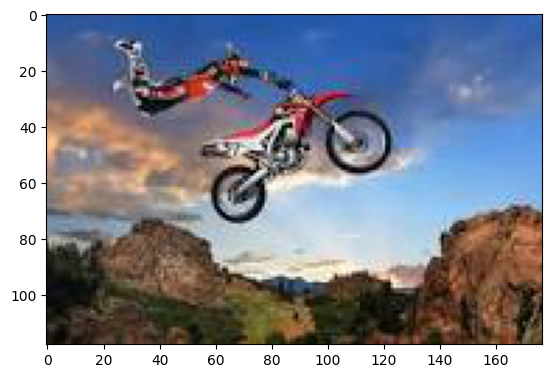

In [59]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse


ap = argparse.ArgumentParser()
ap.add_argument("-i","--image",
                help="Path to the image.",default="/content/gdrive/MyDrive/MAJOR_PROJECT/biker.jpg")
args = vars(ap.parse_args(args=[]))
img_path = args['image']


def extract_features(filename, model):
        try:
            image = Image.open(filename)
            
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word,index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text


# change the model name to the latest and run the epochs as 25 and also give the image path from the google'
max_length = 38
tokenizer = load(open("/content/tokenizer.p",'rb'))
model = load_model('/content/gdrive/MyDrive/MAJOR_PROJECT/models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)